In [61]:
import pandas as pd
import math
from fuzzywuzzy import fuzz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import gc

pd.options.display.max_rows = 999
pd.options.display.max_columns = 200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings("ignore")



In [4]:
# ore_dic = {
# 260400:'镍矿'
# }

ore_dic = {
260400:'ore'
}


In [5]:
# refining_dic = {
# 282540:'镍的氧化物',
# 282735:'氯化镍',
# 283324:'镍的硫酸盐',
# 720260:'镍铁',
# 750110:'硫化镍',
# 750120:'氧化镍烧结物及镍冶炼的其他中间产品'
# }

refining_dic = {
282540:'refining',
282735:'refining',
283324:'refining',
720260:'refining',
750110:'refining',
750120:'refining'
}

In [177]:
# fabrication_dic = {
# 7218:'不锈钢',
# 7219:'不锈钢',
# 7220:'不锈钢',
# 7221:'不锈钢', # ?
# 7222:'不锈钢',
# 7223:'不锈钢',
# 720521:'合金钢粉末',
# 7224:'初级或半成品合金钢锭',
# 7225:'扁平轧制合金钢线宽度> 600毫米',
# 7226:'扁平轧制合金钢宽度< 600毫米',
# 7227:'棒材、棒材、热轧合金钢、不规则卷材',
# 7229:'除不锈钢外的合金钢线',
# 730459:'合金钢管或管材冷轧除外',
# 730650:'焊接合金钢管和管材',
# 740822:'铜镍合金或镍银基合金线',
# 740940:'铜镍或镍银板、片、带（',
# 741122:'铜镍或镍银管',
# 750220:'未锻造的合金镍',
# 750512:'镍合金棒材、棒材和型材',
# 750522:'镍合金线',
# 750620:'合金镍板、片、带和箔',
# 750712:'镍合金管',
# 750511:'非合金镍棒、杆和型材（',
# 750521:'镍丝（非合金）',
# 750610:'（非合金）镍板、片、带和箔',
# 750711:'镍管（非合金）',
# 750720:'镍制管或管件',
# 7508:'其他镍绞线制品',
# 760120:'未锻造的合金铝',
# 850650:'锂原电池',
# 850730:'镍镉蓄电池',
# 381511:'镍基负载催化剂'
# }

fabrication_dic = {
7218:'fabrication',
7219:'fabrication',
7220:'fabrication',
7221:'fabrication',
7222:'fabrication',
7223:'fabrication',
720521:'fabrication',
7224:'fabrication',
7225:'fabrication',
7226:'fabrication',
7227:'fabrication',
7229:'fabrication',
730459:'fabrication',
730650:'fabrication',
740822:'fabrication',
740940:'fabrication',
741122:'fabrication',
750220:'fabrication',
750512:'fabrication',
750522:'fabrication',
750620:'fabrication',
750712:'fabrication',
750511:'fabrication',
750521:'fabrication',
750610:'fabrication',
750711:'fabrication',
750720:'fabrication',
7508:'fabrication',
760120:'fabrication',
850650:'fabrication',
850730:'fabrication',
381511:'fabrication'
}


In [178]:
# processed_dic = {
# 730520:'石油/天然气套管(> 406毫米)',
# 730620:'石油/天然气套管(< 406毫米)',
# 730721:'法兰(不锈钢)',
# 730722:'管道弯头(不锈钢)',
# 730723:'管件对接焊接(不锈钢)',
# 730729:'非对接焊接管件(不锈钢)',
# 730830:'门、窗、框架',
# 732410:'水槽(不锈钢)',
# 8403:'锅炉',
# 842810:'电梯',
# 842820:'气动电梯',
# 842840:'自动扶梯',
# 8601:'铁路电力机器',
# 8602:'铁路机车-柴油',
# 8702:'公共汽车',
# 8703:'汽车轻型卡车',
# 8704:'卡车',
# 870892:'排气系统',
# 8711:'摩托车',
# 8712:'自行车',
# 8803:'飞机/航空航天',
# 890120:'渡船',
# 890391:'冷藏船',
# 890392:'帆船',
# 7309:'储罐、容器(> 300升)',
# 7311:'压缩液化气体容器',
# 8406:'蒸汽涡轮机',
# 8413:'泵',
# 841940:'蒸馏塔',
# 841950:'热交换器',
# 842219:'洗碗机(商用)（',
# 8434:'挤奶机、乳品机械',
# 8438:'食品加工设备',
# 8439:'纸浆和造纸机械',
# 8441:'纸浆和造纸机械杂项',
# 8481:'水龙头、旋塞和阀门（',
# 7321:'炉灶',
# 8210:'厨房电器',
# 8418:'冰箱/冰柜',
# 842211:'洗碗机',
# 8450:'洗衣机',
# 8471:'个人电脑',
# 850940:'食品研磨机、混炼机和搅拌机',
# 851650:'微波炉',
# 7318:'按钮配件',
# 8215:'餐具(刀除外)',
# 841920:'医疗/外科/实验室消毒器',
# 8211:'刀和刀片',
# 9018:'医疗器械',
# 7317:'钉子',
# 8215:'餐具(刀除外)',
# 8418:'冰箱/冰柜',
# 7310:'集装箱、小桶',
# 732393:'厨房用品、杂项(不锈钢)'
# }

processed_dic = {
730520:'processed',
730620:'processed',
730721:'processed',
730722:'processed',
730723:'processed',
730729:'processed',
730830:'processed',
732410:'processed',
8403:'processed',
842810:'processed',
842820:'processed',
842840:'processed',
8601:'processed',
8602:'processed',
8702:'processed',
8703:'processed',
8704:'processed',
870892:'processed',
8711:'processed',
8712:'processed',
8803:'processed',
890120:'processed',
890391:'processed',
890392:'processed',
7309:'processed',
7311:'processed',
8406:'processed',
8413:'processed',
841940:'processed',
841950:'processed',
842219:'processed',
8434:'processed',
8438:'processed',
8439:'processed',
8441:'processed',
8481:'processed',
7321:'processed',
8210:'processed',
8418:'processed',
842211:'processed',
8450:'processed',
8471:'processed',
850940:'processed',
851650:'processed',
7318:'processed',
8215:'processed',
841920:'processed',
8211:'processed',
9018:'processed',
7317:'processed',
8215:'processed',
8418:'processed',
7310:'processed',
732393:'processed'
}

# 解压缩贸易数据（from mac）

In [25]:
import zipfile
def unzip(f, temp_data_path):
    zfile = zipfile.ZipFile(f,'r')
    for filename in zfile.namelist():
        data = zfile.read(filename)
        file = open(temp_data_path + filename, 'w+b')
        file.write(data)
    file.close()


In [60]:
temp_data_path = '/Users/linzipeng/Documents/IUE/4_Mineral_price_and_trading/data/Uncomtrade2022/raw_data/temp/'
raw_data_path = '/Users/linzipeng/Documents/IUE/4_Mineral_price_and_trading/data/Uncomtrade2022/raw_data/hs_data_all/'
cleaned_data_path = '/Users/linzipeng/Documents/IUE/4_Mineral_price_and_trading/data/Uncomtrade2022/cleaned_data/nickel_containing_trade/'


In [62]:
zipfiles = glob.glob(raw_data_path + '*.zip')
concentration_info = pd.read_excel('商品代码对应.xlsx')

for y in range(2000, 2022):
    zf = [i for i in zipfiles if 'type-C_r-ALL_ps-'+str(y) in i][0]
    unzip(zf, temp_data_path)
    csv_file = zf.replace('.zip', '.csv').replace('hs_data_all', 'temp')
    data = pd.read_csv(csv_file)
    data = data[['Year', 'Period', 'Reporter Code', 'Trade Flow', 'Partner Code', 'Netweight (kg)', 'Trade Value (US$)', 'Qty Unit Code', 'Qty', 'Commodity Code']]
    data.columns = ['year', 'period', 'reportercode', 'tradeflowcode', 'partnercode', 'new_netweight', 'new_tradevalue', 'qtyunitcode', 'qty', 'commoditycode']
    data = data.apply(pd.to_numeric, errors='ignore')
    data = data[data['commoditycode'].isin(list(concentration_info['代码']))]
    data.to_csv(cleaned_data_path + 'year_%d.csv'%y, index=None)
    data.head()
    del data
    gc.collect()
    os.remove(csv_file)


year  period  reportercode tradeflowcode  partnercode  new_netweight  \
33712  2000    2000             8        Import            0       111898.0   
33713  2000    2000             8        Export            0        32439.0   
33714  2000    2000             8        Import           40          122.0   
33715  2000    2000             8        Export          276        32439.0   
33716  2000    2000             8        Import          300         2977.0   

       new_tradevalue  qtyunitcode       qty commoditycode  
33712           71090            8  111898.0          7226  
33713           27236            8   32439.0          7226  
33714             251            8     122.0          7226  
33715           27236            8   32439.0          7226  
33716            1831            8    2977.0          7226

18863

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
33109  2001    2001             8        Import            0       187932.0   
33110  2001    2001             8        Import           40           33.0   
33111  2001    2001             8        Import          100         1006.0   
33112  2001    2001             8        Import          156        29777.0   
33113  2001    2001             8        Import          251          120.0   

       new_tradevalue  qtyunitcode       qty commoditycode  
33109          308254            8  187932.0          8215  
33110             860            8      33.0          8215  
33111            1546            8    1006.0          8215  
33112           45154            8   29777.0          8215  
33113             755            8     120.0          8215

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
1741183  2002    2002            36        Import            0       126670.0   
1741184  2002    2002            36        Export            0    280606080.0   
1741185  2002    2002            36     Re-Import            0        10220.0   
1741186  2002    2002            36        Import           36        10220.0   
1741187  2002    2002            36     Re-Import           36        10220.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
1741183           56195            8     126670.0        260400  
1741184       220749776            8  280606080.0        260400  
1741185           51249            8      10220.0        260400  
1741186           51249            8      10220.0        260400  
1741187           51249            8      10220.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
1986335  2003    2003             8        Export            0     30817166.0   
1986336  2003    2003             8        Export          300     18734450.0   
1986337  2003    2003             8        Export          807     12082716.0   
1986338  2003    2003            36        Import            0        68972.0   
1986339  2003    2003            36        Export            0    264245249.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
1986335          154701            8   30817166.0        260400  
1986336           94396            8   18734450.0        260400  
1986337           60305            8   12082716.0        260400  
1986338            4582            8      68972.0        260400  
1986339       355843249            8  264245249.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2227198  2004    2004             8        Export            0     39600840.0   
2227199  2004    2004             8        Export          268        29100.0   
2227200  2004    2004             8        Export          300     13303801.0   
2227201  2004    2004             8        Export          320        55450.0   
2227202  2004    2004             8        Export          807     26212489.0   

         new_tradevalue  qtyunitcode         qty commoditycode  
2227198          203562            8  39600840.0        260400  
2227199             144            8     29100.0        260400  
2227200           68602            8  13303801.0        260400  
2227201             274            8     55450.0        260400  
2227202          134541            8  26212489.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2378818  2005    2005             8        Export            0       802788.0   
2378819  2005    2005             8        Export          300        49430.0   
2378820  2005    2005             8        Export          807       753358.0   
2378821  2005    2005            12        Import            0          400.0   
2378822  2005    2005            12        Import          124          200.0   

         new_tradevalue  qtyunitcode       qty commoditycode  
2378818            3982            8  802788.0        260400  
2378819             240            8   49430.0        260400  
2378820            3742            8  753358.0        260400  
2378821            6282            8     400.0        260400  
2378822            3141            8     200.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2494391  2006    2006             8        Export            0          110.0   
2494392  2006    2006             8        Export          792          110.0   
2494393  2006    2006            12        Import            0          200.0   
2494394  2006    2006            12        Import          826          200.0   
2494395  2006    2006            36        Import            0         8486.0   

         new_tradevalue  qtyunitcode     qty commoditycode  
2494391              29            8   110.0        260400  
2494392              29            8   110.0        260400  
2494393            4708            8   200.0        260400  
2494394            4708            8   200.0        260400  
2494395            6579            8  8486.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
1888317  2007    2007            36        Import            0         2200.0   
1888318  2007    2007            36        Export            0    284925551.0   
1888319  2007    2007            36        Export          124     14217910.0   
1888320  2007    2007            36        Export          156    127840840.0   
1888321  2007    2007            36        Export          246    142849801.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
1888317            1322            8       2200.0        260400  
1888318       846129409            8  284925551.0        260400  
1888319        76568170            8   14217910.0        260400  
1888320       258959517            8  127840840.0        260400  
1888321       510593327            8  142849801.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2311769  2008    2008            36        Import            0        55865.0   
2311770  2008    2008            36        Export            0    544870196.0   
2311771  2008    2008            36        Export          124     17330140.0   
2311772  2008    2008            36        Export          156    258921334.0   
2311773  2008    2008            36        Export          246    268618722.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2311769           18998            8      55865.0        260400  
2311770       985016413            8  544870196.0        260400  
2311771        38931203            8   17330140.0        260400  
2311772       352516139            8  258921334.0        260400  
2311773       593569071            8  268618722.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2583128  2009    2009            36        Import            0         7500.0   
2583129  2009    2009            36        Export            0    422130802.0   
2583130  2009    2009            36        Import          124         7500.0   
2583131  2009    2009            36        Export          124    117274000.0   
2583132  2009    2009            36        Export          156    206765397.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2583128           44869            8       7500.0        260400  
2583129       488869780            8  422130802.0        260400  
2583130           44869            8       7500.0        260400  
2583131       158940335            8  117274000.0        260400  
2583132       208448103            8  206765397.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2722600  2010    2010            24        Import            0           70.0   
2722601  2010    2010            24        Import          516           70.0   
2722602  2010    2010            32        Import            0          250.0   
2722603  2010    2010            32        Import          710          250.0   
2722604  2010    2010            36        Export            0    360491690.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2722600             105            8         70.0        260400  
2722601             105            8         70.0        260400  
2722602            5633            8        250.0        260400  
2722603            5633            8        250.0        260400  
2722604       653775439            8  360491690.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2836939  2011    2011            36        Import            0        26216.0   
2836940  2011    2011            36        Export            0    463628076.0   
2836941  2011    2011            36        Export           76      4300000.0   
2836942  2011    2011            36        Import          124         1319.0   
2836943  2011    2011            36        Export          124    147304400.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2836939           59457            8      26216.0        260400  
2836940      1045616765            8  463628076.0        260400  
2836941        11036031            8    4300000.0        260400  
2836942            7751            8       1319.0        260400  
2836943       462002012            8  147304400.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2550513  2012    2012             8        Export            0       102900.0   
2550514  2012    2012             8        Export          688       102900.0   
2550515  2012    2012            36        Import            0            8.0   
2550516  2012    2012            36        Export            0    654770810.0   
2550517  2012    2012            36        Export           76     10855690.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2550513            1064            8     102900.0        260400  
2550514            1064            8     102900.0        260400  
2550515            7379            8          8.0        260400  
2550516      1303773020            8  654770810.0        260400  
2550517        27085217            8   10855690.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2895103  2013    2013             8        Export            0    191605075.0   
2895104  2013    2013             8        Export          156    109154700.0   
2895105  2013    2013             8        Export          196       663105.0   
2895106  2013    2013             8        Export          381     55320900.0   
2895107  2013    2013             8        Export          688     26461870.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
2895103         4570508            8  191605075.0        260400  
2895104         2554840            8  109154700.0        260400  
2895105            4677            8     663105.0        260400  
2895106         1334549            8   55320900.0        260400  
2895107          675988            8   26461870.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3107070  2014    2014             8        Export            0    239379048.0   
3107071  2014    2014             8        Export          688    239379048.0   
3107072  2014    2014            32        Import            0          800.0   
3107073  2014    2014            32        Import          320          800.0   
3107074  2014    2014            36        Import            0         2326.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
3107070         6492450            8  239379048.0        260400  
3107071         6492450            8  239379048.0        260400  
3107072            4176            8        800.0        260400  
3107073            4176            8        800.0        260400  
3107074            1144            8       2326.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3335124  2015    2015             8        Export            0    282611731.0   
3335125  2015    2015             8        Export          688    282611731.0   
3335126  2015    2015            36        Import            0     14694695.0   
3335127  2015    2015            36        Export            0    361882843.0   
3335128  2015    2015            36        Import           76     10010020.0   

         new_tradevalue  qtyunitcode          qty commoditycode  
3335124         7259839            8  282611731.0        260400  
3335125         7259839            8  282611731.0        260400  
3335126        16682048            8   14694695.0        260400  
3335127       497907388            8  361882843.0        260400  
3335128         7217840            8   10010020.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3359218  2016    2016             8        Export            0     75557930.0   
3359219  2016    2016             8        Export          688     75456110.0   
3359220  2016    2016             8        Export          807       101820.0   
3359221  2016    2016            32        Import            0          500.0   
3359222  2016    2016            32        Import          826          500.0   

         new_tradevalue  qtyunitcode         qty commoditycode  
3359218         1752114            8  75557930.0        260400  
3359219         1751162            8  75456110.0        260400  
3359220             952            8    101820.0        260400  
3359221            6691            8       500.0        260400  
3359222            6691            8       500.0        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
2844929  2017    2017            12        Import            0           20.0   
2844930  2017    2017            12        Import          208           20.0   
2844931  2017    2017            36        Import            0      8655008.0   
2844932  2017    2017            36        Export            0    172326210.0   
2844933  2017    2017            36        Import           56      4404600.0   

         new_tradevalue  qtyunitcode        qty commoditycode  
2844929             127            8         20        260400  
2844930             127            8         20        260400  
2844931        13870123            8    8655008        260400  
2844932       210630725            8  172326210        260400  
2844933         4032749            8    4404600        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3206266  2018    2018            36        Export            0    164319360.0   
3206267  2018    2018            36        Export          156    164173000.0   
3206268  2018    2018            36        Export          392        43360.0   
3206269  2018    2018            36        Export          410        82000.0   
3206270  2018    2018            36        Export          579        21000.0   

         new_tradevalue  qtyunitcode        qty commoditycode  
3206266       193498922            8  164319360        260400  
3206267       192439672            8  164173000        260400  
3206268          131337            8      43360        260400  
3206269          881221            8      82000        260400  
3206270           46690            8      21000        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3341629  2019    2019             8        Export            0    241045800.0   
3341630  2019    2019             8        Export          688    194150000.0   
3341631  2019    2019             8        Export          807     46895800.0   
3341632  2019    2019            32        Import            0           54.0   
3341633  2019    2019            32        Import          842           54.0   

         new_tradevalue  qtyunitcode        qty commoditycode  
3341629         5266608            8  241045800        260400  
3341630         4636682            8  194150000        260400  
3341631          629926            8   46895800        260400  
3341632            7530            8         54        260400  
3341633            7530            8         54        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
3258687  2020    2020             8        Export            0     10842620.0   
3258688  2020    2020             8        Export          807     10842620.0   
3258689  2020    2020            32        Import            0           54.0   
3258690  2020    2020            32        Import          842           54.0   
3258691  2020    2020            36        Import            0        69798.0   

         new_tradevalue  qtyunitcode       qty commoditycode  
3258687          219808            8  10842620        260400  
3258688          219808            8  10842620        260400  
3258689            8084            8        54        260400  
3258690            8084            8        54        260400  
3258691          668279            8     69798        260400

0

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
64119  2021    2021           124        Import            0     40838853.0   
64120  2021    2021           124        Export            0      6322889.0   
64121  2021    2021           124     Re-Import            0           12.0   
64122  2021    2021           124        Import           36        11047.0   
64123  2021    2021           124        Import           56          330.0   

       new_tradevalue  qtyunitcode       qty commoditycode  
64119       369786335            8  40838853        260400  
64120       118300603            8   6322889        260400  
64121              19            8        12        260400  
64122            4389            8     11047        260400  
64123             263            8       330        260400

0

# 贸易数据读取（from web）

In [174]:
csvfiles = glob.glob(cleaned_data_path + '*.csv')
data = pd.DataFrame()
for f in csvfiles:
    temp = pd.read_csv(f)
    data = pd.concat([data, temp], axis=0)

data.shape
data.head()


(9084367, 10)

year  period  reportercode tradeflowcode  partnercode  new_netweight  \
0  2020    2020             8        Export            0     10842620.0   
1  2020    2020             8        Export          807     10842620.0   
2  2020    2020            32        Import            0           54.0   
3  2020    2020            32        Import          842           54.0   
4  2020    2020            36        Import            0        69798.0   

   new_tradevalue  qtyunitcode         qty  commoditycode  
0          219808            8  10842620.0         260400  
1          219808            8  10842620.0         260400  
2            8084            8        54.0         260400  
3            8084            8        54.0         260400  
4          668279            8     69798.0         260400

# 数据处理

In [175]:
# 只看进出口
data = data[data['tradeflowcode'].isin(['Export', 'Import'])]


In [179]:
# 确定镍商品所处的产业链节点
data['sector'] = data['commoditycode'].replace(ore_dic).replace(refining_dic)\
                .replace(fabrication_dic).replace(processed_dic)


In [180]:
# 换算成镍的质量
concentration_info = pd.read_excel('商品代码对应.xlsx')
concentration_info_dic = concentration_info[['代码', 'Unnamed: 2']].set_index('代码').to_dict()['Unnamed: 2']
data['new_netweight'] = data['commoditycode'].replace(concentration_info_dic) * data['new_netweight'] / 100


In [352]:
(data['commoditycode'].replace(concentration_info_dic) * data['new_netweight']).head(20)


0      14.842463
1      14.842463
2       0.000074
3       0.000074
4       0.095546
5     302.814014
6     302.697082
7       0.093458
8       0.001916
9       0.000576
10      0.000094
11      0.116357
12      0.000007
13      0.000070
14           NaN
15      0.000010
16      0.000003
17      0.000005
18           NaN
19      0.000001
dtype: float64

In [181]:
# 换成国家名
raw_data_path = '/Users/linzipeng/Documents/IUE/1_Material_flow_analysis/Iron/Steel/data/'
country_info = pd.read_excel(raw_data_path + "SteelCycleCompile_Input.xlsx", sheet_name="CountryList", skiprows=1)
country_info = country_info[['CountryList (289)', 'Unnamed: 4', 'region', 'PlotSelect', 'Industrialized (GDP top 25)']]
country_info.columns = ['AllCountries', 'AllCountryNames', 'AllRegions', 'Country_PlotSelect', 'Industrialized_Sel']

country_info_dic = country_info[['AllCountryNames', 'AllCountries']].set_index('AllCountries').to_dict()['AllCountryNames']
data['reportercode'] = data['reportercode'].replace(country_info_dic)
data['partnercode'] = data['partnercode'].replace(country_info_dic)
data.head()


year  period reportercode tradeflowcode        partnercode  new_netweight  \
0  2020    2020      Albania        Export              World    1268.586540   
1  2020    2020      Albania        Export  TFYR of Macedonia    1268.586540   
2  2020    2020    Argentina        Import              World       0.006318   
3  2020    2020    Argentina        Import                USA       0.006318   
4  2020    2020    Australia        Import              World       8.166366   

   new_tradevalue  qtyunitcode         qty  commoditycode sector  
0          219808            8  10842620.0         260400    ore  
1          219808            8  10842620.0         260400    ore  
2            8084            8        54.0         260400    ore  
3            8084            8        54.0         260400    ore  
4          668279            8     69798.0         260400    ore

In [182]:
data['commoditycode'].nunique()
len(concentration_info_dic)


91

91

# 分析

## 俄罗斯

### 镍进出口量（总）

sector    fabrication           ore     processed       refining
year                                                            
2000     87443.195352           NaN  16998.049303   51544.128485
2001     59495.507440           NaN  19968.466305   24543.732942
2002     77266.559152           NaN  23576.016341   73790.355229
2003    118580.836521           NaN  50552.468292   90462.314040
2004    110961.219702      0.234000  44564.512574  129492.098494
2005    115402.729044           NaN  43312.737109   96719.512369
2006    123339.771189           NaN  51100.321467  102623.413497
2007    100929.185414      0.000234  48494.172360   79903.333078
2008     92110.960870  10297.105416  53798.972422   68660.847522
2009     98326.636406  16160.777568  31151.165531   45179.522152
2010    182970.958502  11553.237891  32591.456085   25232.027721
2011    172121.267225   4343.468805  46486.337984   26139.100244
2012    142274.940606   7831.819125  40836.312157   43193.637961
2013    172570.134402   3292.813602  40430.029623   22875.740492
2014    146307.255036     21.435219  41054.517758   20105.273005
2015     83695.556100   5978.424465  48978.223448   39998.953529
2016    266140.296239      7.633431  44283.217980   57072.520960
2017     99897.297356  14388.660234  41005.246369  133541.994415
2018     86132.944101  15171.735384  44436.586245  159233.302629
2019     77111.005759   8787.342096  54777.410133   33235.796181
2020     77647.890901  14876.891289  48430.514481   17911.607263
2021     10541.930921    133.040349   3935.422556       3.578565

<AxesSubplot:xlabel='year'>

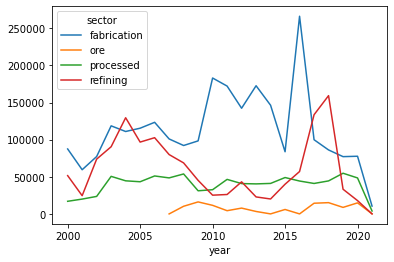

In [183]:
# 从俄罗斯出口（其他国家报告）

stat1 = data[(data['partnercode']=='Russian Federation')&(data['tradeflowcode']=='Import')].groupby(['sector', 'year'])['new_netweight'].sum().unstack().T
stat1
stat1.plot()


sector    fabrication           ore      processed       refining
year                                                             
2000    180530.963792           NaN   64506.769126   39246.837573
2001    179427.296922           NaN   73455.426114   18769.805184
2002    211793.726270           NaN   82431.073627   76462.707753
2003    223242.448785           NaN   91291.927153   87202.848174
2004    207805.116944           NaN   98276.302166  112449.009426
2005    291842.806745           NaN  105577.332516  187959.586026
2006    327215.429083      0.692640  108822.707891  221556.611490
2007    306634.082934     52.579800  115014.471787  211787.549511
2008    282995.433441  24910.639416  107852.505874  128479.971990
2009    237045.905295  28842.569262   69805.671354  115152.508281
2010    252064.281187  24007.635054   53415.655997  176067.419175
2011    199439.485081  10467.701712   49863.272041  215771.689335
2012    178460.705485  15757.821144   78153.907824  309916.253082
2013    215000.626499   3067.568946   97287.438499  215769.591114
2014    222107.578108      9.301734  190043.512040   99957.010884
2015    206354.799389   8299.890612  117171.595576   10950.937875
2016    213331.247144  31287.672000  116793.047234  118284.598066
2017    133190.466580  28790.962200  128929.762144  271775.799570
2018    117744.822682  31414.429800  116224.588303  281926.258230
2019    107556.694133  18339.796800  115191.650415  327584.228055
2020    107282.063289  35144.312580  128265.629544  298681.549006

<AxesSubplot:xlabel='year'>

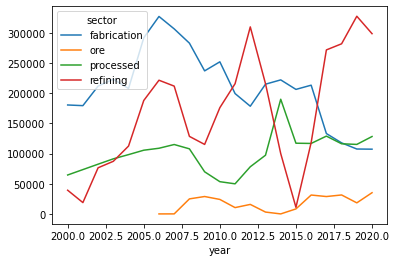

In [184]:
# 俄罗斯出口（俄罗斯报告）

stat4 = data[(data['reportercode']=='Russian Federation')&(data['tradeflowcode']=='Export')].groupby(['sector', 'year'])['new_netweight'].sum().unstack().T
stat4
stat4.plot()



sector    fabrication          ore      processed      refining
year                                                           
2000     46899.211284  3019.115970   60578.544293    210.110151
2001     40844.167368          NaN   64692.954404    203.032080
2002     65585.581712  1399.617414  101060.812588    315.001230
2003     60950.686479    16.899246  109465.351491    178.440525
2004     74183.599279  7472.010663  138240.870993    392.693250
2005     98647.867523  2925.234000  159028.597413   2649.987945
2006    104341.003622          NaN  197866.116488   2648.963033
2007    102467.447760     0.033579  203876.205232   3075.268997
2008    118386.953460   523.926000  240637.166262   3317.215788
2009     73398.190275          NaN  133802.720403   1026.730763
2010    120042.438818          NaN  192062.036652   1134.314764
2011    155858.634047     2.316600  254295.698393  10971.170260
2012    158457.395425     0.162864  261677.632386  17779.478454
2013    168669.530034  5435.676909  289582.280320  12799.089841
2014    153306.263506     0.011700  262517.745129    632.868859
2015    162336.505676          NaN  186489.515677    247.723624
2016    185472.892947   819.000000  217150.963003    533.009119
2017    234308.939869     0.000117  276335.606778   1828.638431
2018    148689.602638     0.146952  204995.141972    492.591003
2019    249855.994791     0.000117  261001.100408    646.126833
2020    302816.506862     0.000000  597208.136269    898.692441
2021      8354.700468          NaN   22271.275182     38.800611

<AxesSubplot:xlabel='year'>

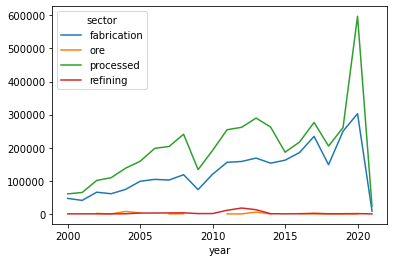

In [185]:
# 俄罗斯进口（其他国家报告）

stat2 = data[(data['partnercode']=='Russian Federation')&(data['tradeflowcode']=='Export')].groupby(['sector', 'year'])['new_netweight'].sum().unstack().T
stat2
stat2.plot()


sector    fabrication           ore      processed      refining
year                                                            
2000     98239.390046  71913.364380  130965.908433   1322.811381
2001    167078.877785   7118.454564  188633.495884   1361.416989
2002    116884.691680   2870.752716  213438.650066    898.278645
2003     97690.632761    243.805770  270145.499093   1050.693759
2004    125041.666457  14432.301234  333535.605206   2339.198424
2005    217773.478339   5850.468000  415752.279544   2029.084560
2006    228666.973544           NaN  509002.810600   6216.775155
2007    251207.703068      1.627470  631372.178262   2142.134715
2008    268571.421553   1052.532000  692222.274231   1733.363373
2009    165901.430207           NaN  299797.480538   2139.540612
2010    264351.502352      0.208962  402335.611721   2510.398942
2011    341910.697445           NaN  550612.279224  29459.494962
2012    328029.299944     31.178160  660512.158935  67914.773589
2013    334151.971321   7288.744320  626774.460182  53560.652439
2014    395457.352973   7943.087412  607594.441547   1810.392376
2015    334718.037691   7069.149360  412934.402464    991.227558
2016    404461.029709  14414.741640  504507.836251   1439.788224
2017    497841.150446   2493.021960  637686.138254   3451.448607
2018    514121.270852           NaN  544351.583887   1185.875542
2019    483170.130620      0.000000  541452.392654   2123.790424
2020    519674.380320      0.023400  564442.746283   1698.143836

<AxesSubplot:xlabel='year'>

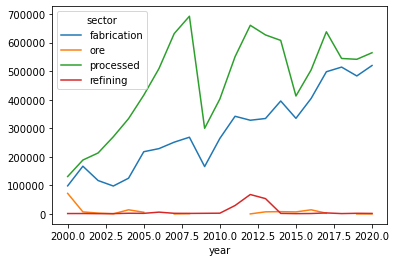

In [186]:
# 俄罗斯进口（俄罗斯报告）

stat3 = data[(data['reportercode']=='Russian Federation')&(data['tradeflowcode']=='Import')].groupby(['sector', 'year'])['new_netweight'].sum().unstack().T
stat3
stat3.plot()



In [189]:
158866.903934 / 280000
569373.5544195 / 280000


0.5673817997642857

2.033476980069643

###  镍出口量（分商品）

In [339]:
concentration_info.loc[8:12]['Unnamed: 0'] = '不锈钢'
commodity_dic = concentration_info[['代码', 'Unnamed: 0']].set_index('代码').to_dict()['Unnamed: 0']


In [361]:
# 从俄罗斯出口（其他国家报告）

stat1 = data[(data['partnercode']=='Russian Federation')&(data['tradeflowcode']=='Import')].groupby(['commoditycode', 'year'])['new_netweight'].sum().unstack().fillna(0)
stat1.index = [commodity_dic[i] for i in stat1.index]
stat1[range(2015, 2022)]

year                       2015           2016           2017           2018  \
不锈钢                 9617.265000    5557.042800   10535.947425    7316.122500   
不锈钢                 4796.340750    5723.664525    9068.107950    7871.305950   
不锈钢                 2351.284875     312.806475     358.892775     425.790000   
不锈钢                   11.533050      72.012375      31.182975       7.306200   
不锈钢                 1566.251775    2235.865950    2012.201325    1846.099350   
不锈钢                  471.567825     317.434275     340.560450     185.205825   
初级或半成品合金钢锭          7570.772834   10060.513897   13385.656981    8782.448760   
扁平轧制合金钢线宽度> 600毫米   8396.095408    7729.131576    9411.711368   10151.484447   
扁平轧制合金钢宽度< 600毫米    2346.657198    2133.126886    2210.108605    2337.906605   
棒材、棒材、热轧合金钢、不规则卷材   1143.642269     689.410973    1456.400382    1411.931063   
除不锈钢外的合金钢线            64.977069      63.503137      58.718390      70.338795   
储罐、容器(> 300升)       1816.429320    2767.012920    3394.198080    2335.896360   
集装箱、小桶              2048.551380    2607.723964    3001.640184    3243.840676   
压缩液化气体容器            5545.632000    6855.288000    5154.686400    6861.229200   
钉子                  1878.334480    1562.633520    1458.897120    1243.661040   
按钮配件                 809.592120     970.725690     854.407440    1040.034195   
炉灶                    73.846365      68.257425      72.492525      78.061695   
其他镍绞线制品             2209.770000    2524.080000    1679.890000    1883.490000   
厨房电器                  32.233180      31.399200      18.092760      79.351090   
刀和刀片                  28.601720      49.604520      87.153640      55.553680   
餐具(刀除外)              116.018280      91.940170      87.053400     689.070830   
锅炉                     4.558480      28.176689       5.860511       6.507914   
蒸汽涡轮机                828.470200     943.435200     410.164800     417.550600   
泵                   8901.998500    8271.603000    7891.655000    8025.349000   
冰箱/冰柜               1211.644954    1134.844932    1335.234212    1547.859222   
挤奶机、乳品机械             421.414400     480.801600     705.120800     464.152800   
食品加工设备              1252.805600     971.924000    1475.631200    1250.172800   
纸浆和造纸机械             1485.282000     720.176400     535.548000    1392.650400   
纸浆和造纸机械杂项            648.716400     586.206000     353.587200     497.847600   
洗衣机                  103.936416     158.869184     202.718344     205.213584   
个人电脑                  35.937235      54.561585      40.291530      37.076660   
水龙头、旋塞和阀门（           873.705285     808.611795     815.492385     768.158955   
铁路电力机器                 8.632275      17.209800     111.179325      28.089600   
铁路机车-柴油              452.190225     156.547875     178.550850     293.704125   
公共汽车                  54.433518      26.417625      28.794384      23.101794   
汽车轻型卡车               423.531756     254.826312     258.645636     196.624464   
卡车                  1049.091981     695.719356     672.767146     520.679944   
摩托车                    3.591204      15.250167       2.936238       3.027867   
自行车                    5.669500       4.885940       4.968080       7.344420   
飞机/航空航天             1763.581736    1684.379641    1633.289945    1286.937862   
医疗器械                 333.202200     112.332300     152.298750     184.322100   
镍矿                  5978.424465       7.633431   14388.660234   15171.735384   
镍的氧化物                411.728520       0.000000       0.924180       7.963140   
氯化镍                    3.663556       6.081775      11.860141       1.630260   
镍的硫酸盐                293.179500     356.396625      91.320750      90.179325   
镍基负载催化剂               36.055800      74.142200     128.631800      20.809800   
镍铁                 36852.100752    4240.043760    9963.790944   15845.201904   
合金钢粉末                  9.383080       7.522460      29.026240      39.369760   
合金钢管或管材冷轧除外         1809.012159     306.391746     944.155622     799.027895   


In [363]:
# 从俄罗斯出口（俄罗斯国家报告）

stat1 = data[(data['reportercode']=='Russian Federation')&(data['tradeflowcode']=='Export')].groupby(['commoditycode', 'year'])['new_netweight'].sum().unstack().fillna(0)
stat1.index = [commodity_dic[i] for i in stat1.index]
stat1[range(2015, 2021)]


year                       2015           2016           2017           2018  \
不锈钢                  860.683050     424.371150     726.170400     331.807725   
不锈钢                 7826.589900    7826.487300   12921.446700   14401.241775   
不锈钢                  397.140975     489.340575     463.703400    1035.029475   
不锈钢                   55.981800       4.438800      56.766825       7.626150   
不锈钢                 3741.935400    5141.411550    4759.815150    5580.177750   
不锈钢                  119.717325      79.224075     223.491825     142.327800   
初级或半成品合金钢锭         24605.410145   23082.690001   28200.137893   28032.155470   
扁平轧制合金钢线宽度> 600毫米  35143.095615   24360.506535   22778.683071   26743.396500   
扁平轧制合金钢宽度< 600毫米    4897.636313    4387.365132    4448.460568    4890.609440   
棒材、棒材、热轧合金钢、不规则卷材   1601.694554    1546.220639    1806.431612    1405.896474   
除不锈钢外的合金钢线           156.745838     169.769486      85.152632     281.273908   
储罐、容器(> 300升)       6810.069600    5714.612100    6910.252020    7789.552380   
集装箱、小桶              5305.979986    7629.961564    5224.447056    7664.201778   
压缩液化气体容器           20743.636800   24529.534800   23740.272000   24151.873200   
钉子                  6137.594160    4224.604880    3900.583120    3307.328880   
按钮配件                1978.342650    2530.641510    2938.767165    3180.736575   
炉灶                   110.311425     111.026625     129.619395     127.995720   
其他镍绞线制品             4271.060000    3651.110000    3464.400000    1957.940000   
厨房电器                 144.081560     145.020400     116.725350     147.822220   
刀和刀片                  55.950720      91.717640      74.217360     124.972400   
餐具(刀除外)              238.648130     411.546590     243.176220     174.013210   
锅炉                    10.482010      12.477952      17.357124      15.489029   
蒸汽涡轮机               1872.464400     806.234000    1180.112000    2154.123000   
泵                  20151.734000   23196.631500   26775.142500   23810.196500   
冰箱/冰柜               2094.124214    3370.425604    4342.815958    4102.277426   
挤奶机、乳品机械            1088.417600    1473.512800    2512.644000    3253.540000   
食品加工设备              3813.720800    8016.680800    3428.936800    2447.064000   
纸浆和造纸机械              796.171200     826.416000    1527.361200    3543.222000   
纸浆和造纸机械杂项           1497.537600     960.688800    1068.646800     642.624000   
洗衣机                  175.025724     333.078890     421.480654     424.709576   
个人电脑                  98.878630     119.585650     121.537845      86.463105   
水龙头、旋塞和阀门（          2478.762360    1745.207730    2415.111705    1129.651965   
铁路电力机器               286.545900       8.329650      22.671300     115.190100   
铁路机车-柴油              578.244750     601.507650     776.009550    1561.212450   
公共汽车                  43.722624      19.491672      69.658206      77.428896   
汽车轻型卡车              1038.808086     234.993036     711.753906     756.729297   
卡车                  3840.051392    2972.349683    2196.561704    2588.352612   
摩托车                    6.200502       3.177180       3.749799       2.293485   
自行车                   10.340600       7.112370      10.447295      15.353345   
飞机/航空航天                0.000000      36.379973       0.000000       0.000000   
医疗器械                 339.506850     638.585850     811.356000     535.147500   
镍矿                  8299.890612   31287.672000   28790.962200   31414.429800   
镍的氧化物                537.505620       0.012660       5.551410      15.470520   
氯化镍                   19.282353      13.381717       9.473622      27.062316   
镍的硫酸盐                563.777550     443.946825      82.359450      90.524250   
镍基负载催化剂               96.769200     333.674000    1214.686000      54.740400   
镍铁                  4958.252352   16655.760864   15534.246528   18275.354400   
合金钢粉末                 25.514560      33.323880      85.783480     264.138760   
合金钢管或管材冷轧除外          739.746476     368.138622    1413.594324    1600.421014   


In [258]:
data.head()

year  period reportercode tradeflowcode        partnercode  new_netweight  \
0  2020    2020      Albania        Export              World    1268.586540   
1  2020    2020      Albania        Export  TFYR of Macedonia    1268.586540   
2  2020    2020    Argentina        Import              World       0.006318   
3  2020    2020    Argentina        Import                USA       0.006318   
4  2020    2020    Australia        Import              World       8.166366   

   new_tradevalue  qtyunitcode         qty  commoditycode sector  
0          219808            8  10842620.0         260400    ore  
1          219808            8  10842620.0         260400    ore  
2            8084            8        54.0         260400    ore  
3            8084            8        54.0         260400    ore  
4          668279            8     69798.0         260400    ore

In [275]:
tradeBysector.columns =['year', 'reportercode', 'partnercode', 'period', 'sector', 'new_netweight', 'new_tradevalue']

Index(['year', 'reportercode', 'partnercode', 'period', 'sector',
       'new_netweight', 'new_tradevalue'],
      dtype='object')

year  reportercode             sector     
2000  490                      fabrication    418337.835913
                               processed       67686.819876
                               refining       959217.203925
      Albania                  fabrication       123.284562
                               processed         125.029626
                                                  ...      
2021  United Kingdom           processed      558361.269404
                               refining       206122.052430
      United Rep. of Tanzania  fabrication      3024.573628
                               processed       57135.629767
                               refining            1.741500
Name: new_netweight, Length: 9106, dtype: float64

## 全世界（产业链节点）

In [384]:
# 只看产业链节点
tradeBysector = data[data['tradeflowcode']=='Import'].groupby((['year', 'reportercode', 'partnercode', 'period', 'sector']))['new_netweight', 'new_tradevalue'].sum()
tradeBysector = tradeBysector.reset_index()
tradeBysector.head()


year reportercode          partnercode  period       sector  new_netweight  \
0  2000          490  Antigua and Barbuda    2000    processed       0.004275   
1  2000          490           Areas, nes    2000  fabrication     978.954159   
2  2000          490           Areas, nes    2000    processed     324.378351   
3  2000          490            Argentina    2000    processed       0.866835   
4  2000          490            Australia    2000  fabrication    1095.443000   

   new_tradevalue  
0            1851  
1        78696390  
2       107839463  
3          127372  
4         2403220

In [385]:
# 换成国家名
raw_data_path = '/Users/linzipeng/Documents/IUE/1_Material_flow_analysis/Iron/Steel/data/'
country_info = pd.read_excel(raw_data_path + "SteelCycleCompile_Input.xlsx", sheet_name="CountryList", skiprows=1)
country_info = country_info[['CountryList (289)', 'Unnamed: 4', 'region', 'PlotSelect', 'Industrialized (GDP top 25)']]
country_info.columns = ['AllCountries', 'AllCountryNames', 'AllRegions', 'Country_PlotSelect', 'Industrialized_Sel']

country_info_dic = country_info[['AllCountryNames', 'AllCountries']].set_index('AllCountries').to_dict()['AllCountryNames']
tradeBysector['reportercode'] = tradeBysector['reportercode'].replace(country_info_dic)
tradeBysector['partnercode'] = tradeBysector['partnercode'].replace(country_info_dic)
tradeBysector.head()


year reportercode          partnercode  period       sector  new_netweight  \
0  2000          490  Antigua and Barbuda    2000    processed       0.004275   
1  2000          490           Areas, nes    2000  fabrication     978.954159   
2  2000          490           Areas, nes    2000    processed     324.378351   
3  2000          490            Argentina    2000    processed       0.866835   
4  2000          490            Australia    2000  fabrication    1095.443000   

   new_tradevalue  
0            1851  
1        78696390  
2       107839463  
3          127372  
4         2403220

In [386]:
# 产业链各节点关键出国国


### netweight + rank

In [399]:
country_stat = tradeBysector.groupby(['year', 'sector', 'partnercode'])['new_netweight'].sum().reset_index()
country_stat = country_stat[country_stat['partnercode']!='World']


In [400]:
country_stat['']


year       sector           partnercode  new_netweight
0      2000  fabrication                   490  471211.356307
1      2000  fabrication           Afghanistan       4.044285
2      2000  fabrication               Albania      71.086835
3      2000  fabrication               Algeria       6.547500
4      2000  fabrication        American Samoa       9.088325
...     ...          ...                   ...            ...
12604  2021     refining                Turkey      54.829913
12605  2021     refining                   USA   10968.457049
12606  2021     refining               Ukraine    5682.691200
12607  2021     refining  United Arab Emirates       6.000000
12608  2021     refining        United Kingdom    2310.801911

[12522 rows x 4 columns]

In [266]:
country_stat['rank'] = country_stat.groupby(['year', 'sector'])['new_netweight'].rank(ascending=False) - 1


year                2000  2001  2002  2003  2004  2005  2006  2007  2008  \
partnercode                                                                
Philippines         19.0   2.0   1.0   1.0   2.0   2.0   0.0   1.0   1.0   
New Caledonia        NaN   0.0   2.0   2.0   1.0   1.0   2.0   2.0   2.0   
Indonesia           24.0   3.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
Guatemala            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Côte d'Ivoire        NaN   NaN  28.0   NaN   NaN   NaN   NaN   NaN  51.0   
Albania              NaN   NaN   NaN   5.0   5.0   4.0   4.0   4.0   4.0   
Australia            1.0   5.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   
Turkey               NaN   NaN  23.0   6.0  11.0   8.0   8.0   9.0  12.0   
Russian Federation   NaN   NaN   NaN   NaN  31.0   NaN   NaN  54.0   7.0   
South Africa         4.0   NaN  14.0  12.0  10.0   7.0  12.0   7.0  34.0   
Brazil               NaN  22.0  12.0  17.0  14.0  31.0  32.0  28.0  35.0   
Zimbabwe             6.0   NaN   7.0   4.0   6.0   6.0   6.0   8.0   8.0   
USA                  5.0   1.0   6.0   7.0   8.0  10.0   9.0  10.0   9.0   
Finland              3.0   4.0   5.0   9.0  30.0  30.0   NaN  49.0  14.0   
Zambia               NaN   NaN   NaN   NaN  20.0   NaN   NaN  31.0  31.0   
Kazakhstan           0.0   NaN   NaN   NaN   4.0   9.0   NaN  25.0  16.0   
Rep. of Korea        9.0   NaN  17.0  24.0  19.0  20.0  18.0  23.0  18.0   
Switzerland         20.0  25.0  22.0  31.0   NaN   NaN  46.0   NaN  57.0   
Malaysia             NaN   NaN  21.0  37.0  16.0  21.0  22.0  22.0  25.0   
Japan               10.0  20.0  20.0  15.0  13.0  29.0  13.0  13.0  33.0   

year                2009  2010  2011  2012  2013  2014  2015  2016  2017  \
partnercode                                                                
Philippines          1.0   1.0   1.0   1.0   1.0   0.0   0.0   1.0   0.0   
New Caledonia        2.0   2.0   2.0   2.0   2.0   2.0   1.0   0.0   1.0   
Indonesia            0.0   0.0   0.0   0.0   0.0   1.0   6.0  20.0   2.0   
Guatemala            NaN   NaN  47.0   7.0   3.0   3.0   2.0   2.0   3.0   
Côte d'Ivoire        NaN   NaN   NaN   NaN   NaN  60.0   NaN   NaN   NaN   
Albania              NaN   5.0   3.0   6.0   6.0   4.0   7.0   3.0   4.0   
Australia            3.0   3.0   5.0   3.0   4.0   6.0   4.0  21.0   8.0   
Turkey              18.0   4.0   4.0   4.0   7.0   7.0  11.0  10.0   5.0   
Russian Federation   4.0   6.0  10.0   5.0  11.0  30.0  15.0  29.0   7.0   
South Africa         7.0   7.0   6.0  21.0   5.0   5.0   5.0   4.0   6.0   
Brazil              27.0  24.0  11.0  18.0   9.0   9.0   9.0   9.0  20.0   
Zimbabwe            44.0  38.0   8.0  10.0  12.0  10.0  12.0   7.0  12.0   
USA                 14.0  17.0  16.0  15.0  17.0  20.0  13.0   8.0  11.0   
Finland             11.0  14.0  14.0   9.0  10.0  11.0  14.0  14.0  13.0   
Zambia               9.0  12.0   9.0  14.0  48.0  47.0   NaN  58.5   NaN   
Kazakhstan           NaN  46.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Rep. of Korea       20.0  20.0  27.0  22.0  21.0  24.0  29.0  23.0   NaN   
Switzerland          NaN  40.0   NaN   NaN   NaN  23.0   NaN  13.0  17.0   
Malaysia            21.0   9.0  19.0   8.0  20.0  21.0  21.0  19.0  16.0   
Japan               13.0  11.0  22.0  23.0  22.0  14.0  18.0  18.0  21.0   

year                2018  2019  2020  2021  
partnercode                                 
Philippines          0.0   0.0   0.0   1.0  
New Caledonia        2.0   2.0   1.0   0.0  
Indonesia            1.0   1.0   2.0   NaN  
Guatemala            3.0   4.0   3.0   NaN  
Côte d'Ivoire        4.0   3.0   4.0   NaN  
Albania              5.0   5.0   5.0   NaN  
Australia            6.0   6.0   6.0  10.0  
Turkey              12.0  11.0   7.0   NaN  
Russian Federation   9.0   8.0   8.0   6.0  
South Africa         7.0   7.0   9.0  11.0  
Brazil              35.0  43.0  10.0  20.0  
Zimbabwe            10.0   9.0  11.0   NaN  
USA                 11.0

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

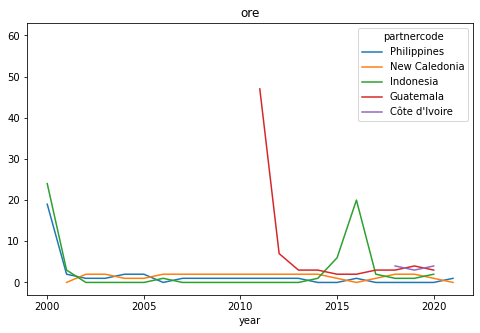

In [267]:
stat = country_stat[country_stat['sector']=='ore'].set_index(['partnercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year               2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
partnercode                                                                     
Indonesia           3.0   4.0   5.0   4.0   5.0   8.0   4.0   3.0   1.0   3.0   
New Caledonia       1.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   
Japan               0.0   1.0   0.0   2.0   1.0   1.0   0.0   1.0   3.0   0.0   
Brazil             11.0  12.0  21.0  15.0  16.0  18.0  19.0  20.0  21.0  13.0   
Colombia            5.0   3.0   2.0   1.0   2.0   2.0   2.0   2.0   2.0   2.0   
Papua New Guinea    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Myanmar             NaN  49.0   NaN   NaN   NaN  73.5   NaN   NaN   NaN   NaN   
Rep. of Korea      38.0  43.0  39.0  41.0  32.0  37.0  26.0  32.0  34.0  17.0   
Dominican Rep.      2.0   5.0   8.0   7.0   6.0   9.0   6.0   9.0   8.0  27.0   
Guatemala          58.0   NaN   NaN   NaN  72.0   NaN  71.0   NaN  84.0   NaN   
Ukraine            14.0  16.0  12.0  16.0  11.0   5.0   9.0  10.0   4.0   4.0   
Netherlands        12.0  11.0  13.0  14.0  13.0  15.0  15.0  22.0  15.0  19.0   
Philippines        37.0  42.0  45.0  23.0  44.0  21.0  23.0  19.0  19.0  14.0   
Canada              6.0   6.0   6.0   6.0   7.0   7.0   8.0   6.0   6.0   5.0   
Greece              4.0   2.0   3.0   3.0   3.0   3.0   3.0   4.0   5.0   6.0   
TFYR of Macedonia   NaN  14.0  14.0  12.0  14.0  11.0  10.0   7.0   7.0   8.0   
Finland            15.0  17.0  15.0  21.0  20.0  23.0  17.0  24.0  25.0  23.0   
United Kingdom     23.0  20.0  24.0  24.0   8.0   4.0   7.0   5.0  12.0  32.0   
Australia           7.0   8.0   9.0   8.0  10.0  10.0  11.0  11.0  10.0   9.0   
Serbia              NaN   NaN   NaN   NaN   NaN   NaN  69.0  26.0  17.0  11.0   

year               2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
partnercode                                                                     
Indonesia           4.0   1.0   4.0   3.0   1.0   0.0   0.0   0.0   0.0   0.0   
New Caledonia       0.0   0.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
Japan               1.0   3.0   0.0   1.0   4.0   2.0   3.0   2.0   2.0   2.0   
Brazil             17.0  12.0   5.0   7.0   3.0   3.0   2.0   3.0   3.0   3.0   
Colombia            3.0   5.0   2.0   2.0   2.0   4.0   4.0   4.0   4.0   4.0   
Papua New Guinea    NaN   NaN  34.0  10.0   6.0  12.0  88.5   6.0   5.0   5.0   
Myanmar             NaN   NaN   NaN  25.0  11.0   9.0   7.0   5.0   6.0  13.0   
Rep. of Korea      18.0  33.0  26.0  35.0  32.0  15.0  21.0  32.0  26.0  17.0   
Dominican Rep.     29.0  11.0  10.0  12.0  42.0  81.5  15.0  13.0  13.0   7.0   
Guatemala           NaN   NaN   NaN   NaN  26.0  14.0  13.0  16.0  15.0   8.0   
Ukraine             2.0   2.0   3.0   4.0   8.0   5.0   9.0   9.0   9.0   6.0   
Netherlands        19.0  19.0  16.0  19.0  15.0  13.0  12.0  17.0  17.0  14.0   
Philippines        12.0  13.0  12.0  13.0  12.0  10.0   8.0   8.0   8.0   9.0   
Canada              7.0   6.0   8.0   8.0   9.0   8.0   6.0   7.0   7.0  10.0   
Greece              5.0   4.0   9.0   9.0  13.0  11.0  10.0  15.0  12.0  19.0   
TFYR of Macedonia   6.0   7.0   7.0   5.0  10.0   7.0  11.0  10.0  14.0  11.0   
Finland            22.0  23.0  20.0  20.0  28.0  25.0  20.0  12.0  10.0  12.0   
United Kingdom     27.0  16.0  30.0  26.0  21.0  28.0  30.0  27.0  27.0  16.0   
Australia           9.0   9.0   6.0   6.0   5.0   6.0  14.0  14.0  23.0  24.0   
Serbia             10.0  10.0  13.0  14.0  17.0  18.0  26.0  23.0  65.0  28.0   

year               2020  2021  
partnercode                    
Indonesia           0.0   1.0  
New Caledonia       1.0   2.0  
Japan               2.0  20.0  
Brazil              3.0   3.0  
Colombia            4.0   6.0  
Papua New Guinea    5.0   NaN  
Myanmar             6.0   NaN  
Rep. of Korea       7.0   8.0  
Dominican Rep.      8.0  13.0  
Guatemala           9.0  14.0  
Ukraine            10.0  17.0  
Netherlands       

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

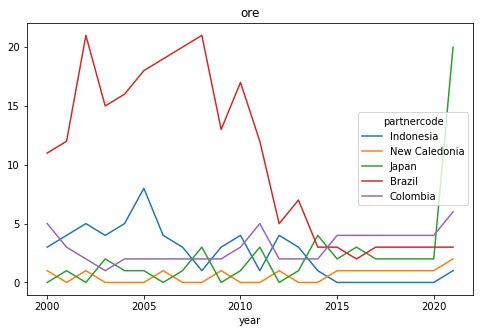

In [268]:
stat = country_stat[country_stat['sector']=='refining'].set_index(['partnercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
partnercode                                                                  
Indonesia       37.0  42.0  41.0  29.0  29.0  32.0  24.0  26.0  36.0  33.0   
China           19.0  17.0  16.0  16.0  12.0  13.0   8.0   2.0   0.0   6.0   
Finland         11.0  11.0  11.0   5.0   7.0   7.0   6.0   8.0   7.0   9.0   
Rep. of Korea    6.0   7.0   0.0   6.0   3.0   2.0   5.0   7.0   8.0   3.0   
Germany          0.0   1.0   4.0   3.0   4.0   3.0   1.0   0.0   3.0   0.0   
Japan            3.0   3.0   1.0   1.0   1.0   1.0   0.0   1.0   2.0   2.0   
Belgium          1.0   2.0   3.0   2.0   5.0   5.0   2.0   3.0   4.0   4.0   
France           2.0   0.0   2.0   0.0   2.0   0.0   3.0   6.0   5.0   7.0   
Italy            9.0  10.0   7.0   9.0   8.0   6.0   7.0   5.0   6.0   5.0   
490              8.0   6.0   5.0   4.0   6.0   4.0   4.0   4.0   1.0   1.0   
USA             10.0   9.0   8.0  10.0   0.0   8.0   9.0   9.0   9.0   8.0   
India           16.0  19.0  12.0  13.0  13.0  11.0  12.0  13.0  15.0  13.0   
Sweden           4.0   5.0   9.0   7.0   9.0  10.0  11.0  11.0  11.0  11.0   
Spain            7.0   8.0  10.0  11.0  10.0   9.0  10.0  10.0  10.0  10.0   
Netherlands     13.0  14.0  19.0  14.0  15.0  15.0  15.0  16.0  14.0  14.0   
United Kingdom   5.0   4.0   6.0   8.0  11.0  12.0  13.0  12.0  12.0  15.0   
South Africa    12.0  12.0  14.0  12.0  14.0  14.0  14.0  15.0  13.0  12.0   
Austria         20.0  15.0  21.0  21.0  19.0  17.0  19.0  18.0  17.0  18.0   
Malaysia        36.0  36.0  23.0  32.0  23.0  26.0  32.0  27.0  31.0  31.0   
Turkey          41.0  40.0  37.0  37.0  31.0  35.0  18.0  14.0  16.0  24.0   

year            2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
partnercode                                                                  
Indonesia       19.0  19.0  14.0  15.0  32.0  13.0  31.0  14.0   1.0   1.0   
China            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Finland          9.0   6.0   7.0   9.0   3.0   1.0   2.0   3.0   4.0   3.0   
Rep. of Korea    4.0   4.0   3.0   6.0   1.0   2.0   3.0   1.0   2.0   2.0   
Germany          1.0   3.0   2.0   3.0   2.0   4.0   5.0   2.0   3.0   4.0   
Japan            3.0   2.0   1.0   4.0   6.0   3.0   1.0   7.0   9.0   9.0   
Belgium          7.0   8.0   5.0   2.0   4.0   5.0   4.0   4.0   6.0   5.0   
France          10.0   9.0   8.0  10.0   7.0   7.0   7.0   6.0   7.0   7.0   
Italy            6.0   1.0   4.0   5.0   8.0   8.0   8.0   8.0   8.0   6.0   
490              5.0   5.0   6.0   1.0   5.0   6.0   6.0   5.0   5.0   8.0   
USA              8.0   7.0   9.0   8.0   9.0   9.0   9.0   9.0  10.0  10.0   
India           12.0  13.0  12.0   7.0  10.0  11.0  11.0  10.0  12.0  12.0   
Sweden          13.0  12.0  13.0  11.0  13.0  12.0  13.0  12.0  13.0  13.0   
Spain           11.0  11.0  11.0  12.0  11.0  10.0  10.0  11.0  11.0  11.0   
Netherlands     15.0  15.0  18.0  18.0  14.0  15.0  14.0  15.0  15.0  15.0   
United Kingdom  14.0  14.0  15.0  14.0  12.0  14.0  12.0  13.0  14.0  14.0   
South Africa    17.0  20.0  20.0  17.0  15.0  17.0  16.0  16.0  16.0  16.0   
Austria         22.0  21.0  23.0  21.0  17.0  20.0  19.0  17.0  18.0  18.0   
Malaysia        33.0  18.0  26.0  29.0  26.0  22.0  20.0  18.0  17.0  17.0   
Turkey          29.0  17.0  24.0  23.0  19.0  25.0  17.0  22.0  19.0  20.0   

year            2020  2021  
partnercode                 
Indonesia        0.0  21.0  
China            1.0   1.0  
Finland          2.0  14.0  
Rep. of Korea    3.0   5.0  
Germany          4.0   0.0  
Japan            5.0  15.0  
Belgium          6.0  11.0  
France           7.0   6.0  
Italy            8.0   3.0  
490              9.0   2.0  
USA             10.0   4.0  
India           11.0   9.0  
Sweden          12.0   8.0  
Spain           13.0   7.0  
Netherlands     14.0  10.0  
United Kingdom  15.0  12.0  
South Africa    16.0  19.0  
Austria        

<AxesSubplot:title={'center':'fabrication'}, xlabel='year'>

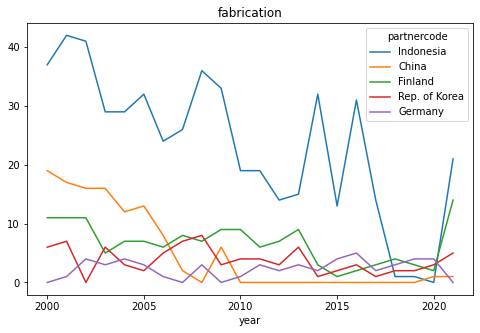

In [271]:
stat = country_stat[country_stat['sector']=='fabrication'].set_index(['partnercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='fabrication')



year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
partnercode                                                                  
China            4.0   2.0   2.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   
Germany          0.0   1.0   1.0   1.0   3.0   1.0   3.0   1.0   1.0   1.0   
USA              1.0   0.0   0.0   0.0   0.0   2.0   1.0   2.0   2.0   2.0   
Italy            3.0   3.0   3.0   4.0   5.0   3.0   4.0   3.0   3.0   3.0   
Mexico          21.0  15.0  11.0  13.0  13.0  11.0  11.0  14.0  16.0  13.0   
Japan            6.0   4.0   4.0   6.0   4.0   4.0   2.0   5.0   5.0   5.0   
France           2.0   5.0   5.0   5.0   7.0   5.0   5.0   4.0   4.0   4.0   
South Africa    36.0  32.0  36.0  34.0  40.0  32.0  35.0  31.0  30.0  28.0   
Poland          19.0  17.0  21.0  18.0  22.0  18.0  17.0  17.0  13.0  14.0   
India           28.0  28.0  13.0  26.0  24.0  19.0  19.0  19.0  14.0  10.0   
Rep. of Korea   10.0  12.0  10.0  12.0   6.0   6.0   7.0   6.0   6.0   6.0   
Netherlands      8.0   8.0   9.0  11.0  12.0   9.0   8.0  13.0   7.0  11.0   
490             12.0  13.0   7.0  14.0   2.0  12.0  10.0  10.0  12.0   8.0   
Turkey          35.0  33.0  30.0  29.0  27.0  25.0  22.0  21.0  20.0  18.0   
Thailand        20.0  21.0  16.0  19.0  15.0  15.0  16.0  15.0  15.0  17.0   
Czech Rep.      16.0  14.0  14.0  15.0  17.0  14.0  14.0  11.0  11.0  12.0   
Spain            9.0  10.0  12.0  10.0  11.0  10.0   9.0   9.0   9.0   9.0   
United Kingdom   7.0   7.0   6.0   7.0   8.0   7.0   6.0   8.0   8.0   7.0   
Austria         15.0   6.0  18.0  20.0  20.0  17.0  18.0  18.0  18.0  20.0   
Sweden          13.0  11.0  15.0  16.0  14.0  13.0  12.0  12.0  10.0  15.0   

year            2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
partnercode                                                                  
China            0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
Germany          1.0   3.0   2.0   2.0   1.0   2.0   1.0   1.0   1.0   1.0   
USA              2.0   6.0   5.0   0.0   3.0   5.0   4.0   3.0   3.0   3.0   
Italy            3.0   4.0   3.0   3.0   2.0   3.0   2.0   2.0   2.0   2.0   
Mexico          13.0  15.0  13.0  16.0  11.0  14.0   8.0   7.0   6.0   6.0   
Japan            6.0   9.0  10.0   8.0   6.0   1.0   6.0   5.0   4.0   5.0   
France           4.0   8.0   9.0   7.0   4.0   8.0   5.0   4.0   5.0   7.0   
South Africa    34.0  36.0  36.0  33.0  27.0  31.0  29.0  16.0  14.0   4.0   
Poland          19.0  17.0  18.0  15.0   9.0  11.0   9.0  10.0   7.0   8.0   
India            5.0   7.0   6.0   5.0  10.0   4.0  10.0   9.0  10.0   9.0   
Rep. of Korea    8.0   1.0   8.0   6.0   5.0   6.0   3.0   6.0   8.0  10.0   
Netherlands     16.0  11.0  12.0  14.0  12.0  20.0  14.0  14.0  12.0  13.0   
490             10.0  10.0  14.0  10.0  14.0   9.0  15.0  15.0  13.0  15.0   
Turkey          20.0  23.0  21.0  18.0  13.0  18.0  13.0  12.0  11.0  12.0   
Thailand        18.0  20.0  19.0  19.0  15.0  16.0  12.0  11.0  16.0  16.0   
Czech Rep.      17.0  16.0  16.0  13.0   7.0  12.0   7.0   8.0   9.0  14.0   
Spain            7.0  13.0  11.0  12.0   8.0  17.0  11.0  13.0  15.0  11.0   
United Kingdom  12.0  12.0  15.0   9.0  16.0  19.0  17.0  18.0  17.0  17.0   
Austria         14.0  24.0  20.0  21.0  17.0  10.0  16.0  20.0  21.0  20.0   
Sweden          21.0  22.0  22.0  22.0  19.0  22.0  19.0  19.0  18.0  18.0   

year            2020  2021  
partnercode                 
China            0.0   0.0  
Germany          1.0   2.0  
USA              2.0   3.0  
Italy            3.0   4.0  
Mexico           4.0   1.0  
Japan            5.0   9.0  
France           6.0  13.0  
South Africa     7.0  34.0  
Poland           8.0  11.0  
India            9.0  10.0  
Rep. of Korea   10.0   8.0  
Netherlands     11.0  12.0  
490             12.0   6.0  
Turkey          13.0  14.0  
Thailand        14.0   7.0  
Czech Rep.      15.0  21.0  
Spain           16.0  16.0  
United Kingdom 

<AxesSubplot:title={'center':'processed'}, xlabel='year'>

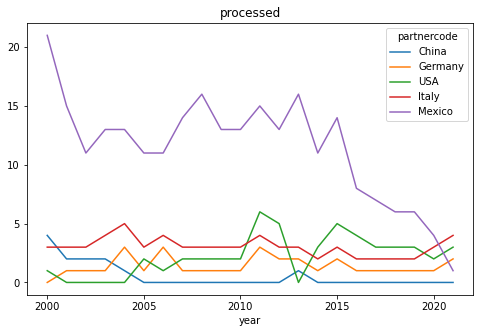

In [272]:
stat = country_stat[country_stat['sector']=='processed'].set_index(['partnercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='processed')



### netwight + ratio

year                        2000          2001           2002           2003  \
partnercode                                                                    
Philippines             0.023517  17738.956755  139417.902000  117543.976290   
New Caledonia           0.000000  41650.128000  104043.226950   98539.331202   
Indonesia               0.000234   5299.169148  283915.910070  276367.162383   
Guatemala               0.000000      0.000000       0.000000       0.000000   
Côte d'Ivoire           0.000000      0.000000       0.275301       0.000000   
Albania                 0.000000      0.000000       0.000000    3874.391703   
Australia           22548.429540    117.468000   26104.908375   18773.030016   
Turkey                  0.000000      0.000000       2.340000    2007.985590   
Russian Federation      0.000000      0.000000       0.000000       0.000000   
South Africa         1761.742827      0.000000      42.420456     112.861125   
Brazil                  0.000000      0.001521      93.536937      22.405500   
Zimbabwe              111.547917      0.000000    1381.324464    6144.346728   
USA                   138.968037  20947.019301    1431.863316    1312.765506   
Finland              2787.205122   3511.328418    1434.560400     463.487895   
Zambia                  0.000000      0.000000       0.000000       0.000000   
Kazakhstan          33168.330000      0.000000       0.000000       0.000000   
Rep. of Korea          21.385026      0.000000      19.106685       8.190000   
Switzerland             0.018720      0.000234       2.688777       0.639756   
Malaysia                0.000000      0.000000       2.704104       0.001404   
Japan                  14.000688      0.003627       5.741424      29.842371   

year                         2004           2005           2006          2007  \
partnercode                                                                     
Philippines         128741.191254  192286.274544  506719.159596  1.057751e+06   
New Caledonia       212189.840460  196111.679517  142345.386378  2.519523e+05   
Indonesia           285618.322080  326277.060642  395807.162985  1.164653e+06   
Guatemala                0.000000       0.000000       0.000000  0.000000e+00   
Côte d'Ivoire            0.000000       0.000000       0.000000  0.000000e+00   
Albania               7233.186870   11610.155466   16257.896694  2.806113e+04   
Australia            21279.250980   25179.452883   31513.725594  3.517559e+04   
Turkey                 392.067702    5138.822871    5685.964362  5.856808e+03   
Russian Federation       0.234000       0.000000       0.000000  2.340000e-04   
South Africa           917.475273    5307.439293     730.963467  8.537172e+03   
Brazil                  25.612821       1.440738       2.351700  1.347711e+01   
Zimbabwe              6492.798000    7607.118168    7581.018276  7.315965e+03   
USA                   1501.262802    2550.750930    3530.742111  4.206343e+03   
Finland                  0.351000       1.881126       0.000000  5.323500e-02   
Zambia                   5.850000       0.000000       0.000000  1.170234e+01   
Kazakhstan            7271.791956    2925.234000       0.000000  4.078433e+01   
Rep. of Korea            6.563583      14.040000      36.743265  5.565339e+01   
Switzerland              0.000000       0.000000       0.000000  0.000000e+00   
Malaysia                13.641615      11.349117      21.735558  5.679051e+01   
Japan                   47.771217       2.411019     181.655721  6.235687e+02   

year                        2008          2009          2010          2011  \
partnercode                                                                  
Philippines         5.874702e+05  1.120518e+06  1.652345e+06  2.684267e+06   
New Caledonia       1.827457e+05  2.096939e+05  2.652534e+05  2.610038e+05   
Indonesia           1.186188e+06  1.187942e+06  1.879075e+06  3.401905e+06   
Guatemala           0.000000e+00  0.000000e+00  0.000000e+00  9.00

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

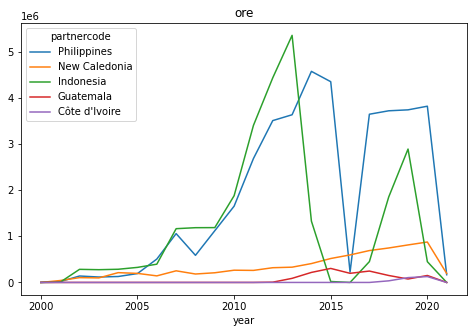

In [273]:
stat = country_stat[country_stat['sector']=='ore'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                          2000   2001   2002   2003   2004   2005   2006  \
partnercode                                                                    
Philippines                  0.000  0.199  0.248  0.223  0.191  0.244  0.448   
New Caledonia                0.000  0.466  0.185  0.187  0.314  0.249  0.126   
Indonesia                    0.000  0.059  0.504  0.524  0.423  0.415  0.350   
Guatemala                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Côte d'Ivoire                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Albania                      0.000  0.000  0.000  0.007  0.011  0.015  0.014   
Australia                    0.354  0.001  0.046  0.036  0.032  0.032  0.028   
Turkey                       0.000  0.000  0.000  0.004  0.001  0.007  0.005   
Russian Federation           0.000  0.000  0.000  0.000  0.000  0.000  0.000   
South Africa                 0.028  0.000  0.000  0.000  0.001  0.007  0.001   
Brazil                       0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Zimbabwe                     0.002  0.000  0.002  0.012  0.010  0.010  0.007   
USA                          0.002  0.235  0.003  0.002  0.002  0.003  0.003   
Finland                      0.044  0.039  0.003  0.001  0.000  0.000  0.000   
Zambia                       0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Kazakhstan                   0.521  0.000  0.000  0.000  0.011  0.004  0.000   
Rep. of Korea                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Switzerland                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Malaysia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Japan                        0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Norway                       0.046  0.000  0.006  0.001  0.002  0.001  0.001   
Thailand                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Netherlands                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
490                          0.001  0.000  0.000  0.000  0.000  0.000  0.000   
China                        0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Spain                        0.000  0.000  0.000  0.000  0.000  0.012  0.009   
Italy                        0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Germany                      0.000  0.000  0.001  0.000  0.000  0.000  0.000   
Singapore                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Mexico                       0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Slovenia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Ethiopia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
France                       0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Slovakia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
India                        0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Estonia                      0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Uruguay                      0.000  0.000  0.000  0.000  0.000  0.000  0.000   
United Arab Emirates         0.000  0.000  0.000  0.000  0.000  0.000  0.000   
United Kingdom               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Venezuela                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Canada                       0.000  0.000  0.000  0.000  0.000  0.001  0.002   
Czech Rep.                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Belgium                      0.000  0.000  0.001  0.001  0.000  0.000  0.000   
Papua New Guinea             0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Cuba                         0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Other Europe, nes            0.000  0.000  0.000  0.000  0.000  0.000  0.000   
China, Hong Kong SAR         0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Viet Nam                     0.000  0.000  0.000  0.000  0.000  0.000  0.000   


<AxesSubplot:xlabel='year'>

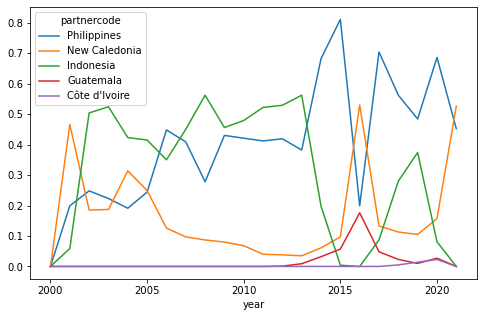

In [274]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                        2000           2001           2002           2003  \
partnercode                                                                     
China               15981.758355   33387.173825  375175.102335  127520.823679   
Indonesia          267552.659622  276548.303172  260955.488415  301769.429065   
New Caledonia      474321.530607  602695.148580  595817.031750  590267.821110   
Japan              599829.942373  623960.839198  647045.422136  741666.577665   
Rep. of Korea      277922.206164  387273.744096  340835.959070  503411.059356   
Brazil              40269.262524   35224.289271   28070.623374   31707.373029   
Netherlands        136112.848650  231449.756901  291460.614495  393440.572644   
Colombia           166051.470914  329216.297730  410863.979979  487764.875685   
Papua New Guinea        0.000000       0.000000     148.500000       0.000000   
Finland            103732.891820  117986.790298  140811.564681   99178.153419   
490                354727.459476  328599.122458  398780.617795  462037.766408   
India                1279.026279     728.056542    2395.500092   15893.890353   
Myanmar                 1.266000      58.320000      15.741000       0.000000   
Dominican Rep.     290336.311536  230281.254768  152148.009051  194250.235776   
Canada              96603.429186  197307.540392  252696.854325  312956.692237   
Ukraine             25368.790215   22636.828644   73231.412170   21575.805336   
Guatemala               5.559075       0.000000       4.920750       0.877500   
Philippines           566.669586     606.336021    1168.571741    9910.888557   
Greece             214659.123846  356292.607632  360749.691375  338084.454232   
TFYR of Macedonia       5.203500   29108.353200   58390.864227   62194.158096   

year                        2004           2005          2006           2007  \
partnercode                                                                    
China              202681.210004  325978.773228  3.885093e+05  381287.074259   
Indonesia          259713.805187  224996.657359  3.232515e+05  377949.117910   
New Caledonia      605902.994544  635434.693968  6.818560e+05  623537.913168   
Japan              880041.223041  915473.659770  1.004901e+06  868840.602384   
Rep. of Korea      555122.425597  575337.293590  5.535728e+05  313180.676229   
Brazil              33672.633622   33772.350798  3.743209e+04   47361.736350   
Netherlands        606576.322743  346792.603641  4.943380e+05  525887.232966   
Colombia           469980.994619  512423.685111  5.267279e+05  462594.524884   
Papua New Guinea        0.000000       0.000000  0.000000e+00       0.000000   
Finland             72138.651834   45479.640802  8.712558e+04   71629.556871   
490                434219.291105  458581.970860  4.842210e+05  406312.617410   
India               16116.822189    6079.941384  5.508226e+04   58710.175767   
Myanmar                 4.540350       0.773475  1.080000e+00       2.532000   
Dominican Rep.     242336.355708  189470.446320  2.522685e+05  174956.972064   
Canada             347522.883936  324770.974669  2.840516e+05  332906.627430   
Ukraine            123685.352454  285105.125077  1.878106e+05  155449.086885   
Guatemala               2.502311       0.733375  4.948875e+00    1094.251762   
Philippines          2026.190172   14118.494959  3.093225e+04   36725.174991   
Greece             280877.709846  392691.430314  3.676882e+05  348939.711129   
TFYR of Macedonia   64495.548761  125277.945192  1.786614e+05  251390.440472   

year                        2008           2009           2010           2011  \
partnercode                                                                     
China              345095.800982  895107.309855  551574.720150  603255.944112   
Indonesia          490101.105789  421747.364061  435991.159700  507251.686840   
New Caledonia      501460.555728  579711.489402  657269.829876  796648.155813   
Japan              691285.952782  707699.244882  97

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

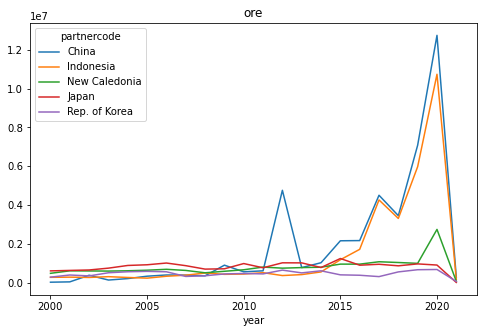

In [254]:
stat = country_stat[country_stat['sector']=='refining'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                                     2000   2001   2002   2003   2004  \
partnercode                                                                 
China                                   0.004  0.007  0.062  0.019  0.028   
Indonesia                               0.071  0.057  0.043  0.045  0.036   
New Caledonia                           0.125  0.124  0.098  0.088  0.084   
Japan                                   0.158  0.129  0.107  0.111  0.122   
Rep. of Korea                           0.073  0.080  0.056  0.075  0.077   
Brazil                                  0.011  0.007  0.005  0.005  0.005   
Netherlands                             0.036  0.048  0.048  0.059  0.084   
Colombia                                0.044  0.068  0.068  0.073  0.065   
Papua New Guinea                        0.000  0.000  0.000  0.000  0.000   
Finland                                 0.027  0.024  0.023  0.015  0.010   
490                                     0.093  0.068  0.066  0.069  0.060   
India                                   0.000  0.000  0.000  0.002  0.002   
Myanmar                                 0.000  0.000  0.000  0.000  0.000   
Dominican Rep.                          0.077  0.048  0.025  0.029  0.034   
Canada                                  0.025  0.041  0.042  0.047  0.048   
Ukraine                                 0.007  0.005  0.012  0.003  0.017   
Guatemala                               0.000  0.000  0.000  0.000  0.000   
Philippines                             0.000  0.000  0.000  0.001  0.000   
Greece                                  0.057  0.074  0.060  0.051  0.039   
TFYR of Macedonia                       0.000  0.006  0.010  0.009  0.009   
Belgium                                 0.024  0.039  0.013  0.008  0.011   
United Kingdom                          0.012  0.019  0.022  0.017  0.036   
USA                                     0.016  0.027  0.015  0.021  0.025   
Italy                                   0.009  0.016  0.021  0.026  0.020   
Germany                                 0.019  0.018  0.030  0.015  0.015   
Norway                                  0.012  0.000  0.011  0.009  0.010   
Australia                               0.023  0.017  0.022  0.021  0.017   
Serbia                                  0.000  0.000  0.000  0.000  0.000   
France                                  0.025  0.024  0.026  0.039  0.027   
Turkey                                  0.000  0.000  0.000  0.000  0.000   
South Africa                            0.001  0.001  0.001  0.007  0.009   
Spain                                   0.009  0.012  0.008  0.027  0.019   
Malaysia                                0.001  0.001  0.001  0.001  0.001   
Sweden                                  0.002  0.002  0.002  0.003  0.001   
Singapore                               0.001  0.001  0.007  0.001  0.001   
Switzerland                             0.001  0.000  0.003  0.008  0.006   
Cuba                                    0.001  0.003  0.008  0.001  0.001   
China, Hong Kong SAR                    0.005  0.002  0.005  0.003  0.004   
Albania                                 0.000  0.000  0.000  0.000  0.000   
Russian Federation                      0.014  0.005  0.012  0.014  0.018   
Special Categories                      0.000  0.000  0.000  0.000  0.000   
Thailand                                0.001  0.000  0.001  0.000  0.000   
Slovenia                                0.000  0.000  0.000  0.000  0.000   
Viet Nam                                0.000  0.000  0.000  0.000  0.000   
Mexico                                  0.000  0.000  0.000  0.000  0.000   
Luxembourg                              0.000  0.000  0.000  0.001  0.000   
Czech Rep.                              0.001  0.001  0.001  0.001  0.001   
United Arab Emirates                    0.000  0.000  0.000  0.000  0.000   
Austria                                 0.002  0.002  0.001  0.001  0.001   
Poland                                  0.001  0.000  0.001  0.001  0.001

<AxesSubplot:xlabel='year'>

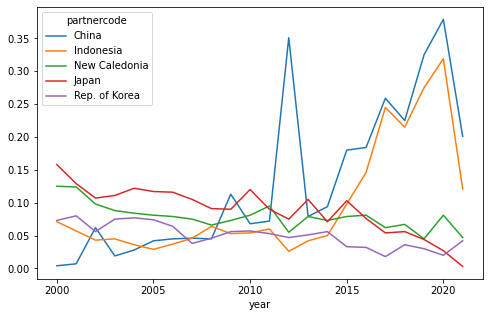

In [255]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                          2000          2001          2002          2003  \
partnercode                                                                    
China                 1.039806e+06  7.747326e+05  1.611288e+06  2.148733e+06   
Indonesia             6.661077e+04  5.781404e+04  1.428412e+05  1.339074e+05   
Germany               2.095926e+06  1.929166e+06  2.043943e+06  1.897446e+06   
Rep. of Korea         8.198554e+05  8.137837e+05  5.094712e+07  1.112242e+06   
Italy                 1.223282e+06  1.279800e+06  1.467701e+06  1.468134e+06   
490                   7.303497e+05  8.161300e+05  1.716021e+06  1.323679e+06   
France                1.734919e+06  1.907327e+06  2.286918e+06  2.270277e+06   
USA                   1.295675e+06  1.255650e+06  1.422835e+06  1.250558e+06   
Japan                 9.591509e+05  8.900577e+05  2.324354e+06  1.435968e+06   
Belgium               1.539042e+06  1.545758e+06  2.025479e+06  1.703157e+06   
Finland               4.184291e+05  4.217633e+05  4.855427e+05  7.745609e+05   
India                 1.398163e+05  1.672325e+05  4.572784e+05  4.169937e+05   
Netherlands           4.233344e+05  4.932376e+05  5.001412e+05  5.666112e+05   
Viet Nam              3.134974e+04  4.156246e+04  6.876316e+04  7.133436e+04   
China, Hong Kong SAR  7.368057e+05  7.940032e+05  8.796595e+05  8.320111e+05   
Turkey                8.712772e+04  7.762764e+04  1.328720e+05  1.925213e+05   
Spain                 6.518302e+05  7.078010e+05  7.623404e+05  8.230244e+05   
Sweden                7.428013e+05  7.219961e+05  8.749931e+05  1.153776e+06   
United Kingdom        1.007780e+06  1.110583e+06  1.252362e+06  1.124834e+06   
Malaysia              9.289973e+04  1.013123e+05  1.921829e+05  1.500300e+05   

year                          2004          2005          2006          2007  \
partnercode                                                                    
China                 2.399980e+06  2.514290e+06  2.805265e+06  2.402314e+06   
Indonesia             1.487063e+05  1.931359e+05  2.291578e+05  2.313944e+05   
Germany               2.220197e+06  2.009552e+06  2.469873e+06  2.396387e+06   
Rep. of Korea         1.535903e+06  1.526744e+06  1.545457e+06  1.270633e+06   
Italy                 1.711518e+06  1.645126e+06  2.074850e+06  1.909781e+06   
490                   1.434264e+06  1.371491e+06  1.466145e+06  1.252562e+06   
France                2.207263e+06  2.031614e+06  2.060278e+06  1.767352e+06   
USA                   2.419287e+07  1.489274e+06  2.048151e+06  1.519542e+06   
Japan                 1.888871e+06  1.338163e+06  3.174221e+06  1.421565e+06   
Belgium               1.770537e+06  1.411981e+06  1.660703e+06  1.329024e+06   
Finland               9.173248e+05  8.946354e+05  9.804624e+05  7.963003e+05   
India                 4.473456e+05  5.704261e+05  6.434211e+05  6.190084e+05   
Netherlands           6.742903e+05  7.029330e+05  9.750622e+05  8.324685e+05   
Viet Nam              8.208636e+04  1.033572e+05  1.289376e+05  1.948615e+05   
China, Hong Kong SAR  6.818201e+05  4.953439e+05  6.648681e+05  3.939340e+05   
Turkey                2.072070e+05  2.328331e+05  3.932570e+05  6.559771e+05   
Spain                 8.632773e+05  7.937784e+05  9.614517e+05  8.503068e+05   
Sweden                1.210993e+06  1.004591e+06  9.842729e+05  7.697035e+05   
United Kingdom        9.600285e+05  8.737412e+05  7.834509e+05  7.564553e+05   
Malaysia              2.027432e+05  1.868471e+05  2.284954e+05  2.728577e+05   

year                          2008          2009          2010          2011  \
partnercode                                                                    
China                 2.423187e+06  1.962782e+06  3.236819e+06  3.464471e+06   
Indonesia             1.714389e+05  1.509414e+05  3.567849e+05  4.308815e+05   
Germany               2.241886e+06  1.667988e+06  3.009671e+06  2.242861e+06   
Rep. of Korea         1.266391e+06  1.317906e+06  1.607145e+06  1.729270e+06  

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

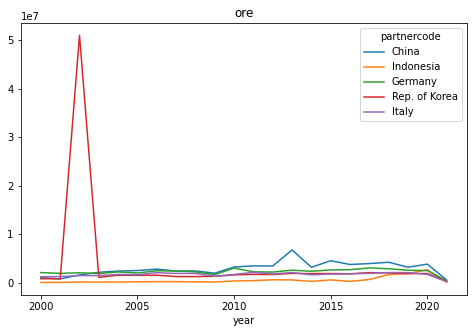

In [252]:
stat = country_stat[country_stat['sector']=='fabrication'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
China                                         0.055  0.041  0.021  0.086   
Indonesia                                     0.004  0.003  0.002  0.005   
Germany                                       0.110  0.101  0.027  0.076   
Rep. of Korea                                 0.043  0.043  0.669  0.044   
Italy                                         0.064  0.067  0.019  0.059   
490                                           0.038  0.043  0.023  0.053   
France                                        0.091  0.100  0.030  0.091   
USA                                           0.068  0.066  0.019  0.050   
Japan                                         0.051  0.047  0.031  0.057   
Belgium                                       0.081  0.081  0.027  0.068   
Finland                                       0.022  0.022  0.006  0.031   
India                                         0.007  0.009  0.006  0.017   
Netherlands                                   0.022  0.026  0.007  0.023   
Viet Nam                                      0.002  0.002  0.001  0.003   
China, Hong Kong SAR                          0.039  0.042  0.012  0.033   
Turkey                                        0.005  0.004  0.002  0.008   
Spain                                         0.034  0.037  0.010  0.033   
Sweden                                        0.039  0.038  0.011  0.046   
United Kingdom                                0.053  0.058  0.016  0.045   
Malaysia                                      0.005  0.005  0.003  0.006   
Thailand                                      0.012  0.013  0.006  0.012   
Poland                                        0.003  0.004  0.001  0.004   
Russian Federation                            0.007  0.005  0.002  0.007   
Austria                                       0.010  0.011  0.003  0.009   
Mexico                                        0.015  0.013  0.004  0.013   
Canada                                        0.012  0.014  0.005  0.014   
Brazil                                        0.007  0.007  0.002  0.008   
Czech Rep.                                    0.003  0.004  0.001  0.003   
Singapore                                     0.006  0.006  0.005  0.006   
Switzerland                                   0.010  0.010  0.002  0.007   
South Africa                                  0.011  0.011  0.004  0.015   
United Arab Emirates                          0.011  0.008  0.001  0.004   
Slovenia                                      0.004  0.004  0.001  0.003   
Denmark                                       0.005  0.005  0.002  0.005   
Australia                                     0.005  0.006  0.003  0.009   
Egypt                                         0.001  0.001  0.000  0.002   
Romania                                       0.004  0.003  0.001  0.004   
Pakistan                                      0.001  0.001  0.000  0.001   
Saudi Arabia                                  0.001  0.002  0.001  0.002   
Bangladesh                                    0.000  0.000  0.000  0.000   
Ukraine                                       0.003  0.003  0.001  0.003   
Hungary                                       0.002  0.002  0.001  0.002   
Portugal                                      0.003  0.003  0.001  0.003   
Philippines                                   0.002  0.002  0.001  0.001   
Slovakia                                      0.001  0.001  0.002  0.001   
Luxembourg                                    0.001  0.002  0.000  0.001   
Norway                                        0.003  0.004  0.001  0.003   
Colombia                                      0.000  0.001  0.000  0.001   
Areas, nes                                    0.001  0.001  0.001  0.000   
Bulgaria                                      0.000  0.000  0.000  0.000   
Argentina                                     0.

<AxesSubplot:xlabel='year'>

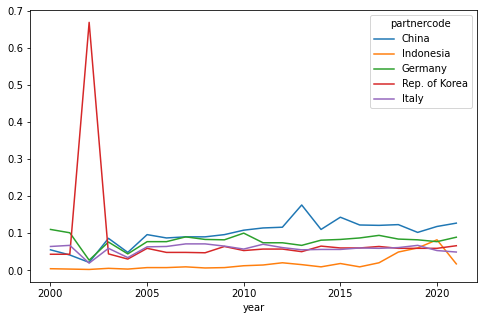

In [253]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                        2000          2001          2002          2003  \
partnercode                                                                  
USA                 1.080333e+06  1.393775e+06  1.949885e+06  1.969998e+06   
China               4.172454e+05  4.638475e+05  8.150476e+05  8.721461e+05   
Germany             1.068047e+06  9.922769e+05  1.410808e+06  1.239197e+06   
Italy               4.583247e+05  4.629007e+05  6.528324e+05  5.535253e+05   
United Kingdom      3.571184e+05  3.965851e+05  4.800860e+05  4.159497e+05   
France              6.193064e+05  5.089645e+05  5.819164e+05  5.838690e+05   
Mexico              1.513055e+05  1.750534e+05  2.134851e+05  2.035887e+05   
Japan               3.383443e+05  4.219140e+05  5.756239e+05  4.451476e+05   
India               4.510688e+04  4.897043e+04  1.490814e+05  8.853542e+04   
Turkey              5.586095e+04  4.400292e+04  7.183261e+04  8.303845e+04   
Russian Federation  7.757659e+04  8.466142e+04  1.246368e+05  1.600178e+05   
Poland              1.258362e+05  1.338012e+05  1.495754e+05  1.680764e+05   
Netherlands         3.161700e+05  3.334894e+05  4.119181e+05  3.291700e+05   
Rep. of Korea       1.656313e+05  1.562202e+05  1.950280e+05  1.968195e+05   
Canada              3.780223e+05  3.972416e+05  4.075542e+05  4.127077e+05   
Spain               2.682890e+05  2.640292e+05  2.820096e+05  3.218215e+05   
Thailand            9.192457e+04  9.805030e+04  1.459807e+05  1.407809e+05   
South Africa        3.986764e+04  4.467470e+04  4.482777e+04  7.271328e+04   
Brazil              7.262676e+04  7.744898e+04  9.466628e+04  8.400056e+04   
490                 1.604139e+05  1.483272e+05  2.146383e+05  1.713572e+05   

year                        2004          2005          2006          2007  \
partnercode                                                                  
USA                 2.049372e+07  1.589227e+06  1.990491e+06  1.746828e+06   
China               9.175390e+06  1.253348e+06  1.648172e+06  1.685881e+06   
Germany             1.676468e+06  1.377852e+06  1.545445e+06  1.630686e+06   
Italy               6.838666e+05  6.248927e+05  7.383718e+05  7.568722e+05   
United Kingdom      5.247626e+05  4.530665e+05  5.822705e+05  4.661532e+05   
France              6.587704e+05  6.666328e+05  6.793678e+05  7.356728e+05   
Mexico              2.304160e+05  2.498793e+05  2.787578e+05  2.678714e+05   
Japan               7.810286e+05  4.969223e+05  1.176254e+06  5.515683e+05   
India               1.259683e+05  1.456866e+05  1.922821e+05  2.467166e+05   
Turkey              1.079445e+05  1.291218e+05  2.005390e+05  1.850691e+05   
Russian Federation  1.828054e+05  2.023413e+05  2.489664e+05  2.523704e+05   
Poland              1.642242e+05  1.809634e+05  2.325679e+05  2.480762e+05   
Netherlands         3.442457e+05  3.780431e+05  4.480273e+05  3.782628e+05   
Rep. of Korea       4.469976e+05  2.828251e+05  3.872164e+05  4.004516e+05   
Canada              5.237567e+05  4.498548e+05  4.877872e+05  4.657616e+05   
Spain               3.532526e+05  3.566405e+05  3.827401e+05  3.703401e+05   
Thailand            1.948697e+05  1.824080e+05  2.099802e+05  2.181836e+05   
South Africa        6.977645e+04  8.751352e+04  9.580583e+04  1.140860e+05   
Brazil              1.713149e+05  1.168314e+05  1.346664e+05  1.413292e+05   
490                 1.068134e+06  2.107111e+05  2.489832e+05  2.288004e+05   

year                        2008          2009          2010          2011  \
partnercode                                                                  
USA                 1.610464e+06  1.258821e+06  1.934213e+06  2.176750e+06   
China               1.879548e+06  1.525966e+06  7.551772e+06  1.220199e+07   
Germany             1.733974e+06  1.244223e+06  2.225591e+06  2.510501e+06   
Italy               8.677107e+05  6.099317e+05  1.212397e+06  1.436843e+06   
United Kingdom      4.754215e+05  4.046895e+05  4.464358e+05  5.151539e+05   
France              

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

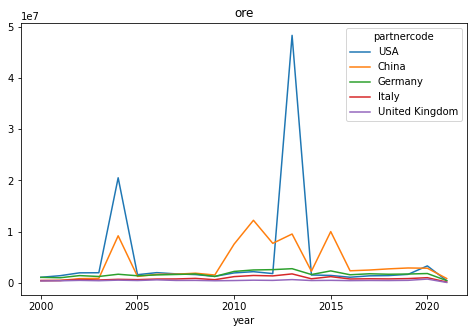

In [249]:
stat = country_stat[country_stat['sector']=='processed'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
USA                                           0.059  0.074  0.079  0.078   
China                                         0.023  0.025  0.033  0.034   
Germany                                       0.058  0.053  0.057  0.049   
Italy                                         0.025  0.025  0.026  0.022   
United Kingdom                                0.020  0.021  0.020  0.017   
France                                        0.034  0.027  0.024  0.023   
Mexico                                        0.008  0.009  0.009  0.008   
Japan                                         0.019  0.022  0.023  0.018   
India                                         0.003  0.003  0.006  0.004   
Turkey                                        0.003  0.003  0.003  0.003   
Russian Federation                            0.004  0.005  0.005  0.007   
Poland                                        0.007  0.007  0.006  0.007   
Netherlands                                   0.017  0.018  0.017  0.013   
Rep. of Korea                                 0.009  0.008  0.008  0.008   
Canada                                        0.021  0.021  0.017  0.016   
Spain                                         0.015  0.014  0.012  0.013   
Thailand                                      0.005  0.005  0.006  0.006   
South Africa                                  0.002  0.003  0.002  0.003   
Brazil                                        0.004  0.004  0.004  0.004   
490                                           0.009  0.008  0.009  0.007   
Belgium                                       0.013  0.011  0.011  0.011   
Indonesia                                     0.004  0.003  0.003  0.004   
Viet Nam                                      0.002  0.002  0.002  0.002   
Czech Rep.                                    0.007  0.008  0.008  0.007   
Malaysia                                      0.005  0.005  0.004  0.008   
Austria                                       0.009  0.014  0.007  0.007   
United Arab Emirates                          0.003  0.003  0.003  0.005   
Sweden                                        0.009  0.010  0.008  0.008   
Denmark                                       0.006  0.006  0.005  0.005   
Hungary                                       0.003  0.003  0.003  0.003   
Australia                                     0.004  0.004  0.007  0.026   
Saudi Arabia                                  0.002  0.002  0.002  0.003   
Pakistan                                      0.001  0.001  0.001  0.001   
Philippines                                   0.002  0.002  0.002  0.002   
Kazakhstan                                    0.001  0.001  0.001  0.001   
Ukraine                                       0.002  0.002  0.002  0.002   
Colombia                                      0.001  0.001  0.001  0.001   
China, Hong Kong SAR                          0.005  0.004  0.005  0.004   
Singapore                                     0.019  0.005  0.008  0.006   
Portugal                                      0.006  0.004  0.004  0.004   
Egypt                                         0.002  0.002  0.001  0.001   
Finland                                       0.005  0.006  0.005  0.005   
Romania                                       0.002  0.002  0.002  0.002   
Chile                                         0.001  0.001  0.001  0.002   
Switzerland                                   0.008  0.007  0.006  0.005   
Peru                                          0.001  0.001  0.001  0.001   
Israel                                        0.002  0.002  0.001  0.001   
Slovakia                                      0.002  0.002  0.002  0.002   
Argentina                                     0.002  0.002  0.001  0.002   
Nigeria                                       0.001  0.001  0.001  0.001   
Iraq                                          0.

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

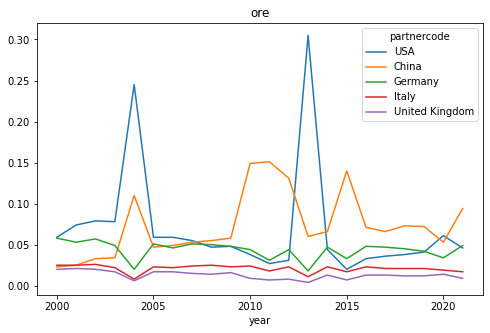

In [251]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


### netweight_export

In [393]:
# ex - im
temp1 = tradeBysector.groupby(['sector', 'partnercode', 'year'])['new_netweight'].sum().fillna(0)#.reset_index()
temp2 = tradeBysector.groupby(['sector', 'reportercode', 'year'])['new_netweight'].sum().fillna(0)#.reset_index()
temp1.index.names = temp2.index.names = ['sector', 'country', 'year']#, 'netimport_weight']


In [394]:
country_stat = (temp1 - temp2).reset_index().fillna(0)
country_stat.loc[country_stat['new_netweight']<=0, 'new_netweight'] = 0


year                          2015          2016           2017          2018  \
country                                                                         
Indonesia             20498.604750     63.082773  451295.045604  1.851022e+06   
Australia             23194.163070      0.000000    8662.630860  0.000000e+00   
Turkey                10968.602580   1423.373211   27192.173346  0.000000e+00   
Russian Federation        0.000000      0.000000   11895.638274  0.000000e+00   
South Africa          14835.958371  16253.879148   24580.814778  1.752344e+04   
Brazil                13784.438655   1910.757186      36.682659  0.000000e+00   
USA                    8079.106698   4650.908067    7241.778531  2.448609e+03   
Finland                   0.000000      0.000000       0.000000  0.000000e+00   
Zambia                    0.000000      0.000000       0.000000  0.000000e+00   
Switzerland               0.000000    526.506669     327.802527  3.617482e+02   
Thailand                227.448819    122.322096     122.220423  1.288781e+02   
Netherlands              68.367663      0.000000       0.000000  4.049522e+01   
Spain                 15162.876846   1046.270043       3.547440  6.328530e-01   
Malaysia                121.098276      0.000000     467.346906  7.822002e+02   
Italy                     0.000000      0.000000       0.000000  0.000000e+00   
France                    0.000000      0.000000       0.000000  0.000000e+00   
Slovakia                  0.269919      0.000000       0.000000  0.000000e+00   
United Arab Emirates      0.000000      0.000000       0.000000  0.000000e+00   
United Kingdom           13.168350     10.238787       5.175729  2.969097e+01   
Viet Nam              11031.542847      0.000234       0.000000  0.000000e+00   

year                          2019           2020         2021  
country                                                         
Indonesia             2.850098e+06  449877.276927     0.000000  
Australia             2.513744e+04   27686.925396     0.000000  
Turkey                2.389427e+03   25799.564934     0.000000  
Russian Federation    8.787342e+03   14876.867889     0.000000  
South Africa          1.881710e+04   13270.919220     0.000000  
Brazil                0.000000e+00    5728.815261     0.000000  
USA                   6.815111e+02    1873.615653  3868.461909  
Finland               0.000000e+00    1786.550571     0.000000  
Zambia                0.000000e+00    1528.007481     0.000000  
Switzerland           0.000000e+00     138.698586   765.596637  
Thailand              9.949306e+01      84.693960     0.000000  
Netherlands           1.717513e+01      68.000400     0.000000  
Spain                 2.982798e+00      17.859699     0.000000  
Malaysia              1.318123e+02      10.083528     0.000000  
Italy                 0.000000e+00       6.172101     0.000000  
France                0.000000e+00       1.696851     0.000000  
Slovakia              0.000000e+00       1.612611     0.000000  
United Arab Emirates  0.000000e+00       0.346203     0.000000  
United Kingdom        7.444125e+00       0.163683     0.000000  
Viet Nam              0.000000e+00       0.017082     0.000000

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

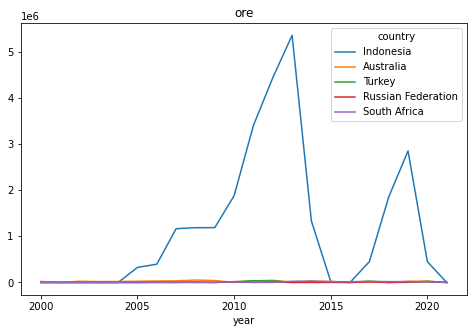

In [395]:
stat = country_stat[country_stat['sector']=='ore'].set_index(['country', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat[range(2015, 2022)].head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                          2015   2016   2017   2018   2019   2020   2021
country                                                                     
Indonesia                    0.031  0.002  0.823  0.330  0.429  0.829  0.000
Australia                    0.035  0.000  0.016  0.000  0.004  0.051  0.000
Turkey                       0.017  0.038  0.050  0.000  0.000  0.048  0.000
Russian Federation           0.000  0.000  0.022  0.000  0.001  0.027  0.000
South Africa                 0.022  0.434  0.045  0.003  0.003  0.024  0.000
Brazil                       0.021  0.051  0.000  0.000  0.000  0.011  0.000
USA                          0.012  0.124  0.013  0.000  0.000  0.003  0.835
Finland                      0.000  0.000  0.000  0.000  0.000  0.003  0.000
Zambia                       0.000  0.000  0.000  0.000  0.000  0.003  0.000
Switzerland                  0.000  0.014  0.001  0.000  0.000  0.000  0.165
Thailand                     0.000  0.003  0.000  0.000  0.000  0.000  0.000
Netherlands                  0.000  0.000  0.000  0.000  0.000  0.000  0.000
Spain                        0.023  0.028  0.000  0.000  0.000  0.000  0.000
Malaysia                     0.000  0.000  0.001  0.000  0.000  0.000  0.000
Italy                        0.000  0.000  0.000  0.000  0.000  0.000  0.000
France                       0.000  0.000  0.000  0.000  0.000  0.000  0.000
Slovakia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000
United Arab Emirates         0.000  0.000  0.000  0.000  0.000  0.000  0.000
United Kingdom               0.000  0.000  0.000  0.000  0.000  0.000  0.000
Viet Nam                     0.017  0.000  0.000  0.000  0.000  0.000  0.000
Austria                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
Romania                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
Rep. of Korea                0.000  0.000  0.000  0.000  0.000  0.000  0.000
Ukraine                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
World                        0.000  0.000  0.000  0.000  0.000  0.000  0.000
Poland                       0.000  0.000  0.000  0.000  0.000  0.000  0.000
Philippines                  0.000  0.000  0.000  0.664  0.562  0.000  0.000
Papua New Guinea             0.000  0.000  0.000  0.000  0.000  0.000  0.000
Other Europe, nes            0.000  0.000  0.000  0.000  0.000  0.000  0.000
Portugal                     0.000  0.000  0.000  0.000  0.000  0.000  0.000
Serbia                       0.000  0.000  0.016  0.000  0.000  0.000  0.000
Saudi Arabia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000
Singapore                    0.000  0.000  0.000  0.000  0.000  0.000  0.000
Slovenia                     0.000  0.000  0.000  0.000  0.000  0.000  0.000
Venezuela                    0.000  0.000  0.000  0.000  0.000  0.000  0.000
Norway                       0.000  0.011  0.000  0.000  0.000  0.000  0.000
Sweden                       0.000  0.000  0.000  0.000  0.000  0.000  0.000
Uruguay                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
TFYR of Macedonia            0.000  0.000  0.000  0.000  0.000  0.000  0.000
United Rep. of Tanzania      0.000  0.000  0.000  0.000  0.000  0.000  0.000
Oman                         0.000  0.000  0.000  0.000  0.000  0.000  0.000
490                          0.000  0.000  0.000  0.000  0.000  0.000  0.000
Nigeria                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
New Zealand                  0.000  0.000  0.000  0.000  0.000  0.000  0.000
Areas, nes                   0.000  0.000  0.000  0.000  0.000  0.000  0.000
Argentina                    0.000  0.000  0.000  0.000  0.000  0.000  0.000
Belgium                      0.000  0.000  0.001  0.000  0.000  0.000  0.000
Bolivia                      0.000  0.000  0.000  0.000  0.000  0.000  0.000
Bulgaria                     0.000  0.000  0.000  0.000  0.000  0.000  0.000
Canada                       0.041  0.276  0.014  0.002  0.001  0.000  0.

<AxesSubplot:xlabel='year'>

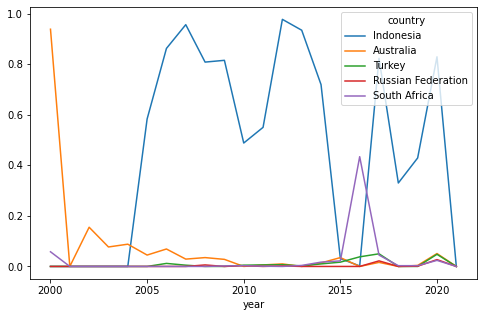

In [396]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat[range(2015, 2022)]
stat.head(5).T.plot(figsize=(8, 5))


year                        2015          2016          2017          2018  \
country                                                                      
Indonesia           1.167097e+06  1.702894e+06  4.250941e+06  3.265968e+06   
Brazil              2.247630e+05  4.732706e+05  5.860512e+05  5.089523e+05   
Colombia            4.034408e+05  3.923652e+05  4.452968e+05  4.722704e+05   
Myanmar             2.264973e+05  0.000000e+00  3.591043e+05  2.243876e+05   
Dominican Rep.      0.000000e+00  6.914961e+04  1.191912e+05  1.147660e+05   
Guatemala           8.215410e+04  1.042331e+05  8.427314e+04  9.100852e+04   
Ukraine             3.053246e+05  1.764988e+05  1.817638e+05  1.762644e+05   
Philippines         1.993617e+05  1.786993e+05  1.878567e+05  1.706342e+05   
Greece              1.963035e+05  1.505881e+05  1.101314e+05  1.205151e+05   
TFYR of Macedonia   2.650022e+05  1.196973e+05  1.633907e+05  1.146184e+05   
Finland             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Serbia              4.700897e+04  1.021457e+04  3.208457e+04  0.000000e+00   
Australia           9.594400e+04  7.677051e+04  1.126078e+05  1.657432e+04   
Canada              8.332238e+04  1.350873e+05  9.340104e+04  7.690368e+04   
Netherlands         9.836236e+03  5.576921e+04  0.000000e+00  0.000000e+00   
Singapore           0.000000e+00  0.000000e+00  0.000000e+00  3.048224e+04   
Russian Federation  3.900773e+04  5.563273e+04  1.300905e+05  1.580474e+05   
Turkey              0.000000e+00  0.000000e+00  2.175013e+04  2.927169e+04   
Luxembourg          3.643264e+01  8.904280e+03  1.557239e+03  1.424527e+03   
Switzerland         0.000000e+00  0.000000e+00  2.150582e+03  4.265605e+03   

year                        2019          2020         2021  
country                                                      
Indonesia           5.917309e+06  1.071119e+07     0.000000  
Brazil              5.672131e+05  5.276523e+05     0.000000  
Colombia            4.793879e+05  4.464214e+05     0.000000  
Myanmar             1.512930e+05  2.783471e+05     0.000000  
Dominican Rep.      2.373862e+05  2.246763e+05     0.000000  
Guatemala           1.987734e+05  2.136494e+05     0.000000  
Ukraine             2.842704e+05  2.003803e+05     0.000000  
Philippines         1.830377e+05  1.739338e+05     0.000000  
Greece              6.588731e+04  1.704195e+05     0.000000  
TFYR of Macedonia   1.810752e+05  1.525780e+05     0.000000  
Finland             1.589588e+05  1.434361e+05     0.000000  
Serbia              1.775380e+04  7.604837e+04  3319.597434  
Australia           1.709057e+04  7.360210e+04     0.000000  
Canada              6.412964e+04  4.971449e+04     0.000000  
Netherlands         3.515915e+04  3.490085e+04     0.000000  
Singapore           3.853735e+04  2.482047e+04     0.000000  
Russian Federation  3.111201e+04  1.621346e+04     0.000000  
Turkey              1.521688e+04  1.558782e+04     0.000000  
Luxembourg          5.251156e+02  4.715400e+03     0.000000  
Switzerland         5.571306e+03  3.611539e+03     0.000000

<AxesSubplot:title={'center':'refining'}, xlabel='year'>

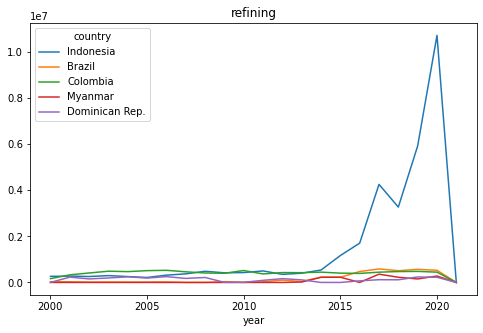

In [397]:
stat = country_stat[country_stat['sector']=='refining'].set_index(['country', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat[range(2015, 2022)].head(20)
stat.head(5).T.plot(figsize=(8, 5), title='refining')


year                               2000   2001   2002   2003   2004   2005  \
country                                                                      
Indonesia                         0.294  0.198  0.121  0.122  0.092  0.066   
Brazil                            0.035  0.021  0.007  0.007  0.005  0.005   
Colombia                          0.184  0.237  0.194  0.201  0.169  0.157   
Myanmar                           0.000  0.000  0.000  0.000  0.000  0.000   
Dominican Rep.                    0.000  0.166  0.072  0.080  0.087  0.058   
Guatemala                         0.000  0.000  0.000  0.000  0.000  0.000   
Ukraine                           0.000  0.000  0.032  0.007  0.043  0.087   
Philippines                       0.000  0.000  0.000  0.003  0.000  0.004   
Greece                            0.239  0.257  0.171  0.139  0.101  0.119   
TFYR of Macedonia                 0.000  0.000  0.028  0.026  0.023  0.038   
Finland                           0.000  0.000  0.000  0.000  0.000  0.000   
Serbia                            0.000  0.000  0.000  0.000  0.000  0.000   
Australia                         0.096  0.057  0.063  0.056  0.044  0.042   
Canada                            0.012  0.033  0.101  0.067  0.062  0.066   
Netherlands                       0.000  0.000  0.000  0.000  0.000  0.000   
Singapore                         0.000  0.000  0.000  0.000  0.000  0.000   
Russian Federation                0.056  0.017  0.034  0.037  0.046  0.029   
Turkey                            0.000  0.000  0.000  0.000  0.000  0.000   
Luxembourg                        0.000  0.000  0.001  0.002  0.000  0.000   
Switzerland                       0.002  0.000  0.000  0.000  0.000  0.000   
Morocco                           0.000  0.000  0.000  0.000  0.000  0.000   
Estonia                           0.000  0.000  0.000  0.000  0.000  0.000   
Mexico                            0.000  0.000  0.000  0.000  0.000  0.000   
Slovakia                          0.000  0.000  0.000  0.000  0.000  0.000   
Viet Nam                          0.000  0.000  0.000  0.000  0.000  0.000   
Bulgaria                          0.000  0.000  0.000  0.000  0.000  0.000   
Kazakhstan                        0.000  0.000  0.000  0.000  0.000  0.000   
Ireland                           0.000  0.000  0.000  0.000  0.000  0.000   
Romania                           0.000  0.000  0.000  0.000  0.000  0.000   
Cyprus                            0.000  0.000  0.000  0.000  0.000  0.000   
World                             0.000  0.000  0.000  0.000  0.000  0.000   
Paraguay                          0.000  0.000  0.000  0.000  0.000  0.000   
Papua New Guinea                  0.000  0.000  0.000  0.000  0.000  0.000   
Pakistan                          0.000  0.000  0.000  0.000  0.000  0.000   
Other Europe, nes                 0.000  0.000  0.000  0.000  0.000  0.000   
Montenegro                        0.000  0.000  0.000  0.000  0.000  0.000   
Norway                            0.001  0.000  0.000  0.000  0.000  0.000   
Nigeria                           0.000  0.000  0.000  0.000  0.000  0.000   
New Zealand                       0.000  0.000  0.000  0.000  0.000  0.000   
New Caledonia                     0.000  0.000  0.000  0.244  0.219  0.194   
Peru                              0.000  0.000  0.000  0.000  0.000  0.000   
Venezuela                         0.000  0.000  0.102  0.000  0.101  0.082   
Namibia                           0.000  0.000  0.000  0.000  0.000  0.000   
Zambia                            0.000  0.000  0.000  0.000  0.000  0.000   
Mozambique                        0.000  0.000  0.000  0.000  0.000  0.000   
Sweden                            0.000  0.000  0.000  0.000  0.000  0.000   
Poland                            0.000  0.001  0.001  0.002  0.002  0.001   
Uzbekistan                        0.000  0.000  0.000  0.000  0.000  0.000   
Saudi Arabia                      0.000  0.000  0.000  0.000  0.000  0.000   
Spain                 

<AxesSubplot:xlabel='year'>

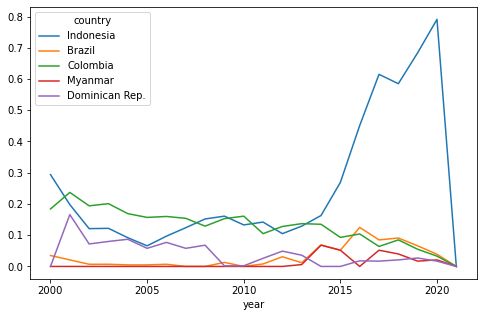

In [398]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                          2000          2001          2002          2003  \
partnercode                                                                    
China                 1.039806e+06  7.747326e+05  1.611288e+06  2.148733e+06   
Indonesia             6.661077e+04  5.781404e+04  1.428412e+05  1.339074e+05   
Germany               2.095926e+06  1.929166e+06  2.043943e+06  1.897446e+06   
Rep. of Korea         8.198554e+05  8.137837e+05  5.094712e+07  1.112242e+06   
Italy                 1.223282e+06  1.279800e+06  1.467701e+06  1.468134e+06   
490                   7.303497e+05  8.161300e+05  1.716021e+06  1.323679e+06   
France                1.734919e+06  1.907327e+06  2.286918e+06  2.270277e+06   
USA                   1.295675e+06  1.255650e+06  1.422835e+06  1.250558e+06   
Japan                 9.591509e+05  8.900577e+05  2.324354e+06  1.435968e+06   
Belgium               1.539042e+06  1.545758e+06  2.025479e+06  1.703157e+06   
Finland               4.184291e+05  4.217633e+05  4.855427e+05  7.745609e+05   
India                 1.398163e+05  1.672325e+05  4.572784e+05  4.169937e+05   
Netherlands           4.233344e+05  4.932376e+05  5.001412e+05  5.666112e+05   
Viet Nam              3.134974e+04  4.156246e+04  6.876316e+04  7.133436e+04   
China, Hong Kong SAR  7.368057e+05  7.940032e+05  8.796595e+05  8.320111e+05   
Turkey                8.712772e+04  7.762764e+04  1.328720e+05  1.925213e+05   
Spain                 6.518302e+05  7.078010e+05  7.623404e+05  8.230244e+05   
Sweden                7.428013e+05  7.219961e+05  8.749931e+05  1.153776e+06   
United Kingdom        1.007780e+06  1.110583e+06  1.252362e+06  1.124834e+06   
Malaysia              9.289973e+04  1.013123e+05  1.921829e+05  1.500300e+05   

year                          2004          2005          2006          2007  \
partnercode                                                                    
China                 2.399980e+06  2.514290e+06  2.805265e+06  2.402314e+06   
Indonesia             1.487063e+05  1.931359e+05  2.291578e+05  2.313944e+05   
Germany               2.220197e+06  2.009552e+06  2.469873e+06  2.396387e+06   
Rep. of Korea         1.535903e+06  1.526744e+06  1.545457e+06  1.270633e+06   
Italy                 1.711518e+06  1.645126e+06  2.074850e+06  1.909781e+06   
490                   1.434264e+06  1.371491e+06  1.466145e+06  1.252562e+06   
France                2.207263e+06  2.031614e+06  2.060278e+06  1.767352e+06   
USA                   2.419287e+07  1.489274e+06  2.048151e+06  1.519542e+06   
Japan                 1.888871e+06  1.338163e+06  3.174221e+06  1.421565e+06   
Belgium               1.770537e+06  1.411981e+06  1.660703e+06  1.329024e+06   
Finland               9.173248e+05  8.946354e+05  9.804624e+05  7.963003e+05   
India                 4.473456e+05  5.704261e+05  6.434211e+05  6.190084e+05   
Netherlands           6.742903e+05  7.029330e+05  9.750622e+05  8.324685e+05   
Viet Nam              8.208636e+04  1.033572e+05  1.289376e+05  1.948615e+05   
China, Hong Kong SAR  6.818201e+05  4.953439e+05  6.648681e+05  3.939340e+05   
Turkey                2.072070e+05  2.328331e+05  3.932570e+05  6.559771e+05   
Spain                 8.632773e+05  7.937784e+05  9.614517e+05  8.503068e+05   
Sweden                1.210993e+06  1.004591e+06  9.842729e+05  7.697035e+05   
United Kingdom        9.600285e+05  8.737412e+05  7.834509e+05  7.564553e+05   
Malaysia              2.027432e+05  1.868471e+05  2.284954e+05  2.728577e+05   

year                          2008          2009          2010          2011  \
partnercode                                                                    
China                 2.423187e+06  1.962782e+06  3.236819e+06  3.464471e+06   
Indonesia             1.714389e+05  1.509414e+05  3.567849e+05  4.308815e+05   
Germany               2.241886e+06  1.667988e+06  3.009671e+06  2.242861e+06   
Rep. of Korea         1.266391e+06  1.317906e+06  1.607145e+06  1.729270e+06  

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

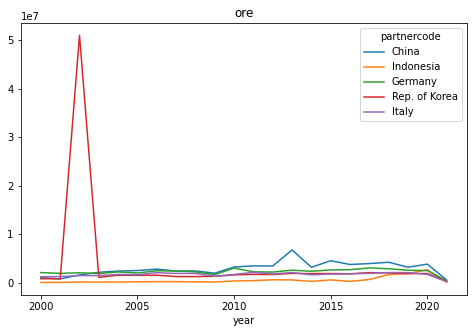

In [252]:
stat = country_stat[country_stat['sector']=='fabrication'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
China                                         0.055  0.041  0.021  0.086   
Indonesia                                     0.004  0.003  0.002  0.005   
Germany                                       0.110  0.101  0.027  0.076   
Rep. of Korea                                 0.043  0.043  0.669  0.044   
Italy                                         0.064  0.067  0.019  0.059   
490                                           0.038  0.043  0.023  0.053   
France                                        0.091  0.100  0.030  0.091   
USA                                           0.068  0.066  0.019  0.050   
Japan                                         0.051  0.047  0.031  0.057   
Belgium                                       0.081  0.081  0.027  0.068   
Finland                                       0.022  0.022  0.006  0.031   
India                                         0.007  0.009  0.006  0.017   
Netherlands                                   0.022  0.026  0.007  0.023   
Viet Nam                                      0.002  0.002  0.001  0.003   
China, Hong Kong SAR                          0.039  0.042  0.012  0.033   
Turkey                                        0.005  0.004  0.002  0.008   
Spain                                         0.034  0.037  0.010  0.033   
Sweden                                        0.039  0.038  0.011  0.046   
United Kingdom                                0.053  0.058  0.016  0.045   
Malaysia                                      0.005  0.005  0.003  0.006   
Thailand                                      0.012  0.013  0.006  0.012   
Poland                                        0.003  0.004  0.001  0.004   
Russian Federation                            0.007  0.005  0.002  0.007   
Austria                                       0.010  0.011  0.003  0.009   
Mexico                                        0.015  0.013  0.004  0.013   
Canada                                        0.012  0.014  0.005  0.014   
Brazil                                        0.007  0.007  0.002  0.008   
Czech Rep.                                    0.003  0.004  0.001  0.003   
Singapore                                     0.006  0.006  0.005  0.006   
Switzerland                                   0.010  0.010  0.002  0.007   
South Africa                                  0.011  0.011  0.004  0.015   
United Arab Emirates                          0.011  0.008  0.001  0.004   
Slovenia                                      0.004  0.004  0.001  0.003   
Denmark                                       0.005  0.005  0.002  0.005   
Australia                                     0.005  0.006  0.003  0.009   
Egypt                                         0.001  0.001  0.000  0.002   
Romania                                       0.004  0.003  0.001  0.004   
Pakistan                                      0.001  0.001  0.000  0.001   
Saudi Arabia                                  0.001  0.002  0.001  0.002   
Bangladesh                                    0.000  0.000  0.000  0.000   
Ukraine                                       0.003  0.003  0.001  0.003   
Hungary                                       0.002  0.002  0.001  0.002   
Portugal                                      0.003  0.003  0.001  0.003   
Philippines                                   0.002  0.002  0.001  0.001   
Slovakia                                      0.001  0.001  0.002  0.001   
Luxembourg                                    0.001  0.002  0.000  0.001   
Norway                                        0.003  0.004  0.001  0.003   
Colombia                                      0.000  0.001  0.000  0.001   
Areas, nes                                    0.001  0.001  0.001  0.000   
Bulgaria                                      0.000  0.000  0.000  0.000   
Argentina                                     0.

<AxesSubplot:xlabel='year'>

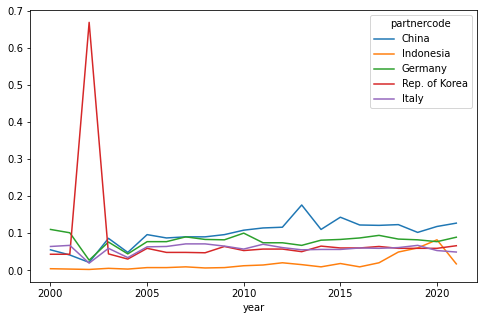

In [253]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                        2000          2001          2002          2003  \
partnercode                                                                  
USA                 1.080333e+06  1.393775e+06  1.949885e+06  1.969998e+06   
China               4.172454e+05  4.638475e+05  8.150476e+05  8.721461e+05   
Germany             1.068047e+06  9.922769e+05  1.410808e+06  1.239197e+06   
Italy               4.583247e+05  4.629007e+05  6.528324e+05  5.535253e+05   
United Kingdom      3.571184e+05  3.965851e+05  4.800860e+05  4.159497e+05   
France              6.193064e+05  5.089645e+05  5.819164e+05  5.838690e+05   
Mexico              1.513055e+05  1.750534e+05  2.134851e+05  2.035887e+05   
Japan               3.383443e+05  4.219140e+05  5.756239e+05  4.451476e+05   
India               4.510688e+04  4.897043e+04  1.490814e+05  8.853542e+04   
Turkey              5.586095e+04  4.400292e+04  7.183261e+04  8.303845e+04   
Russian Federation  7.757659e+04  8.466142e+04  1.246368e+05  1.600178e+05   
Poland              1.258362e+05  1.338012e+05  1.495754e+05  1.680764e+05   
Netherlands         3.161700e+05  3.334894e+05  4.119181e+05  3.291700e+05   
Rep. of Korea       1.656313e+05  1.562202e+05  1.950280e+05  1.968195e+05   
Canada              3.780223e+05  3.972416e+05  4.075542e+05  4.127077e+05   
Spain               2.682890e+05  2.640292e+05  2.820096e+05  3.218215e+05   
Thailand            9.192457e+04  9.805030e+04  1.459807e+05  1.407809e+05   
South Africa        3.986764e+04  4.467470e+04  4.482777e+04  7.271328e+04   
Brazil              7.262676e+04  7.744898e+04  9.466628e+04  8.400056e+04   
490                 1.604139e+05  1.483272e+05  2.146383e+05  1.713572e+05   

year                        2004          2005          2006          2007  \
partnercode                                                                  
USA                 2.049372e+07  1.589227e+06  1.990491e+06  1.746828e+06   
China               9.175390e+06  1.253348e+06  1.648172e+06  1.685881e+06   
Germany             1.676468e+06  1.377852e+06  1.545445e+06  1.630686e+06   
Italy               6.838666e+05  6.248927e+05  7.383718e+05  7.568722e+05   
United Kingdom      5.247626e+05  4.530665e+05  5.822705e+05  4.661532e+05   
France              6.587704e+05  6.666328e+05  6.793678e+05  7.356728e+05   
Mexico              2.304160e+05  2.498793e+05  2.787578e+05  2.678714e+05   
Japan               7.810286e+05  4.969223e+05  1.176254e+06  5.515683e+05   
India               1.259683e+05  1.456866e+05  1.922821e+05  2.467166e+05   
Turkey              1.079445e+05  1.291218e+05  2.005390e+05  1.850691e+05   
Russian Federation  1.828054e+05  2.023413e+05  2.489664e+05  2.523704e+05   
Poland              1.642242e+05  1.809634e+05  2.325679e+05  2.480762e+05   
Netherlands         3.442457e+05  3.780431e+05  4.480273e+05  3.782628e+05   
Rep. of Korea       4.469976e+05  2.828251e+05  3.872164e+05  4.004516e+05   
Canada              5.237567e+05  4.498548e+05  4.877872e+05  4.657616e+05   
Spain               3.532526e+05  3.566405e+05  3.827401e+05  3.703401e+05   
Thailand            1.948697e+05  1.824080e+05  2.099802e+05  2.181836e+05   
South Africa        6.977645e+04  8.751352e+04  9.580583e+04  1.140860e+05   
Brazil              1.713149e+05  1.168314e+05  1.346664e+05  1.413292e+05   
490                 1.068134e+06  2.107111e+05  2.489832e+05  2.288004e+05   

year                        2008          2009          2010          2011  \
partnercode                                                                  
USA                 1.610464e+06  1.258821e+06  1.934213e+06  2.176750e+06   
China               1.879548e+06  1.525966e+06  7.551772e+06  1.220199e+07   
Germany             1.733974e+06  1.244223e+06  2.225591e+06  2.510501e+06   
Italy               8.677107e+05  6.099317e+05  1.212397e+06  1.436843e+06   
United Kingdom      4.754215e+05  4.046895e+05  4.464358e+05  5.151539e+05   
France              

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

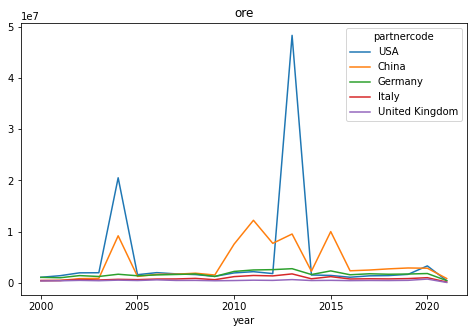

In [249]:
stat = country_stat[country_stat['sector']=='processed'].set_index(['partnercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
USA                                           0.059  0.074  0.079  0.078   
China                                         0.023  0.025  0.033  0.034   
Germany                                       0.058  0.053  0.057  0.049   
Italy                                         0.025  0.025  0.026  0.022   
United Kingdom                                0.020  0.021  0.020  0.017   
France                                        0.034  0.027  0.024  0.023   
Mexico                                        0.008  0.009  0.009  0.008   
Japan                                         0.019  0.022  0.023  0.018   
India                                         0.003  0.003  0.006  0.004   
Turkey                                        0.003  0.003  0.003  0.003   
Russian Federation                            0.004  0.005  0.005  0.007   
Poland                                        0.007  0.007  0.006  0.007   
Netherlands                                   0.017  0.018  0.017  0.013   
Rep. of Korea                                 0.009  0.008  0.008  0.008   
Canada                                        0.021  0.021  0.017  0.016   
Spain                                         0.015  0.014  0.012  0.013   
Thailand                                      0.005  0.005  0.006  0.006   
South Africa                                  0.002  0.003  0.002  0.003   
Brazil                                        0.004  0.004  0.004  0.004   
490                                           0.009  0.008  0.009  0.007   
Belgium                                       0.013  0.011  0.011  0.011   
Indonesia                                     0.004  0.003  0.003  0.004   
Viet Nam                                      0.002  0.002  0.002  0.002   
Czech Rep.                                    0.007  0.008  0.008  0.007   
Malaysia                                      0.005  0.005  0.004  0.008   
Austria                                       0.009  0.014  0.007  0.007   
United Arab Emirates                          0.003  0.003  0.003  0.005   
Sweden                                        0.009  0.010  0.008  0.008   
Denmark                                       0.006  0.006  0.005  0.005   
Hungary                                       0.003  0.003  0.003  0.003   
Australia                                     0.004  0.004  0.007  0.026   
Saudi Arabia                                  0.002  0.002  0.002  0.003   
Pakistan                                      0.001  0.001  0.001  0.001   
Philippines                                   0.002  0.002  0.002  0.002   
Kazakhstan                                    0.001  0.001  0.001  0.001   
Ukraine                                       0.002  0.002  0.002  0.002   
Colombia                                      0.001  0.001  0.001  0.001   
China, Hong Kong SAR                          0.005  0.004  0.005  0.004   
Singapore                                     0.019  0.005  0.008  0.006   
Portugal                                      0.006  0.004  0.004  0.004   
Egypt                                         0.002  0.002  0.001  0.001   
Finland                                       0.005  0.006  0.005  0.005   
Romania                                       0.002  0.002  0.002  0.002   
Chile                                         0.001  0.001  0.001  0.002   
Switzerland                                   0.008  0.007  0.006  0.005   
Peru                                          0.001  0.001  0.001  0.001   
Israel                                        0.002  0.002  0.001  0.001   
Slovakia                                      0.002  0.002  0.002  0.002   
Argentina                                     0.002  0.002  0.001  0.002   
Nigeria                                       0.001  0.001  0.001  0.001   
Iraq                                          0.

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

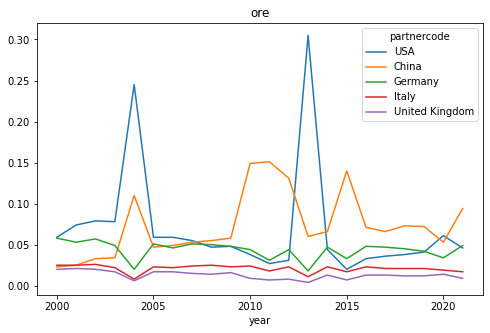

In [251]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


## 看产业链节点

In [312]:
# 只看产业链节点
tradeBysector = data[data['tradeflowcode']=='Export'].groupby((['year', 'reportercode', 'partnercode', 'period', 'sector']))['new_netweight', 'new_tradevalue'].sum()
tradeBysector = tradeBysector.reset_index()
tradeBysector.head()


year reportercode     partnercode  period       sector  new_netweight  \
0  2000          490         Algeria    2000    processed       7.105847   
1  2000          490  American Samoa    2000    processed       0.036855   
2  2000          490          Angola    2000  fabrication       0.675000   
3  2000          490          Angola    2000    processed       0.027459   
4  2000          490      Areas, nes    2000    processed       0.594800   

   new_tradevalue  
0          339972  
1            1824  
2            1971  
3            3691  
4          203237

In [313]:
# 换成国家名
raw_data_path = '/Users/linzipeng/Documents/IUE/1_Material_flow_analysis/Iron/Steel/data/'
country_info = pd.read_excel(raw_data_path + "SteelCycleCompile_Input.xlsx", sheet_name="CountryList", skiprows=1)
country_info = country_info[['CountryList (289)', 'Unnamed: 4', 'region', 'PlotSelect', 'Industrialized (GDP top 25)']]
country_info.columns = ['AllCountries', 'AllCountryNames', 'AllRegions', 'Country_PlotSelect', 'Industrialized_Sel']

country_info_dic = country_info[['AllCountryNames', 'AllCountries']].set_index('AllCountries').to_dict()['AllCountryNames']
tradeBysector['reportercode'] = tradeBysector['reportercode'].replace(country_info_dic)
tradeBysector['partnercode'] = tradeBysector['partnercode'].replace(country_info_dic)
tradeBysector.head()


year reportercode     partnercode  period       sector  new_netweight  \
0  2000          490         Algeria    2000    processed       7.105847   
1  2000          490  American Samoa    2000    processed       0.036855   
2  2000          490          Angola    2000  fabrication       0.675000   
3  2000          490          Angola    2000    processed       0.027459   
4  2000          490      Areas, nes    2000    processed       0.594800   

   new_tradevalue  
0          339972  
1            1824  
2            1971  
3            3691  
4          203237

In [314]:
# 产业链各节点关键出国国


### netweight + rank

In [315]:
country_stat = tradeBysector.groupby(['year', 'sector', 'reportercode'])['new_netweight'].sum().reset_index()
country_stat = country_stat[country_stat['reportercode']!='World']


In [316]:
country_stat['rank'] = country_stat.groupby(['year', 'sector'])['new_netweight'].rank(ascending=False) - 1


year                2000  2001  2002  2003  2004  2005  2006  2007  2008  \
reportercode                                                               
Philippines          NaN   0.0   0.0   1.0   NaN   NaN   NaN   NaN   NaN   
Guatemala            NaN   NaN   NaN  21.0  21.0   NaN   NaN   NaN   NaN   
Turkey               NaN   NaN   NaN   4.0   9.0   5.0   3.0   2.0   3.0   
Australia            0.0   1.0   1.0   2.0   1.0   2.0   2.0   1.0   2.0   
Zimbabwe             3.0   3.0   NaN   3.0   2.0   4.0   6.0   NaN   7.0   
Russian Federation   NaN   NaN   NaN   NaN   NaN   NaN  27.0  17.0   4.0   
Finland              1.0   NaN   4.0  12.0   NaN   NaN   NaN   NaN   9.0   
Brazil               9.0  12.0   NaN  15.0  13.0  31.0   NaN  22.0   NaN   
Zambia               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  28.0   
USA                  5.0   4.0   5.0   6.0   6.0   8.0   8.0   5.0   6.0   
Albania              NaN   NaN   NaN   5.0   5.0  13.0  32.0   NaN   NaN   
China                NaN   NaN  19.0  26.0   NaN   NaN  25.0  20.0  14.0   
Canada               NaN   8.0  18.0  17.0  23.5  15.0  12.0   6.0  35.5   
Norway               2.0   2.0   2.0   8.0   8.0  10.0  10.0   9.0  10.0   
Spain                6.0  11.0  11.0  23.0  31.0   3.0   4.0   3.0   5.0   
Kazakhstan           NaN   NaN   NaN   NaN   3.0   7.0  34.0  15.0  12.0   
Thailand             NaN   NaN  20.0  24.0   NaN  29.0  30.0   NaN  17.0   
Singapore           10.0   NaN   NaN   NaN   NaN  28.0  22.0  13.0  16.0   
490                  NaN   5.0  16.0   NaN   NaN  16.0  16.0  31.5   NaN   
Hungary              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

year                2009  2010  2011  2012  2013  2014  2015  2016  2017  \
reportercode                                                               
Philippines          1.0   1.0   1.0   NaN   NaN   NaN   0.0   NaN   NaN   
Guatemala            NaN   NaN  38.0   3.0   2.0   2.0   2.0   0.0   1.0   
Turkey               7.0   4.0   4.0   2.0   7.0   6.0  10.0   5.0   2.0   
Australia            3.0   3.0   3.0   1.0   3.0   3.0   3.0   2.0   3.0   
Zimbabwe             8.0  41.0   5.0   NaN   5.0   5.0   5.0   1.0   NaN   
Russian Federation   5.0   6.0   7.0   4.0  11.0  28.0  11.0   3.0   5.0   
Finland              NaN  11.0  11.0  25.0   6.0   8.0   8.0   6.0   6.0   
Brazil               NaN  29.0   6.0   5.0   9.0   9.0   7.0   8.0   NaN   
Zambia              10.0   8.0   8.0  36.0   NaN  35.0  30.0   NaN   NaN   
USA                 11.0  12.0  16.0  15.0  15.0  14.0  12.0   9.0   8.0   
Albania              NaN   NaN   NaN  20.0   4.0   4.0   4.0   7.0   NaN   
China               12.0  42.0  27.0  19.0  32.0  19.0  14.0  37.0  15.0   
Canada              26.0  22.0  12.0  24.0  20.0  11.0  13.0  12.0  10.0   
Norway              14.0  13.0  14.0   9.0  12.0  12.0  15.0  13.0  12.0   
Spain                6.0   5.0   9.0   6.0   8.0   7.0   6.0  11.0  17.0   
Kazakhstan           NaN  33.0  29.0   NaN   NaN   NaN   NaN   NaN   NaN   
Thailand            22.0  14.0  17.0  12.0  14.0  18.0  20.0  18.0  16.0   
Singapore           18.0  18.0  18.0  14.0  18.0  22.0  22.0  20.0  14.0   
490                 19.0  43.5  19.0  11.0  16.0  39.0   NaN   NaN  34.0   
Hungary              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

year                2018  2019  2020  2021  
reportercode                                
Philippines          0.0   0.0   0.0   NaN  
Guatemala            2.0   3.0   1.0   NaN  
Turkey               9.0   8.0   2.0   NaN  
Australia            5.0   4.0   3.0   NaN  
Zimbabwe             4.0   6.0   4.0   NaN  
Russian Federation   6.0   7.0   5.0   NaN  
Finland              7.0  30.0   6.0   NaN  
Brazil              28.0  23.0   7.0   NaN  
Zambia               NaN  10.0   8.0   NaN  
USA                  8.0   9.0   9.0   0.0  
Albania              NaN   5.0  10.0   NaN  
China               21.0  29.0  11.0   NaN  
Canada              10.0

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

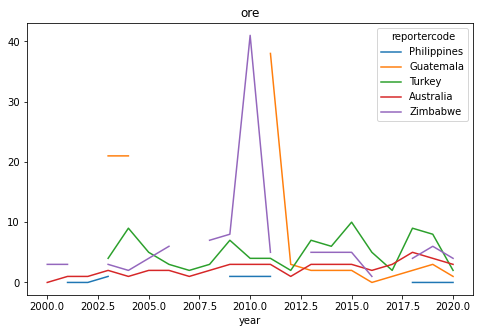

In [317]:
stat = country_stat[country_stat['sector']=='ore'].set_index(['reportercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                2000  2001  2002  2003  2004  2005  2006  2007  2008  \
reportercode                                                               
Indonesia            1.0   3.0   5.0   5.0   6.0   4.0   3.0   6.0   4.0   
Brazil               6.0   8.0  11.0  11.0  12.0  11.0  11.0  14.0  13.0   
Japan                0.0   0.0   0.0   2.0   1.0   1.0   1.0   2.0   2.0   
Colombia             2.0   1.0   1.0   1.0   2.0   2.0   2.0   1.0   1.0   
Myanmar              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Ukraine              5.0   NaN   3.0   8.0   5.0  56.0   4.0   3.0   3.0   
TFYR of Macedonia   37.0   NaN   6.0   9.0   9.0   8.0   7.0   5.0   5.0   
Guatemala            NaN  45.0   NaN  60.0   NaN   NaN  51.0  50.0  61.0   
Rep. of Korea       19.0  22.0  31.0  24.0  27.0  28.0  29.0  31.0  27.0   
Dominican Rep.       NaN   2.0   NaN   4.0   3.0   3.0   5.0   4.0   6.0   
Russian Federation   8.0  13.0   8.0  10.0  10.0   9.0  10.0   9.0  10.0   
Philippines          NaN  24.0  19.0   NaN   NaN  48.0   NaN  30.0  24.0   
Canada               3.0   6.0   4.0   6.0   7.0   6.0   6.0   7.0   8.0   
China               10.0  28.0  15.0  15.0  14.0  12.0  16.0  11.0  12.0   
Turkey              40.0  42.0  35.0  37.0  52.0  46.0  50.0  43.0  38.0   
490                 11.0  16.0  24.0  34.0  18.0  18.0  19.0  21.0  19.0   
India               27.0  37.0  34.0  41.0  41.0  37.0  39.0  36.0  40.0   
Germany             13.0  14.0  18.0  19.0  19.0  19.0  14.0  12.0  11.0   
Belgium             22.0  26.0  17.0  20.0  20.0  20.0  20.0  20.0  15.0   
France              12.0  17.0  29.0  33.0  34.0  32.0  27.0  28.0  33.0   

year                2009  2010  2011  2012  2013  2014  2015  2016  2017  \
reportercode                                                               
Indonesia            3.0   3.0   3.0   4.0   4.0   4.0   2.0   0.0   0.0   
Brazil               9.0  10.0   8.0   6.0   6.0   2.0   3.0   1.0   1.0   
Japan                1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   2.0   
Colombia             2.0   2.0   2.0   3.0   2.0   3.0   4.0   3.0   3.0   
Myanmar              NaN   NaN   NaN   NaN   NaN   9.0   8.0   7.0   4.0   
Ukraine              4.0   4.0   5.0   5.0   3.0   5.0   5.0   4.0   5.0   
TFYR of Macedonia    NaN   5.0   4.0   7.0   5.0   6.0   6.0   6.0  10.0   
Guatemala           56.0  59.0  59.0  57.0   NaN  15.0  10.0  10.0  11.0   
Rep. of Korea       16.0  20.0  25.0  17.0  37.0  20.0  11.0  12.0  16.0   
Dominican Rep.      25.0  26.0   7.0  11.0  10.0  60.0  59.0   8.0   6.0   
Russian Federation  10.0   8.0   9.0  10.0   8.0  12.0  23.0  11.0   9.0   
Philippines         33.0  32.0  26.0  18.0  25.0  10.0   9.0   9.0   8.0   
Canada               5.0   6.0   6.0   9.0   7.0   7.0   7.0   5.0   7.0   
China               15.0  11.0  14.0  16.0  19.0  11.0  15.0  17.0  14.0   
Turkey              38.0  42.0  43.0  40.0  49.0  45.0  30.0  21.0  15.0   
490                 23.0  19.0  17.0  20.0  17.0  17.0  16.0  14.0  13.0   
India               41.0  44.0  38.0  38.0  22.0  41.0  33.0  26.0  23.0   
Germany             13.0   7.0  10.0  14.0  11.0  14.0  14.0  15.0  17.0   
Belgium             18.0  28.0  19.0  23.0  21.0  28.0  32.0  16.0  22.0   
France              12.0  14.0  21.0  27.0  28.0  30.0  42.0  41.0  33.0   

year                2018  2019  2020  2021  
reportercode                                
Indonesia            0.0   0.0   0.0   NaN  
Brazil               1.0   2.0   1.0   NaN  
Japan                2.0   1.0   2.0   0.0  
Colombia             3.0   3.0   3.0   NaN  
Myanmar              6.0   8.0   4.0   NaN  
Ukraine              4.0   4.0   5.0   NaN  
TFYR of Macedonia    7.0   5.0   6.0   NaN  
Guatemala           10.0   7.0   7.0   NaN  
Rep. of Korea       11.0  10.0   8.0   NaN  
Dominican Rep.       5.0   6.0   9.0   NaN  
Russian Federation   8.0   9.0  10.0   NaN  
Philippines         12.0  12.0  11.0   NaN  
Canada               9.0

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

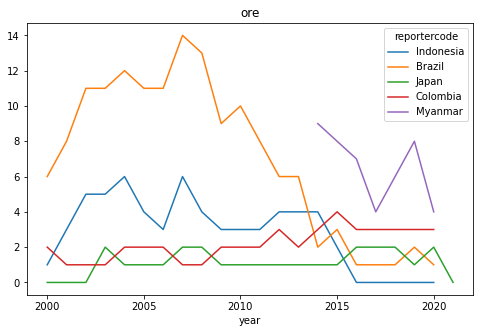

In [318]:
stat = country_stat[country_stat['sector']=='refining'].set_index(['reportercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
reportercode                                                                 
China           28.0  24.0  24.0  21.0  19.0  17.0   9.0   5.0   5.0   9.0   
Indonesia       35.0  29.0  37.0  34.0  36.0  32.0  27.0  28.0  27.0  31.0   
Belgium          1.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   3.0   
Germany          0.0   0.0   2.0   3.0   2.0   1.0   1.0   1.0   1.0   1.0   
Italy            5.0   7.0   6.0   6.0   7.0   6.0   6.0   3.0   3.0   5.0   
490              8.0   6.0   5.0   4.0   6.0   5.0   5.0   4.0   6.0   2.0   
Japan            2.0   3.0   3.0   2.0   3.0   4.0   2.0   2.0   2.0   0.0   
France           3.0   2.0   0.0   0.0   1.0   3.0   4.0   6.0   4.0   7.0   
USA             11.0  10.0  11.0  11.0  13.0  10.0  10.0   8.0   8.0   6.0   
Rep. of Korea    9.0   5.0   8.0   5.0   4.0   2.0   3.0   7.0   7.0   4.0   
India           19.0  15.0  16.0  13.0  14.0  13.0  15.0  15.0  16.0  14.0   
Netherlands     14.0  12.0  18.0  17.0  17.0  15.0  13.0  14.0  12.0  17.0   
Spain            6.0   9.0   9.0   9.0  11.0  11.0   8.0  10.0  10.0  11.0   
Sweden           7.0   4.0   7.0   7.0   9.0   8.0  11.0  12.0  11.0  13.0   
Finland         12.0  14.0  13.0   8.0   8.0   7.0   7.0   9.0   9.0  10.0   
Malaysia        34.0  34.0   4.0  32.0  34.0  29.0  17.0  26.0  25.0  27.0   
United Kingdom  10.0   8.0  10.0  10.0  10.0   9.0  12.0  13.0  13.0  16.0   
South Africa     4.0  11.0  15.0  12.0  12.0  12.0  14.0  11.0  14.0  12.0   
Austria         23.0  21.0  27.0  26.0  22.0  23.0  28.0  24.0  21.0  21.0   
Turkey          39.0  42.0  41.0  37.0  37.0  36.0  38.0  38.0  38.0  38.0   

year            2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  \
reportercode                                                                 
China            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Indonesia       27.0  29.0  32.0  35.0  32.0  33.0  25.0  13.0   1.0   1.0   
Belgium          4.0   1.0   1.0   2.0   1.0   2.0   2.0   1.0   3.0   3.0   
Germany          2.0   4.0   3.0   3.0   3.0   3.0   4.0   4.0   4.0   4.0   
Italy            6.0   6.0   2.0   6.0   6.0   8.0   8.0   8.0   9.0   5.0   
490              5.0   5.0   6.0   5.0  34.0   7.0   3.0   5.0   5.0   6.0   
Japan            1.0   2.0   5.0   4.0   5.0   5.0   5.0   7.0   7.0   8.0   
France           8.0   8.0   8.0   9.0   8.0   9.0   9.0   9.0   8.0  10.0   
USA              7.0   7.0   7.0   7.0   4.0   4.0   7.0   3.0   6.0   7.0   
Rep. of Korea    3.0   3.0   4.0   1.0   2.0   1.0   1.0   2.0   2.0   2.0   
India           17.0  11.0  11.0  10.0  10.0  12.0  10.0  10.0  10.0   9.0   
Netherlands     12.0  10.0  12.0  13.0  11.0  11.0  11.0  15.0  12.0  12.0   
Spain           10.0  12.0  10.0  11.0   9.0  10.0  13.0  11.0  11.0  11.0   
Sweden          11.0  13.0  13.0  14.0  13.0  13.0  12.0  12.0  13.0  13.0   
Finland          9.0   9.0   9.0   8.0   7.0   6.0   6.0   6.0  15.0  14.0   
Malaysia        23.0  28.0  27.0  22.0  19.0  17.0  16.0  17.0  17.0  16.0   
United Kingdom  13.0  14.0  15.0  15.0  14.0  15.0  14.0  16.0  16.0  15.0   
South Africa    14.0  16.0  16.0  16.0  15.0  14.0  15.0  14.0  14.0  17.0   
Austria         21.0  21.0  18.0  19.0  17.0  18.0  18.0  18.0  18.0  18.0   
Turkey          38.0  40.0  34.0  34.0  27.0  22.0  23.0  21.0  22.0  19.0   

year            2020  2021  
reportercode                
China            0.0   NaN  
Indonesia        1.0   NaN  
Belgium          2.0   NaN  
Germany          3.0   NaN  
Italy            4.0   NaN  
490              5.0   NaN  
Japan            6.0   0.0  
France           7.0   NaN  
USA              8.0   1.0  
Rep. of Korea    9.0   NaN  
India           10.0   NaN  
Netherlands     11.0   NaN  
Spain           12.0   NaN  
Sweden          13.0   NaN  
Finland         14.0   NaN  
Malaysia        15.0   NaN  
United Kingdom  16.0   2.0  
South Africa   

<AxesSubplot:title={'center':'fabrication'}, xlabel='year'>

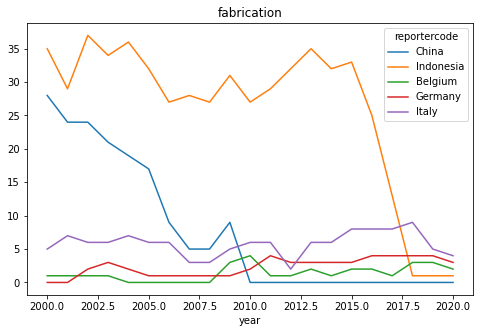

In [319]:
stat = country_stat[country_stat['sector']=='fabrication'].set_index(['reportercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='fabrication')



year                  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
reportercode                                                                 
China                  4.0   3.0   3.0   1.0   2.0   0.0   0.0   0.0   0.0   
Germany                0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
Italy                  2.0   2.0   1.0   2.0   3.0   2.0   2.0   2.0   2.0   
USA                    1.0   1.0   2.0   3.0   4.0   3.0   3.0   3.0   3.0   
Rep. of Korea          7.0   7.0   9.0   7.0   8.0   6.0   5.0   4.0   4.0   
Netherlands           14.0  20.0  16.0  18.0  15.0  17.0  19.0  10.0   9.0   
Poland                24.0  31.0  20.0  19.0  16.0  14.0  12.0  11.0  12.0   
Turkey                31.0  33.0  25.0  24.0  21.0  20.0  22.0  18.0  18.0   
Thailand              17.0  21.0  23.0  22.0  18.0  18.0  21.0  19.0  19.0   
Czech Rep.            13.0  11.0  14.0  13.0   5.0   8.0   8.0   8.0  10.0   
Spain                  8.0  16.0  10.0   9.0  10.0   9.0  10.0   7.0   8.0   
France                 3.0   4.0   5.0   4.0   6.0   5.0   6.0   6.0   6.0   
Japan                  6.0   5.0   6.0   5.0   7.0   4.0   7.0   5.0   7.0   
490                   10.0  12.0  13.0  10.0  11.0  11.0  15.0  14.0  13.0   
India                 30.0  27.0  28.0  25.0  27.0  25.0  23.0  22.0  21.0   
Sweden                11.0   9.0  15.0  15.0  14.0  15.0  16.0  13.0  16.0   
United Arab Emirates  50.0   NaN  17.0  36.0  40.0  32.0  13.0  28.0  27.0   
United Kingdom         5.0   6.0   8.0   6.0   9.0   7.0   9.0   9.0  11.0   
Austria               15.0  14.0  19.0  17.0  17.0  16.0  18.0  16.0  17.0   
Portugal              20.0  17.0  21.0  21.0  23.0  22.0  24.0  23.0  22.0   

year                  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
reportercode                                                                 
China                  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
Germany                1.0   1.0   1.0   1.0   2.0   1.0   1.0   1.0   1.0   
Italy                  2.0   2.0   3.0   2.0   3.0   2.0   2.0   2.0   2.0   
USA                    3.0   3.0   2.0   4.0   4.0   3.0   4.0  18.0   3.0   
Rep. of Korea          4.0   4.0   4.0   3.0   5.0   4.0   3.0   3.0   4.0   
Netherlands           16.0  12.0   9.0   9.0  10.0   8.0  10.0   6.0   6.0   
Poland                11.0   9.0  11.0   8.0   9.0   6.0   6.0   7.0   7.0   
Turkey                12.0  15.0  14.0  13.0  11.0  10.0   8.0  10.0   9.0   
Thailand              19.0  16.0  17.0  16.0  17.0  14.0  14.0  11.0   8.0   
Czech Rep.             7.0   7.0   6.0   6.0   7.0   5.0   5.0   4.0   5.0   
Spain                  8.0  10.0  10.0  12.0  15.0  12.0  13.0  14.0  15.0   
France                 5.0   6.0   7.0   5.0   6.0   7.0   7.0   9.0  10.0   
Japan                  6.0   5.0   5.0   7.0  12.0   9.0   9.0   8.0  11.0   
490                   15.0  14.0  13.0  14.0  13.0  11.0  12.0  12.0  13.0   
India                 14.0  30.0  16.0  10.0  14.0  13.0  11.0  13.0  12.0   
Sweden                17.0  17.0  20.0  17.0  21.0  17.0  18.0  15.0  16.0   
United Arab Emirates  28.0  32.0  33.0  19.0  27.0  26.0  24.0  22.0  17.0   
United Kingdom         9.0  13.0  12.0  15.0  16.0  15.0  15.0   5.0  14.0   
Austria               18.0  18.0  21.0  20.0  20.0  18.0  19.0  16.0  19.0   
Portugal              21.0  24.0  28.0  24.0  24.0  22.0  20.0  17.0  18.0   

year                  2018  2019  2020  2021  
reportercode                                  
China                  0.0   0.0   0.0   NaN  
Germany                1.0   1.0   1.0   NaN  
Italy                  2.0   2.0   2.0   NaN  
USA                    3.0   3.0   3.0   0.0  
Rep. of Korea          4.0   4.0   4.0   NaN  
Netherlands            5.0   5.0   5.0   NaN  
Poland                 6.0   7.0   6.0   NaN  
Turkey                 9.0   8.0   7.0   NaN  
Thailand              10.0  15.0   8.0   NaN  
Czech Rep.             7.0   6.0   9.0   1.0  
Sp

<AxesSubplot:title={'center':'processed'}, xlabel='year'>

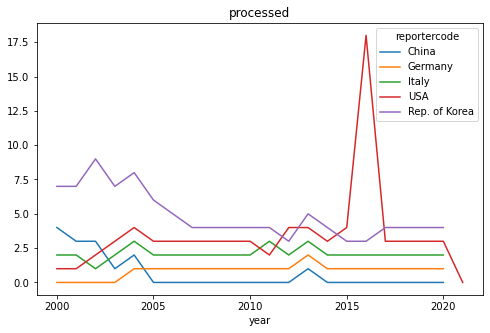

In [320]:
stat = country_stat[country_stat['sector']=='processed'].set_index(['reportercode', 'year'])['rank'].unstack()\
                                                 .sort_values(by=2020)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='processed')



### netwight + ratio

year                        2000           2001           2002           2003  \
reportercode                                                                    
Philippines             0.000000  407246.445216  361368.802314  314581.646340   
Guatemala               0.000000       0.000000       0.000000       1.448226   
Turkey                  0.000000       0.000000       0.000000   10202.400000   
Australia           56288.807640   59042.238840   65661.822720   61833.388266   
Zimbabwe             2882.514960     949.619502       0.000000   14816.929842   
Russian Federation      0.000000       0.000000       0.000000       0.000000   
Finland              6038.231940       0.000000    2793.761100     341.394300   
Brazil                  0.093600       0.000234       0.000000      44.811000   
Zambia                  0.000000       0.000000       0.000000       0.000000   
USA                   400.063482     403.639938    2662.141716    2621.391786   
Albania                 0.000000       0.000000       0.000000    7211.216844   
China                   0.000000       0.000000       0.095004       0.022230   
Canada                  0.000000       1.446588       0.105066      11.226852   
Norway               2924.851995    7053.159204    6061.099590    1466.764416   
Spain                  30.586140       0.405288      17.419194       0.078624   
Kazakhstan              0.000000       0.000000       0.000000       0.000000   
Thailand                0.000000       0.000000       0.046800       0.070200   
Singapore               0.006786       0.000000       0.000000       0.000000   
490                     0.000000     335.088000       0.716742       0.000000   
Hungary                 0.000000       0.000000       0.000000       0.000000   

year                        2004          2005          2006          2007  \
reportercode                                                                 
Philippines             0.000000      0.000000      0.000000      0.000000   
Guatemala               1.846728      0.000000      0.000000      0.000000   
Turkey                821.644200  12182.577030  21487.769316  41116.714470   
Australia           65629.072080  81517.958730  67936.754106  66672.578934   
Zimbabwe            21429.453942  12564.269640  11801.664810      0.000000   
Russian Federation      0.000000      0.000000      0.692640     52.579800   
Finland                 0.000000      0.000000      0.000000      0.000000   
Brazil                 45.580158      0.007956      0.000000     11.653200   
Zambia                  0.000000      0.000000      0.000000      0.000000   
USA                  2535.957684   2187.436446   2838.043728  17720.647308   
Albania              9266.596560    187.852392      0.025740      0.000000   
China                   0.000000      0.000000      3.065400     19.969560   
Canada                  0.702000     51.113322    770.931954   2685.818772   
Norway               2240.598672   1774.026774   1839.231576   1258.704720   
Spain                   0.034866  24620.313510  16509.894804  25545.253968   
Kazakhstan          14944.014540   5850.468000      0.002340     80.060760   
Thailand                0.000000      0.020826      0.089622      0.000000   
Singapore               0.000000      0.094302      5.850000    142.107498   
490                     0.000000     48.906000     82.313244      0.000000   
Hungary                 0.000000      0.000000      0.000000      0.000000   

year                         2008          2009          2010          2011  \
reportercode                                                                  
Philippines              0.000000  2.039365e+06  3.393512e+06  3.500516e+06   
Guatemala                0.000000  0.000000e+00  0.000000e+00  2.340000e-01   
Turkey               30457.597482  2.332986e+04  4.040766e+04  8.851050e+04   
Australia           127499.625864  9.877861e+04  8.435506e+04  1.084890e+05   
Zimbabwe             10559

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

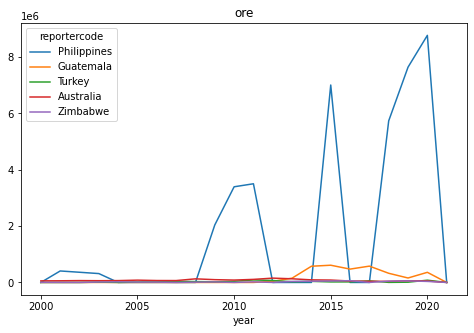

In [321]:
stat = country_stat[country_stat['sector']=='ore'].set_index(['reportercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                      2000   2001   2002   2003   2004   2005   2006  \
reportercode                                                               
Philippines              0.000  0.857  0.815  0.250  0.000  0.000  0.000   
Guatemala                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Turkey                   0.000  0.000  0.000  0.008  0.001  0.007  0.011   
Australia                0.811  0.124  0.148  0.049  0.063  0.045  0.035   
Zimbabwe                 0.042  0.002  0.000  0.012  0.021  0.007  0.006   
Russian Federation       0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Finland                  0.087  0.000  0.006  0.000  0.000  0.000  0.000   
Brazil                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Zambia                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
USA                      0.006  0.001  0.006  0.002  0.002  0.001  0.001   
Albania                  0.000  0.000  0.000  0.006  0.009  0.000  0.000   
China                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Canada                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Norway                   0.042  0.015  0.014  0.001  0.002  0.001  0.001   
Spain                    0.000  0.000  0.000  0.000  0.000  0.014  0.008   
Kazakhstan               0.000  0.000  0.000  0.000  0.014  0.003  0.000   
Thailand                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Singapore                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
490                      0.000  0.001  0.000  0.000  0.000  0.000  0.000   
Hungary                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Malaysia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
France                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Germany                  0.000  0.000  0.006  0.002  0.002  0.001  0.001   
Belgium                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
South Africa             0.012  0.000  0.004  0.001  0.011  0.003  0.003   
Rep. of Korea            0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Italy                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
United Kingdom           0.000  0.000  0.000  0.001  0.000  0.000  0.000   
Greece                   0.000  0.000  0.000  0.000  0.000  0.000  0.006   
Ethiopia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Ireland                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Netherlands              0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Indonesia                0.000  0.000  0.000  0.000  0.000  0.478  0.523   
United Arab Emirates     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
United Rep. of Tanzania  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Austria                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Switzerland              0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Slovenia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Sweden                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Armenia                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Bahrain                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Botswana                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Bulgaria                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Cape Verde               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Chile                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
China, Hong Kong SAR     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Colombia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Costa Rica               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Czech Rep.               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Côte d'Ivoire            0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Denmark                  0.000  0.000  0.000  0.

<AxesSubplot:xlabel='year'>

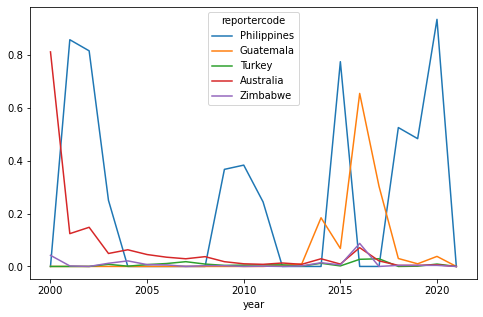

In [322]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                        2000          2001          2002          2003  \
reportercode                                                                 
Indonesia           5.146905e+05  3.593419e+05  1.804258e+05  3.679428e+05   
Brazil              6.492219e+04  6.718711e+04  6.231636e+04  5.624989e+04   
Japan               1.004831e+06  1.063511e+06  1.058450e+06  9.494188e+05   
Colombia            4.116597e+05  7.202447e+05  8.772452e+05  1.000565e+06   
Myanmar             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Ukraine             7.384124e+04  0.000000e+00  3.876740e+05  1.915723e+05   
TFYR of Macedonia   9.057000e-01  0.000000e+00  1.150316e+05  1.312342e+05   
Guatemala           0.000000e+00  1.992540e-01  0.000000e+00  6.075000e-02   
Rep. of Korea       1.963023e+03  2.235487e+03  9.288233e+02  6.387007e+03   
Dominican Rep.      0.000000e+00  4.265468e+05  0.000000e+00  5.230151e+05   
Russian Federation  3.924684e+04  1.876981e+04  7.646271e+04  8.720285e+04   
Philippines         0.000000e+00  1.408818e+03  1.089123e+04  0.000000e+00   
Canada              2.042471e+05  9.654832e+04  3.241170e+05  2.829878e+05   
China               1.820139e+04  5.028568e+02  3.107116e+04  3.504670e+04   
Turkey              2.700000e-01  1.175700e+00  2.444899e+02  2.974247e+02   
490                 1.490854e+04  6.665749e+03  3.697172e+03  8.435236e+02   
India               2.365075e+02  2.211178e+01  2.457300e+02  1.479391e+02   
Germany             7.683954e+03  1.495555e+04  1.142541e+04  9.669928e+03   
Belgium             1.411892e+03  1.032928e+03  1.557210e+04  9.583174e+03   
France              1.151967e+04  6.172180e+03  1.259332e+03  1.084492e+03   

year                        2004          2005          2006          2007  \
reportercode                                                                 
Indonesia           4.968343e+05  4.763580e+05  6.849148e+05  4.428146e+05   
Brazil              5.626704e+04  6.559832e+04  6.670300e+04  8.471753e+04   
Japan               1.056028e+06  1.165994e+06  1.132346e+06  8.589749e+05   
Colombia            9.400650e+05  1.041546e+06  1.066145e+06  1.024459e+06   
Myanmar             0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Ukraine             4.992507e+05  7.074000e+00  6.442577e+05  6.260314e+05   
TFYR of Macedonia   1.233191e+05  2.610340e+05  3.417177e+05  5.399003e+05   
Guatemala           0.000000e+00  0.000000e+00  3.797100e+00  3.713370e+00   
Rep. of Korea       6.409131e+03  4.764235e+03  5.743164e+03  2.943523e+03   
Dominican Rep.      5.532443e+05  5.522558e+05  6.396920e+05  6.098925e+05   
Russian Federation  1.124490e+05  1.879596e+05  2.215566e+05  2.117875e+05   
Philippines         0.000000e+00  4.980334e+01  0.000000e+00  3.382464e+03   
Canada              3.517157e+05  3.177508e+05  3.494711e+05  3.933363e+05   
China               4.375481e+04  4.212449e+04  3.637281e+04  1.124231e+05   
Turkey              1.562453e+01  5.202244e+01  1.731087e+01  7.931539e+01   
490                 1.802694e+04  1.484183e+04  1.519905e+04  1.611196e+04   
India               1.626610e+02  3.008363e+02  3.226576e+02  6.709484e+02   
Germany             1.446599e+04  1.337220e+04  4.395277e+04  9.371760e+04   
Belgium             1.440663e+04  1.161045e+04  1.128908e+04  1.693013e+04   
France              1.133948e+03  1.575865e+03  6.083174e+03  3.878217e+03   

year                         2008          2009          2010           2011  \
reportercode                                                                   
Indonesia           659104.198944  5.306068e+05  8.902633e+05  808528.728792   
Brazil               61419.831690  1.372067e+05  7.377404e+04  218665.504779   
Japan               790725.011652  1.324417e+06  1.306729e+06  874360.737678   
Colombia            846493.985613  1.286052e+06  1.068037e+06  846756.453888   
Myanmar                  0.000000  0.000000e+00  0.000000e+00       0.000000   
Ukrain

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

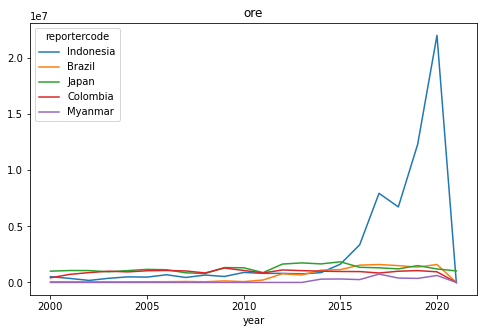

In [323]:
stat = country_stat[country_stat['sector']=='refining'].set_index(['reportercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')


year                      2000   2001   2002   2003   2004   2005   2006  \
reportercode                                                               
Indonesia                0.200  0.100  0.045  0.060  0.075  0.071  0.090   
Brazil                   0.025  0.019  0.016  0.009  0.008  0.010  0.009   
Japan                    0.391  0.297  0.265  0.155  0.159  0.174  0.149   
Colombia                 0.160  0.201  0.220  0.163  0.142  0.156  0.140   
Myanmar                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Ukraine                  0.029  0.000  0.097  0.031  0.075  0.000  0.085   
TFYR of Macedonia        0.000  0.000  0.029  0.021  0.019  0.039  0.045   
Guatemala                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Rep. of Korea            0.001  0.001  0.000  0.001  0.001  0.001  0.001   
Dominican Rep.           0.000  0.119  0.000  0.085  0.084  0.083  0.084   
Russian Federation       0.015  0.005  0.019  0.014  0.017  0.028  0.029   
Philippines              0.000  0.000  0.003  0.000  0.000  0.000  0.000   
Canada                   0.079  0.027  0.081  0.046  0.053  0.048  0.046   
China                    0.007  0.000  0.008  0.006  0.007  0.006  0.005   
Turkey                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
490                      0.006  0.002  0.001  0.000  0.003  0.002  0.002   
India                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Germany                  0.003  0.004  0.003  0.002  0.002  0.002  0.006   
Belgium                  0.001  0.000  0.004  0.002  0.002  0.002  0.001   
France                   0.004  0.002  0.000  0.000  0.000  0.000  0.001   
Zimbabwe                 0.000  0.000  0.000  0.000  0.000  0.001  0.001   
Malaysia                 0.000  0.000  0.018  0.000  0.001  0.002  0.005   
Netherlands              0.042  0.025  0.008  0.005  0.011  0.026  0.042   
South Africa             0.003  0.001  0.001  0.001  0.001  0.001  0.001   
USA                      0.008  0.006  0.004  0.003  0.003  0.003  0.004   
Sweden                   0.001  0.001  0.001  0.001  0.001  0.001  0.001   
Singapore                0.003  0.003  0.003  0.001  0.001  0.001  0.001   
United Arab Emirates     0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Thailand                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
China, Hong Kong SAR     0.000  0.010  0.014  0.008  0.008  0.006  0.004   
United Kingdom           0.002  0.000  0.001  0.001  0.001  0.000  0.001   
Poland                   0.000  0.001  0.001  0.001  0.001  0.001  0.001   
Kazakhstan               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Czech Rep.               0.001  0.000  0.001  0.001  0.001  0.001  0.001   
Austria                  0.001  0.001  0.001  0.000  0.000  0.000  0.000   
Italy                    0.000  0.000  0.000  0.000  0.000  0.005  0.000   
Spain                    0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Bulgaria                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Portugal                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Australia                0.016  0.012  0.017  0.008  0.006  0.006  0.006   
Serbia                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Estonia                  0.001  0.001  0.020  0.007  0.001  0.000  0.000   
Slovakia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Switzerland              0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Slovenia                 0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Ireland                  0.000  0.000  0.000  0.000  0.001  0.001  0.001   
Luxembourg               0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Romania                  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Kuwait                   0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Argentina                0.000  0.000  0.000  0.000  0.000  0.000  0.000   
Viet Nam                 0.000  0.000  0.000  0.

<AxesSubplot:xlabel='year'>

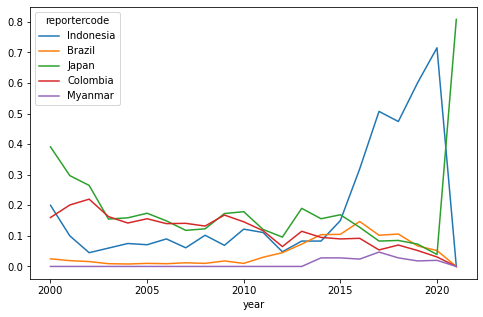

In [324]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                          2000          2001          2002          2003  \
partnercode                                                                    
China                 1.039806e+06  7.747326e+05  1.611288e+06  2.148733e+06   
Indonesia             6.661077e+04  5.781404e+04  1.428412e+05  1.339074e+05   
Germany               2.095926e+06  1.929166e+06  2.043943e+06  1.897446e+06   
Rep. of Korea         8.198554e+05  8.137837e+05  5.094712e+07  1.112242e+06   
Italy                 1.223282e+06  1.279800e+06  1.467701e+06  1.468134e+06   
490                   7.303497e+05  8.161300e+05  1.716021e+06  1.323679e+06   
France                1.734919e+06  1.907327e+06  2.286918e+06  2.270277e+06   
USA                   1.295675e+06  1.255650e+06  1.422835e+06  1.250558e+06   
Japan                 9.591509e+05  8.900577e+05  2.324354e+06  1.435968e+06   
Belgium               1.539042e+06  1.545758e+06  2.025479e+06  1.703157e+06   
Finland               4.184291e+05  4.217633e+05  4.855427e+05  7.745609e+05   
India                 1.398163e+05  1.672325e+05  4.572784e+05  4.169937e+05   
Netherlands           4.233344e+05  4.932376e+05  5.001412e+05  5.666112e+05   
Viet Nam              3.134974e+04  4.156246e+04  6.876316e+04  7.133436e+04   
China, Hong Kong SAR  7.368057e+05  7.940032e+05  8.796595e+05  8.320111e+05   
Turkey                8.712772e+04  7.762764e+04  1.328720e+05  1.925213e+05   
Spain                 6.518302e+05  7.078010e+05  7.623404e+05  8.230244e+05   
Sweden                7.428013e+05  7.219961e+05  8.749931e+05  1.153776e+06   
United Kingdom        1.007780e+06  1.110583e+06  1.252362e+06  1.124834e+06   
Malaysia              9.289973e+04  1.013123e+05  1.921829e+05  1.500300e+05   

year                          2004          2005          2006          2007  \
partnercode                                                                    
China                 2.399980e+06  2.514290e+06  2.805265e+06  2.402314e+06   
Indonesia             1.487063e+05  1.931359e+05  2.291578e+05  2.313944e+05   
Germany               2.220197e+06  2.009552e+06  2.469873e+06  2.396387e+06   
Rep. of Korea         1.535903e+06  1.526744e+06  1.545457e+06  1.270633e+06   
Italy                 1.711518e+06  1.645126e+06  2.074850e+06  1.909781e+06   
490                   1.434264e+06  1.371491e+06  1.466145e+06  1.252562e+06   
France                2.207263e+06  2.031614e+06  2.060278e+06  1.767352e+06   
USA                   2.419287e+07  1.489274e+06  2.048151e+06  1.519542e+06   
Japan                 1.888871e+06  1.338163e+06  3.174221e+06  1.421565e+06   
Belgium               1.770537e+06  1.411981e+06  1.660703e+06  1.329024e+06   
Finland               9.173248e+05  8.946354e+05  9.804624e+05  7.963003e+05   
India                 4.473456e+05  5.704261e+05  6.434211e+05  6.190084e+05   
Netherlands           6.742903e+05  7.029330e+05  9.750622e+05  8.324685e+05   
Viet Nam              8.208636e+04  1.033572e+05  1.289376e+05  1.948615e+05   
China, Hong Kong SAR  6.818201e+05  4.953439e+05  6.648681e+05  3.939340e+05   
Turkey                2.072070e+05  2.328331e+05  3.932570e+05  6.559771e+05   
Spain                 8.632773e+05  7.937784e+05  9.614517e+05  8.503068e+05   
Sweden                1.210993e+06  1.004591e+06  9.842729e+05  7.697035e+05   
United Kingdom        9.600285e+05  8.737412e+05  7.834509e+05  7.564553e+05   
Malaysia              2.027432e+05  1.868471e+05  2.284954e+05  2.728577e+05   

year                          2008          2009          2010          2011  \
partnercode                                                                    
China                 2.423187e+06  1.962782e+06  3.236819e+06  3.464471e+06   
Indonesia             1.714389e+05  1.509414e+05  3.567849e+05  4.308815e+05   
Germany               2.241886e+06  1.667988e+06  3.009671e+06  2.242861e+06   
Rep. of Korea         1.266391e+06  1.317906e+06  1.607145e+06  1.729270e+06  

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

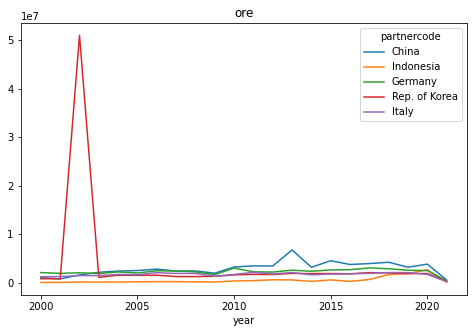

In [252]:
stat = country_stat[country_stat['sector']=='fabrication'].set_index(['reportercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
China                                         0.055  0.041  0.021  0.086   
Indonesia                                     0.004  0.003  0.002  0.005   
Germany                                       0.110  0.101  0.027  0.076   
Rep. of Korea                                 0.043  0.043  0.669  0.044   
Italy                                         0.064  0.067  0.019  0.059   
490                                           0.038  0.043  0.023  0.053   
France                                        0.091  0.100  0.030  0.091   
USA                                           0.068  0.066  0.019  0.050   
Japan                                         0.051  0.047  0.031  0.057   
Belgium                                       0.081  0.081  0.027  0.068   
Finland                                       0.022  0.022  0.006  0.031   
India                                         0.007  0.009  0.006  0.017   
Netherlands                                   0.022  0.026  0.007  0.023   
Viet Nam                                      0.002  0.002  0.001  0.003   
China, Hong Kong SAR                          0.039  0.042  0.012  0.033   
Turkey                                        0.005  0.004  0.002  0.008   
Spain                                         0.034  0.037  0.010  0.033   
Sweden                                        0.039  0.038  0.011  0.046   
United Kingdom                                0.053  0.058  0.016  0.045   
Malaysia                                      0.005  0.005  0.003  0.006   
Thailand                                      0.012  0.013  0.006  0.012   
Poland                                        0.003  0.004  0.001  0.004   
Russian Federation                            0.007  0.005  0.002  0.007   
Austria                                       0.010  0.011  0.003  0.009   
Mexico                                        0.015  0.013  0.004  0.013   
Canada                                        0.012  0.014  0.005  0.014   
Brazil                                        0.007  0.007  0.002  0.008   
Czech Rep.                                    0.003  0.004  0.001  0.003   
Singapore                                     0.006  0.006  0.005  0.006   
Switzerland                                   0.010  0.010  0.002  0.007   
South Africa                                  0.011  0.011  0.004  0.015   
United Arab Emirates                          0.011  0.008  0.001  0.004   
Slovenia                                      0.004  0.004  0.001  0.003   
Denmark                                       0.005  0.005  0.002  0.005   
Australia                                     0.005  0.006  0.003  0.009   
Egypt                                         0.001  0.001  0.000  0.002   
Romania                                       0.004  0.003  0.001  0.004   
Pakistan                                      0.001  0.001  0.000  0.001   
Saudi Arabia                                  0.001  0.002  0.001  0.002   
Bangladesh                                    0.000  0.000  0.000  0.000   
Ukraine                                       0.003  0.003  0.001  0.003   
Hungary                                       0.002  0.002  0.001  0.002   
Portugal                                      0.003  0.003  0.001  0.003   
Philippines                                   0.002  0.002  0.001  0.001   
Slovakia                                      0.001  0.001  0.002  0.001   
Luxembourg                                    0.001  0.002  0.000  0.001   
Norway                                        0.003  0.004  0.001  0.003   
Colombia                                      0.000  0.001  0.000  0.001   
Areas, nes                                    0.001  0.001  0.001  0.000   
Bulgaria                                      0.000  0.000  0.000  0.000   
Argentina                                     0.

<AxesSubplot:xlabel='year'>

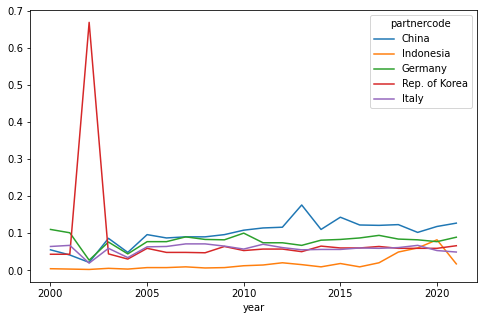

In [253]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


year                        2000          2001          2002          2003  \
partnercode                                                                  
USA                 1.080333e+06  1.393775e+06  1.949885e+06  1.969998e+06   
China               4.172454e+05  4.638475e+05  8.150476e+05  8.721461e+05   
Germany             1.068047e+06  9.922769e+05  1.410808e+06  1.239197e+06   
Italy               4.583247e+05  4.629007e+05  6.528324e+05  5.535253e+05   
United Kingdom      3.571184e+05  3.965851e+05  4.800860e+05  4.159497e+05   
France              6.193064e+05  5.089645e+05  5.819164e+05  5.838690e+05   
Mexico              1.513055e+05  1.750534e+05  2.134851e+05  2.035887e+05   
Japan               3.383443e+05  4.219140e+05  5.756239e+05  4.451476e+05   
India               4.510688e+04  4.897043e+04  1.490814e+05  8.853542e+04   
Turkey              5.586095e+04  4.400292e+04  7.183261e+04  8.303845e+04   
Russian Federation  7.757659e+04  8.466142e+04  1.246368e+05  1.600178e+05   
Poland              1.258362e+05  1.338012e+05  1.495754e+05  1.680764e+05   
Netherlands         3.161700e+05  3.334894e+05  4.119181e+05  3.291700e+05   
Rep. of Korea       1.656313e+05  1.562202e+05  1.950280e+05  1.968195e+05   
Canada              3.780223e+05  3.972416e+05  4.075542e+05  4.127077e+05   
Spain               2.682890e+05  2.640292e+05  2.820096e+05  3.218215e+05   
Thailand            9.192457e+04  9.805030e+04  1.459807e+05  1.407809e+05   
South Africa        3.986764e+04  4.467470e+04  4.482777e+04  7.271328e+04   
Brazil              7.262676e+04  7.744898e+04  9.466628e+04  8.400056e+04   
490                 1.604139e+05  1.483272e+05  2.146383e+05  1.713572e+05   

year                        2004          2005          2006          2007  \
partnercode                                                                  
USA                 2.049372e+07  1.589227e+06  1.990491e+06  1.746828e+06   
China               9.175390e+06  1.253348e+06  1.648172e+06  1.685881e+06   
Germany             1.676468e+06  1.377852e+06  1.545445e+06  1.630686e+06   
Italy               6.838666e+05  6.248927e+05  7.383718e+05  7.568722e+05   
United Kingdom      5.247626e+05  4.530665e+05  5.822705e+05  4.661532e+05   
France              6.587704e+05  6.666328e+05  6.793678e+05  7.356728e+05   
Mexico              2.304160e+05  2.498793e+05  2.787578e+05  2.678714e+05   
Japan               7.810286e+05  4.969223e+05  1.176254e+06  5.515683e+05   
India               1.259683e+05  1.456866e+05  1.922821e+05  2.467166e+05   
Turkey              1.079445e+05  1.291218e+05  2.005390e+05  1.850691e+05   
Russian Federation  1.828054e+05  2.023413e+05  2.489664e+05  2.523704e+05   
Poland              1.642242e+05  1.809634e+05  2.325679e+05  2.480762e+05   
Netherlands         3.442457e+05  3.780431e+05  4.480273e+05  3.782628e+05   
Rep. of Korea       4.469976e+05  2.828251e+05  3.872164e+05  4.004516e+05   
Canada              5.237567e+05  4.498548e+05  4.877872e+05  4.657616e+05   
Spain               3.532526e+05  3.566405e+05  3.827401e+05  3.703401e+05   
Thailand            1.948697e+05  1.824080e+05  2.099802e+05  2.181836e+05   
South Africa        6.977645e+04  8.751352e+04  9.580583e+04  1.140860e+05   
Brazil              1.713149e+05  1.168314e+05  1.346664e+05  1.413292e+05   
490                 1.068134e+06  2.107111e+05  2.489832e+05  2.288004e+05   

year                        2008          2009          2010          2011  \
partnercode                                                                  
USA                 1.610464e+06  1.258821e+06  1.934213e+06  2.176750e+06   
China               1.879548e+06  1.525966e+06  7.551772e+06  1.220199e+07   
Germany             1.733974e+06  1.244223e+06  2.225591e+06  2.510501e+06   
Italy               8.677107e+05  6.099317e+05  1.212397e+06  1.436843e+06   
United Kingdom      4.754215e+05  4.046895e+05  4.464358e+05  5.151539e+05   
France              

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

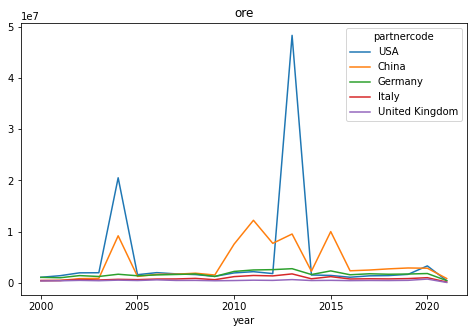

In [249]:
stat = country_stat[country_stat['sector']=='processed'].set_index(['reportercode', 'year'])['new_netweight'].unstack()\
                                                 .sort_values(by=2020, ascending=False).fillna(0)
stat.head(20)
stat.head(5).T.plot(figsize=(8, 5), title='ore')



year                                           2000   2001   2002   2003  \
partnercode                                                                
USA                                           0.059  0.074  0.079  0.078   
China                                         0.023  0.025  0.033  0.034   
Germany                                       0.058  0.053  0.057  0.049   
Italy                                         0.025  0.025  0.026  0.022   
United Kingdom                                0.020  0.021  0.020  0.017   
France                                        0.034  0.027  0.024  0.023   
Mexico                                        0.008  0.009  0.009  0.008   
Japan                                         0.019  0.022  0.023  0.018   
India                                         0.003  0.003  0.006  0.004   
Turkey                                        0.003  0.003  0.003  0.003   
Russian Federation                            0.004  0.005  0.005  0.007   
Poland                                        0.007  0.007  0.006  0.007   
Netherlands                                   0.017  0.018  0.017  0.013   
Rep. of Korea                                 0.009  0.008  0.008  0.008   
Canada                                        0.021  0.021  0.017  0.016   
Spain                                         0.015  0.014  0.012  0.013   
Thailand                                      0.005  0.005  0.006  0.006   
South Africa                                  0.002  0.003  0.002  0.003   
Brazil                                        0.004  0.004  0.004  0.004   
490                                           0.009  0.008  0.009  0.007   
Belgium                                       0.013  0.011  0.011  0.011   
Indonesia                                     0.004  0.003  0.003  0.004   
Viet Nam                                      0.002  0.002  0.002  0.002   
Czech Rep.                                    0.007  0.008  0.008  0.007   
Malaysia                                      0.005  0.005  0.004  0.008   
Austria                                       0.009  0.014  0.007  0.007   
United Arab Emirates                          0.003  0.003  0.003  0.005   
Sweden                                        0.009  0.010  0.008  0.008   
Denmark                                       0.006  0.006  0.005  0.005   
Hungary                                       0.003  0.003  0.003  0.003   
Australia                                     0.004  0.004  0.007  0.026   
Saudi Arabia                                  0.002  0.002  0.002  0.003   
Pakistan                                      0.001  0.001  0.001  0.001   
Philippines                                   0.002  0.002  0.002  0.002   
Kazakhstan                                    0.001  0.001  0.001  0.001   
Ukraine                                       0.002  0.002  0.002  0.002   
Colombia                                      0.001  0.001  0.001  0.001   
China, Hong Kong SAR                          0.005  0.004  0.005  0.004   
Singapore                                     0.019  0.005  0.008  0.006   
Portugal                                      0.006  0.004  0.004  0.004   
Egypt                                         0.002  0.002  0.001  0.001   
Finland                                       0.005  0.006  0.005  0.005   
Romania                                       0.002  0.002  0.002  0.002   
Chile                                         0.001  0.001  0.001  0.002   
Switzerland                                   0.008  0.007  0.006  0.005   
Peru                                          0.001  0.001  0.001  0.001   
Israel                                        0.002  0.002  0.001  0.001   
Slovakia                                      0.002  0.002  0.002  0.002   
Argentina                                     0.002  0.002  0.001  0.002   
Nigeria                                       0.001  0.001  0.001  0.001   
Iraq                                          0.

<AxesSubplot:title={'center':'ore'}, xlabel='year'>

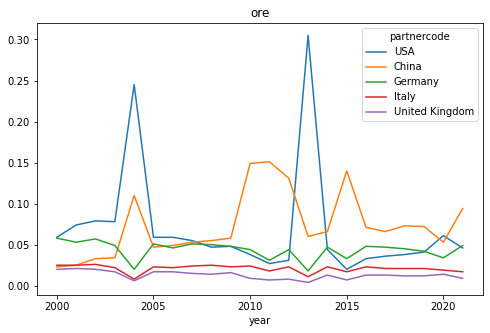

In [251]:
stat.loc['total'] = stat.sum(axis=0)
stat = stat.fillna(0)
stat = np.round(stat / stat.loc['total'], 3)
stat
stat.head(5).T.plot(figsize=(8, 5))


In [160]:
country_stat['rank'] = country_stat.groupby('sector')['new_tradevalue'].rank(ascending=False)


In [161]:
country_stat[country_stat['sector']=='ore'].sort_values(by='new_tradevalue', ascending=False)


sector              partnercode  new_netweight  new_tradevalue  rank
264    ore                    World   5.561650e+08      3923378731   1.0
243    ore              Philippines   3.817982e+08      1806332218   2.0
237    ore            New Caledonia   8.756761e+07       579016834   3.0
210    ore                Australia   2.770326e+06       258648706   4.0
229    ore                Indonesia   4.498775e+07       216935165   5.0
251    ore             South Africa   1.337507e+06       216849282   6.0
257    ore                      USA   1.905723e+05       201596565   7.0
215    ore                   Canada   1.553760e+01       147160422   8.0
220    ore            Côte d'Ivoire   1.271485e+07       101767914   9.0
247    ore       Russian Federation   1.487689e+06        92328026  10.0
213    ore                   Brazil   5.768226e+05        88359969  11.0
227    ore                Guatemala   1.508538e+07        73871039  12.0
266    ore                 Zimbabwe   3.196752e+05        34989088  13.0
256    ore                   Turkey   2.579990e+06        24848640  14.0
223    ore                  Finland   1.885390e+05        21876509  15.0
265    ore                   Zambia   1.533521e+05        18753734  16.0
254    ore              Switzerland   1.386988e+04        16737528  17.0
207    ore                  Albania   4.284900e+06         8563434  18.0
245    ore            Rep. of Korea   2.280642e+04         2593200  19.0
232    ore                    Japan   1.049139e+04         1992939  20.0
231    ore                    Italy   1.489001e+03         1890961  21.0
234    ore                 Malaysia   1.064204e+04         1678569  22.0
239    ore                   Norway   9.883949e+03         1273420  23.0
225    ore                  Germany   7.851051e+02         1169405  24.0
233    ore               Kazakhstan   3.521055e+04          862176  25.0
236    ore              Netherlands   6.814174e+03          804262  26.0
252    ore                    Spain   1.840211e+03          645396  27.0
206    ore                      490   4.555652e+03          530354  28.0
255    ore                 Thailand   8.554806e+03          388575  29.0
216    ore                    China   1.879558e+03          339473  30.0
235    ore                   Mexico   6.772545e+02          204713  31.0
248    ore                Singapore   7.389603e+02           79537  32.0
228    ore                    India   1.538901e+02           59744  33.0
224    ore                   France   1.844271e+02           52961  34.0
249    ore                 Slovakia   1.792089e+02           31916  35.0
250    ore                 Slovenia   4.277052e+02           30489  36.0
259    ore           United Kingdom   1.805310e+01           27628  37.0
258    ore     United Arab Emirates   3.462030e+01           22144  38.0
212    ore                  Belgium   5.850000e+00           15865  39.0
221    ore                  Estonia   1.263483e+02            9351  40.0
219    ore               Czech Rep.   5.873400e+00            7254  41.0
261    ore                  Uruguay   4.045860e+01            7202  42.0
222    ore                 Ethiopia   2.106000e+02            6300  43.0
242    ore         Papua New Guinea   3.744000e+00            5587  44.0
218    ore                     Cuba   3.638700e+00            4741  45.0
241    ore        Other Europe, nes   3.123900e+00            3884  46.0
208    ore               Areas, nes   6.084000e-01            2475  47.0
217    ore     China, Hong Kong SAR   2.258100e+00            1070  48.0
260    ore  United Rep. of Tanzania   1.345500e+00            1032  49.0
226    ore                   Greece   1.755000e-01             640  50.0
262    ore                Venezuela   1.694160e+01             109  51.0
253    ore                   Sweden   7.020000e-02              88  52.0
209    ore                Argentina   2.574000e-01              63  53.0
211    ore                  Austria   2.574000e-01            

In [162]:
country_stat[country_stat['sector']=='refining'].sort_values(by='new_tradevalue', ascending=False)


sector           partnercode  new_netweight  new_tradevalue  rank
592  refining                 World   1.822520e+09     16013338676   1.0
542  refining             Indonesia   1.073597e+09      5927017464   2.0
523  refining                Canada   1.747090e+07      1767715414   3.0
562  refining         New Caledonia   2.739558e+08      1190238960   4.0
573  refining    Russian Federation   1.791161e+06      1186484560   5.0
535  refining               Finland   1.435028e+07       680961289   6.0
568  refining           Philippines   1.812127e+07       594123318   7.0
521  refining                Brazil   5.423787e+07       535495686   8.0
566  refining      Papua New Guinea   3.325033e+07       458729188   9.0
527  refining              Colombia   4.466158e+07       452622484  10.0
547  refining                 Japan   5.882578e+07       360714364  11.0
533  refining        Dominican Rep.   2.246843e+07       305644164  12.0
560  refining               Myanmar   2.783472e+07       298219066  13.0
539  refining             Guatemala   2.136525e+07       249511577  14.0
516  refining             Australia   8.350704e+06       236472498  15.0
571  refining         Rep. of Korea   2.623425e+07       228410093  16.0
512  refining                   490   6.272891e+06       227110362  17.0
561  refining           Netherlands   1.881468e+07       184035124  18.0
583  refining     TFYR of Macedonia   1.525802e+07       150546881  19.0
529  refining                  Cuba   2.842680e+06       145798450  20.0
587  refining               Ukraine   2.128885e+07       143315516  21.0
538  refining                Greece   1.704307e+07       111163555  22.0
537  refining               Germany   5.278629e+06        88791281  23.0
518  refining               Belgium   2.034203e+06        80243678  24.0
589  refining        United Kingdom   9.580515e+06        59965825  25.0
585  refining                Turkey   4.775509e+06        57161550  26.0
575  refining                Serbia   7.608462e+06        47035192  27.0
586  refining                   USA   1.465705e+06        30030849  28.0
525  refining                 China   1.063761e+06        28310664  29.0
581  refining                Sweden   9.115687e+05        27365549  30.0
576  refining             Singapore   3.562493e+06        25731395  31.0
536  refining                France   4.537928e+06        24216219  32.0
579  refining          South Africa   4.558560e+05        18322062  33.0
513  refining               Albania   2.085377e+06        13364179  34.0
517  refining               Austria   1.813643e+05         9232553  35.0
564  refining                Norway   1.529808e+05         6941691  36.0
555  refining              Malaysia   4.912374e+05         6834162  37.0
546  refining                 Italy   2.069207e+05         6811571  38.0
588  refining  United Arab Emirates   1.317763e+05         6143109  39.0
531  refining            Czech Rep.   2.521776e+05         5788976  40.0
582  refining           Switzerland   4.645949e+05         5774873  41.0
569  refining                Poland   1.369258e+05         5461955  42.0
553  refining            Luxembourg   4.725209e+05         3758290  43.0
580  refining                 Spain   3.067358e+05         3461227  44.0
541  refining                 India   1.069472e+05         2232922  45.0
578  refining              Slovenia   1.738014e+04         2077229  46.0
534  refining               Estonia   1.893921e+05         1978812  47.0
584  refining              Thailand   3.062126e+05         1974062  48.0
590  refining             Venezuela   2.711405e+05         1740965  49.0
522  refining              Bulgaria   4.246979e+04         1686657  50.0
559  refining               Morocco   2.353458e+05         1414355  51.0
540  refining               Hungary   7.757269e+03          999097  52.0
572  refining               Romania   2.660242e+04          957096  53.0
577  refining              Slovakia   1.217501e+05          69473

In [163]:
country_stat[country_stat['sector']=='fabrication'].sort_values(by='new_tradevalue', ascending=False)


sector                                   partnercode  new_netweight  \
202  fabracation                                         World   1.439497e+09   
46   fabracation                                         China   2.196889e+08   
79   fabracation                                       Germany   8.839088e+07   
99   fabracation                                         Japan   8.754008e+07   
190  fabracation                                           USA   5.853043e+07   
152  fabracation                                 Rep. of Korea   9.809039e+07   
92   fabracation                                     Indonesia   2.471301e+08   
74   fabracation                                        France   7.300295e+07   
97   fabracation                                         Italy   7.182934e+07   
24   fabracation                                       Belgium   8.292942e+07   
176  fabracation                                        Sweden   4.190746e+07   
73   fabracation                                       Finland   9.893174e+07   
40   fabracation                                        Canada   5.009098e+06   
17   fabracation                                       Austria   1.708779e+07   
0    fabracation                                           490   6.082045e+07   
155  fabracation                            Russian Federation   7.764789e+06   
132  fabracation                                   Netherlands   2.646439e+07   
193  fabracation                          United Arab Emirates   3.082299e+06   
171  fabracation                                         Spain   4.163149e+07   
91   fabracation                                         India   4.419745e+07   
139  fabracation                                        Norway   1.676706e+06   
194  fabracation                                United Kingdom   2.529612e+07   
116  fabracation                                      Malaysia   1.346196e+07   
20   fabracation                                       Bahrain   5.926999e+05   
151  fabracation                                         Qatar   4.912674e+05   
57   fabracation                                    Czech Rep.   5.384052e+06   
200  fabracation                                      Viet Nam   8.343505e+06   
168  fabracation                                      Slovenia   9.240915e+06   
149  fabracation                                        Poland   6.663388e+06   
177  fabracation                                   Switzerland   6.624161e+06   
33   fabracation                                        Brazil   6.362928e+06   
187  fabracation                                        Turkey   1.082475e+07   
123  fabracation                                        Mexico   5.901158e+06   
169  fabracation                                  South Africa   1.727618e+07   
16   fabracation                                     Australia   5.975759e+06   
154  fabracation                                       Romania   2.673638e+06   
90   fabracation                                       Iceland   2.581210e+05   
181  fabracation                                      Thailand   7.243796e+06   
167  fabracation                                      Slovakia   1.046108e+06   
166  fabracation                                     Singapore   6.822581e+06   
113  fabracation                                    Luxembourg   2.606054e+06   
192  fabracation                                       Ukraine   4.035597e+06   
82   fabracation                                        Greece   4.873012e+05   
61   fabracation                                       Denmark   4.029088e+06   
161  fabracation                                  Saudi Arabia   2.497741e+06   
13   fabracation                                     Argentina   1.606053e+05   
89   fabracation                                       Hungary   1.418459e+06   
65   fabracation                                         Egypt   3.231245e+05   
47   fabracation                         

In [164]:
country_stat[country_stat['sector']=='processed'].sort_values(by='new_tradevalue', ascending=False).reset_index(drop=True)


sector                                   partnercode  new_netweight  \
0    processed                                         World   8.845653e+08   
1    processed                                         China   2.582079e+08   
2    processed                                       Germany   7.964576e+07   
3    processed                                           USA   6.947103e+07   
4    processed                                        Mexico   3.352268e+07   
5    processed                                         Japan   3.087039e+07   
6    processed                                 Rep. of Korea   2.382766e+07   
7    processed                                         Italy   5.980594e+07   
8    processed                                United Kingdom   1.792357e+07   
9    processed                                        France   3.081080e+07   
10   processed                                      Thailand   1.945945e+07   
11   processed                                         Spain   1.812431e+07   
12   processed                                   Netherlands   2.182042e+07   
13   processed                                        Canada   1.173641e+07   
14   processed                                           490   2.070515e+07   
15   processed                                    Czech Rep.   1.922611e+07   
16   processed                                       Belgium   9.494867e+06   
17   processed                                      Slovakia   4.861026e+06   
18   processed                                        Poland   2.489647e+07   
19   processed                                        Turkey   1.997329e+07   
20   processed                                        Sweden   1.205661e+07   
21   processed                                       Hungary   8.993219e+06   
22   processed                                       Austria   1.776448e+07   
23   processed                                       Ireland   2.234571e+06   
24   processed                                      Malaysia   8.885858e+06   
25   processed                                      Viet Nam   8.688068e+06   
26   processed                                   Switzerland   6.375102e+06   
27   processed                                         India   2.462314e+07   
28   processed                                     Singapore   3.466541e+06   
29   processed                                  South Africa   2.902237e+07   
30   processed                                       Romania   4.218264e+06   
31   processed                                       Denmark   9.252832e+06   
32   processed                                      Portugal   6.622182e+06   
33   processed                                       Finland   8.152519e+06   
34   processed                                     Indonesia   2.351458e+06   
35   processed                                        Brazil   3.634530e+06   
36   processed                                   Philippines   8.551847e+05   
37   processed                                      Slovenia   2.760754e+06   
38   processed                            Russian Federation   4.843051e+06   
39   processed                                    Costa Rica   6.201847e+05   
40   processed                          China, Hong Kong SAR   2.159437e+06   
41   processed                                        Israel   1.262337e+06   
42   processed                                     Argentina   1.033026e+06   
43   processed                                       Morocco   5.438842e+05   
44   processed                                    Areas, nes   3.410591e+06   
45   processed                                      Bulgaria   2.034508e+06   
46   processed                                       Belarus   4.345910e+06   
47   processed                                     Australia   1.231833e+06   
48   processed                                   Cayman Isds   4.151597e+04   
49   processed                                        Norw

## 只看镍盐

In [49]:
trade_salt = data[data['commoditycode']==283324]


In [64]:
# 换成国家名
trade_salt['reportercode'] = trade_salt['reportercode'].replace(country_info_dic)
trade_salt['partnercode'] = trade_salt['partnercode'].replace(country_info_dic)
trade_salt.head()


period reportercode  tradeflowcode         partnercode  commoditycode  \
23655    2019   Azerbaijan              1             Belgium         283324   
23656    2019   Azerbaijan              1  Russian Federation         283324   
23657    2019    Argentina              1             Belgium         283324   
23658    2019    Argentina              1             Finland         283324   
23659    2019    Australia              1               China         283324   

       netweight  tradevalue  new_netweight  new_tradevalue    sector  
23655     13.500      1260.0         13.500          1260.0  refining  
23656      3.375       278.0          3.375           278.0  refining  
23657   4147.200    242639.0       4147.200        242639.0  refining  
23658   1275.750     82170.0       1275.750         82170.0  refining  
23659    209.250     15251.0        209.250         15251.0  refining

In [67]:
# 只关注最近一年
trade_salt = trade_salt[trade_salt['period']==2019]


In [68]:
trade_salt


period          reportercode  tradeflowcode           partnercode  \
23655    2019            Azerbaijan              1               Belgium   
23656    2019            Azerbaijan              1    Russian Federation   
23657    2019             Argentina              1               Belgium   
23658    2019             Argentina              1               Finland   
23659    2019             Australia              1                 China   
23660    2019             Australia              1               Finland   
23661    2019             Australia              1                France   
23662    2019             Australia              1               Germany   
23664    2019             Australia              1              Malaysia   
23665    2019             Australia              1                   490   
23666    2019             Australia              1         New Caledonia   
23668    2019             Australia              1          South Africa   
23669    2019             Australia              1           Switzerland   
23670    2019             Australia              1                Turkey   
23671    2019             Australia              1                   USA   
23672    2019               Austria              1               Belgium   
23679    2019               Austria              1               Germany   
23685    2019               Austria              1                Poland   
23692    2019               Austria              1                   USA   
23694    2019               Armenia              1    Russian Federation   
23699    2019               Belgium              1              Bulgaria   
23709    2019               Belgium              1                France   
23711    2019               Belgium              1               Germany   
23718    2019               Belgium              1                 Italy   
23720    2019               Belgium              1                 Japan   
23723    2019               Belgium              1         Rep. of Korea   
23728    2019               Belgium              1           Netherlands   
23738    2019               Belgium              1                 India   
23744    2019               Belgium              1                Sweden   
23746    2019               Belgium              1           Switzerland   
23752    2019               Belgium              1        United Kingdom   
23756    2019    Bosnia Herzegovina              1               Austria   
23757    2019    Bosnia Herzegovina              1               Germany   
23758    2019    Bosnia Herzegovina              1                Poland   
23759    2019    Bosnia Herzegovina              1                   USA   
23760    2019              Botswana              1                 India   
23761    2019              Botswana              1          South Africa   
23762    2019                Brazil              1               Austria   
23763    2019                Brazil              1               Belgium   
23764    2019                Brazil              1               Finland   
23765    2019                Brazil              1               Germany   
23766    2019                Brazil              1                 Italy   
23767    2019                Brazil              1                 Japan   
23768    2019                Brazil              1                   490   
23769    2019                Brazil              1           Netherlands   
23771    2019                Brazil              1                 India   
23772    2019                Brazil              1                   USA   
23774    2019     Brunei Darussalam              1        United Kingdom   
23776    2019              Bulgaria              1               Germany   
23777    2019              Bulgaria              1                 Italy   
23778    2019              Bulgaria              1           Netherlands   
23779    2019              Bulgaria              1     

In [69]:
country_stat = trade_salt.groupby(['partnercode'])['new_netweight', 'new_tradevalue'].sum().reset_index()


In [70]:
# 含镍电池关键出口国

In [71]:
country_stat.sort_values(by='new_netweight', ascending=False).reset_index(drop=True)


partnercode  new_netweight  new_tradevalue
0                    490   4.995307e+06     252311760.0
1                Finland   2.238891e+06     105939942.0
2                Belgium   2.118936e+06      92013690.0
3          Rep. of Korea   1.197881e+06      61941517.0
4            Netherlands   6.347122e+05      33091021.0
5                Germany   4.324896e+05      20991459.0
6                  Japan   3.869853e+05      21617994.0
7                    USA   3.032310e+05      13718012.0
8           South Africa   2.521392e+05       8998982.0
9                 Sweden   2.246893e+05      10020899.0
10                Poland   1.340937e+05       5493771.0
11               Austria   1.302981e+05       7030408.0
12                 Italy   9.719467e+04       5740065.0
13                 China   7.638975e+04       4215401.0
14         New Caledonia   6.043572e+04       3817515.0
15            Areas, nes   4.853668e+04        693878.0
16             Singapore   4.046504e+04       1826874.0
17              Bulgaria   3.774890e+04       1707085.0
18                Turkey   3.562110e+04        911178.0
19              Malaysia   3.046457e+04       1349818.0
20                Norway   2.612844e+04       6199601.0
21              Thailand   1.897783e+04        815503.0
22                 Spain   1.463434e+04        643843.0
23                France   1.200542e+04        780011.0
24    Russian Federation   1.081573e+04        383210.0
25           Philippines   9.532485e+03        288986.0
26           Switzerland   5.751000e+03        371714.0
27  China, Hong Kong SAR   4.939177e+03        281696.0
28                 India   1.728270e+03         94984.0
29              Slovenia   1.491480e+03         44395.0
30                Canada   1.046925e+03         14886.0
31        United Kingdom   6.714225e+02         50959.0
32             Australia   4.698000e+02         24285.0
33     Other Europe, nes   3.132675e+02         19149.0
34                Brazil   2.835000e+02         23822.0
35                Mexico   2.075625e+02         34542.0
36        American Samoa   2.025000e+02         16037.0
37             Argentina   1.736100e+02         16966.0
38            Czech Rep.   3.732750e+01          4243.0
39               Albania   3.375000e+01          2554.0
40               Hungary   2.187000e+01          1335.0
41               Denmark   3.240000e+00           229.0
42            Luxembourg   3.037500e+00           218.0
43              Slovakia   2.025000e+00           147.0
44               Romania   1.350000e+00            97.0
45               Ireland   4.725000e-01           204.0
46             Lithuania   4.725000e-01            36.0
47                Greece   2.700000e-01            25.0
48                Latvia   2.700000e-01            17.0
49  United Arab Emirates   2.700000e-01            46.0
50                 Malta   2.025000e-01            15.0
51               Belarus   2.025000e-01            21.0
52              Portugal   2.025000e-01            17.0
53                Cyprus   1.350000e-01            14.0

## 只看含镍电池

In [ ]:
trade_battry_world = pd.read_csv('../锂原电池comtrade.csv')
trade_battry_world = trade_battry_world[['Year', 'Trade Flow', 'Reporter', 'Partner', 'Netweight (kg)']]
trade_battry_world = trade_battry_world[trade_battry_world['Trade Flow']=='Import']


In [ ]:
trade_battry_world['Netweight (kg)'].sum()

In [423]:
trade_battry_rus = pd.read_csv('../锂原电池-RUS-comtrade.csv')
trade_battry_rus = trade_battry_rus[['Year', 'Trade Flow', 'Reporter', 'Partner', 'Netweight (kg)']]
trade_battry_rus = trade_battry_rus[trade_battry_rus['Trade Flow']=='Import']


In [426]:
trade_battry_rus['Netweight (kg)'].sum() / trade_battry_world['Netweight (kg)'].sum()


3.3411847897908185e-05

In [424]:
trade_battry.sort_values(by='Netweight (kg)', ascending=False)

Year Trade Flow                          Reporter Partner  Netweight (kg)
45   2020     Import                             China   World     811825008.0
324  2021     Import                               USA   World       5617288.0
199  2020     Import                         Singapore   World       4962102.0
240  2020     Import                               USA   World       4871094.0
94   2020     Import              China, Hong Kong SAR   World       4505271.0
276  2021     Import              China, Hong Kong SAR   World       4061521.0
146  2020     Import                          Malaysia   World       3772861.0
84   2020     Import                           Germany   World       3529468.0
291  2021     Import                            Mexico   World       2657592.0
318  2021     Import                    United Kingdom   World       2599160.0
203  2020     Import                          Viet Nam   World       2555178.0
295  2021     Import                       Netherlands   World       2424213.0
234  2020     Import                    United Kingdom   World       2265722.0
181  2020     Import                            Poland   World       2175355.0
166  2020     Import                       Netherlands   World       1991483.0
106  2020     Import                             Italy   World       1927028.0
77   2020     Import                            France   World       1591004.0
186  2020     Import                           Romania   World       1519874.0
337  2020     Import                           Nigeria   World       1407003.0
223  2020     Import              United Arab Emirates   World       1133642.0
262  2021     Import                           Czechia   World       1127814.0
258  2021     Import                            Canada   World       1123742.0
215  2020     Import                            Sweden   World       1028431.0
14   2020     Import                           Belgium   World        999401.0
36   2020     Import                            Canada   World        972922.0
102  2020     Import                           Ireland   World        935642.0
113  2020     Import                             Japan   World        928435.0
280  2021     Import                             Japan   World        770808.0
7    2020     Import                           Austria   World        763722.0
62   2020     Import                           Denmark   World        682450.0
264  2021     Import                           Denmark   World        667053.0
179  2020     Import                       Philippines   World        663565.0
173  2020     Import                            Norway   World        641299.0
122  2020     Import                     Rep. of Korea   World        640732.0
188  2020     Import                Russian Federation   World        609670.0
315  2021     Import                       Switzerland   World        498728.0
96   2020     Import                           Hungary   World        493535.0
153  2020     Import                   Other Asia, nes   World        461713.0
5    2020     Import                         Australia   World        449144.0
338  2020     Import                      Saudi Arabia   World        425779.0
24   2020     Import                            Brazil   World        396822.0
220  2020     Import                          Thailand   World        391876.0
201  2020     Import                          Slovakia   World        380964.0
197  2020     Import                             India   World        358036.0
226  2020     Import                            Turkey   World        319784.0
307  2021     Import                          Portugal   World        305248.0
100  2020     Import                         Indonesia   World        251089.0
3    2020     Import                         Argentina   World        212824.0
104  2020     Import                            Israel   World        199230.0
322  2021     Import           United Rep. of Tanzania 

In [390]:
trade_battry = data[data['commoditycode']==850650]


In [391]:
# 换成国家名
raw_data_path = '/Users/linzipeng/Documents/IUE/1_Material_flow_analysis/Iron/Steel/data/'
country_info = pd.read_excel(raw_data_path + "SteelCycleCompile_Input.xlsx", sheet_name="CountryList", skiprows=1)
country_info = country_info[['CountryList (289)', 'Unnamed: 4', 'region', 'PlotSelect', 'Industrialized (GDP top 25)']]
country_info.columns = ['AllCountries', 'AllCountryNames', 'AllRegions', 'Country_PlotSelect', 'Industrialized_Sel']

country_info_dic = country_info[['AllCountryNames', 'AllCountries']].set_index('AllCountries').to_dict()['AllCountryNames']
trade_battry['reportercode'] = trade_battry['reportercode'].replace(country_info_dic)
trade_battry['partnercode'] = trade_battry['partnercode'].replace(country_info_dic)
trade_battry.head()


Empty DataFrame
Columns: [period, reportercode, tradeflowcode, partnercode, commoditycode, netweight, tradevalue, new_netweight, new_tradevalue, sector]
Index: []

In [392]:
# 只关注最近一年
trade_battry = trade_battry[trade_battry['period']==2019]


In [393]:
country_stat = trade_battry.groupby(['partnercode'])['new_netweight', 'new_tradevalue'].sum().reset_index()


In [394]:
# 含镍电池关键出口国

In [395]:
country_stat.sort_values(by='new_netweight', ascending=False)


Empty DataFrame
Columns: [partnercode, new_netweight, new_tradevalue]
Index: []

In [154]:
trade.reportercode.nunique()
trade.partnercode.nunique()

129

243

In [134]:
trade2 = trade.groupby(['reportercode', 'sector'])['new_netweight', 'new_tradevalue', 'netweight', 'tradevalue'].sum()
trade2 = trade2.reset_index()
trade2


reportercode       sector  new_netweight  \
0                                 490  fabracation   1.683477e+09   
1                                 490          ore   3.850000e+02   
2                                 490    processed   6.067316e+08   
3                                 490     refining   1.178183e+08   
4                 Antigua and Barbuda  fabracation   2.062800e+05   
5                 Antigua and Barbuda    processed   1.051064e+07   
6                           Argentina  fabracation   1.115420e+08   
7                           Argentina          ore   5.400000e+01   
8                           Argentina    processed   5.347230e+08   
9                           Argentina     refining   1.139710e+05   
10                            Armenia  fabracation   4.697469e+06   
11                            Armenia    processed   9.041278e+07   
12                            Armenia     refining   7.930000e+02   
13                              Aruba  fabracation   5.418250e+05   
14                              Aruba    processed   1.101395e+07   
15                          Australia  fabracation   2.101634e+08   
16                          Australia          ore   4.240000e+02   
17                          Australia    processed   2.517644e+09   
18                          Australia     refining   1.027357e+07   
19                            Austria  fabracation   6.836830e+08   
20                            Austria          ore   6.610300e+04   
21                            Austria    processed   1.300389e+09   
22                            Austria     refining   1.360537e+06   
23                         Azerbaijan  fabracation   1.891570e+07   
24                         Azerbaijan    processed   1.857969e+08   
25                         Azerbaijan     refining   3.260000e+02   
26                           Barbados  fabracation   4.462500e+05   
27                           Barbados    processed   1.446038e+07   
28                            Belarus  fabracation   2.060839e+08   
29                            Belarus    processed   2.547121e+08   
30                            Belarus     refining   1.108700e+04   
31                            Belgium  fabracation   2.086000e+09   
32                            Belgium          ore   2.069050e+06   
33                            Belgium    processed   4.387767e+09   
34                            Belgium     refining   1.164613e+08   
35                             Belize  fabracation   3.118910e+06   
36                             Belize    processed   5.618174e+07   
37                              Benin  fabracation   1.289299e+07   
38                              Benin    processed   6.262342e+07   
39                            Bermuda  fabracation   4.304040e+05   
40                            Bermuda    processed   5.868279e+06   
41                 Bosnia Herzegovina  fabracation   6.600789e+07   
42                 Bosnia Herzegovina    processed   1.857397e+08   
43                 Bosnia Herzegovina     refining   2.612800e+04   
44                           Botswana  fabracation   1.461644e+07   
45                           Botswana    processed   1.354393e+08   
46                           Botswana     refining   1.071000e+03   
47                             Brazil  fabracation   4.129025e+08   
48                             Brazil          ore   4.843280e+05   
49                             Brazil    processed   9.536265e+08   
50                             Brazil     refining   1.371320e+06   
51                  Brunei Darussalam  fabracation   3.092747e+07   
52                  Brunei Darussalam    processed   4.757097e+07   
53                  Brunei Darussalam     refining   1.000000e+00   
54                           Bulgaria  fabracation   1.658786e+08   
55                           Bulgaria    processed   3.114037e+08   
56                           Bulgaria     refining   1.280500e+04   
57                     

In [130]:
pd.merge(trade[trade['partnercode']=='Russian Federation'], trade2, )

reportercode         partnercode  period     sector  new_netweight  \
221     Afghanistan  Russian Federation    2008  processed         3842.0   
222     Afghanistan  Russian Federation    2009  processed        67852.0   
223     Afghanistan  Russian Federation    2010  processed        20290.0   
224     Afghanistan  Russian Federation    2011  processed         4675.0   
225     Afghanistan  Russian Federation    2015  processed         1549.0   
...             ...                 ...     ...        ...            ...   
539465       Zambia  Russian Federation    2015  processed        40923.0   
539466       Zambia  Russian Federation    2016  processed         9820.0   
539467       Zambia  Russian Federation    2017  processed         3450.0   
539468       Zambia  Russian Federation    2018  processed         6044.0   
539469       Zambia  Russian Federation    2019  processed          246.0   

        new_tradevalue  netweight  tradevalue  
221           192475.0       -1.0    192475.0  
222          3717210.0       -1.0   3717210.0  
223           967158.0       41.0    967158.0  
224           391882.0     1042.0    391882.0  
225            59911.0       -2.0     59911.0  
...                ...        ...         ...  
539465       1913668.0    40923.0   1913668.0  
539466        210628.0     9820.0    210628.0  
539467         33461.0     3450.0     33461.0  
539468         25859.0     6044.0     25859.0  
539469          3910.0      246.0      3910.0  

[5990 rows x 8 columns]

In [116]:
production = pd.DataFrame([['United States', 13500],
['Australia', 159000],
['Brazil', 60600],
['Canada', 181000],
['China', 120000],
['Cuba', 49200],
['Dominican', 56900],
['Indonesia', 853000],
['New Caledonia', 208000],
['Philippines', 323000],
['Russia', 279000],
['Others', 310000],
['World', 2610000]], columns=['country_name', 'production'])
production

country_name  production
0   United States       13500
1       Australia      159000
2          Brazil       60600
3          Canada      181000
4           China      120000
5            Cuba       49200
6       Dominican       56900
7       Indonesia      853000
8   New Caledonia      208000
9     Philippines      323000
10         Russia      279000
11         Others      310000
12          World     2610000